# **MCF7 SmartSeq - Unfiltered Dataset**

## **Importing Libraries**

In [446]:
import sys
import sklearn
import matplotlib as mp
import matplotlib.pyplot
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt             
import seaborn as sns   
from scipy.sparse import csr_matrix
%matplotlib inline     
sns.set(color_codes=True)

In [447]:
import warnings
warnings.filterwarnings("ignore")

Exploratory data analysis
First we load the data. There are four datasets. They correspond to four different experiments in two different cell lines, and using two different single cell RNA sequencing techniques. You might proceed one experiment at a time, or download the metadata for all experiments and discuss them together. Here I show the example for one of the datasets.

MCF7 SmartSeq experiment
First we read in the metadata. There are 4 metadata files. One for each experiment. They are tab delimited file TSV.

# **MetaData**

In [448]:
df_meta = pd.read_csv("MCF7_SmartS_MetaData.tsv",delimiter="\t",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df_meta))
print("First column: ", df_meta.iloc[ : , 0])

Dataframe dimensions: (383, 8)
First column:  Filename
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      MCF7
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      MCF7
                                                            ... 
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    MCF7
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    MCF7
Name: Cell Line, Length: 383, dtype: object


In [449]:
df_meta.head(5)   

Cell Line           Lane  \
Filename                                                                      
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...      MCF7  output.STAR.1   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....      MCF7  output.STAR.1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....      MCF7  output.STAR.1   

                                                    Pos Condition  Hours  \
Filename                                                                   
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  A10      Hypo     72   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  A11      Hypo     72   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  A12      Hypo     72   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....   A1      Norm     72   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....   A2      Norm     72   

                                                   Cell name  \
Filename                                                       
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...       S28   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...       S29   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...       S30   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....        S1   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....        S2   

                                                                 PreprocessingTag  \
Filename                                                                            
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  Aligned.sortedByCoord.out.bam   
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  Aligned.sortedByCoord.out.bam   

                                                    ProcessingComments  
Filename                                                                
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoor...  STAR,FeatureCounts  
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord....  STAR,FeatureCounts  
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord....  STAR,FeatureCounts

Each row represents a single data entry, while columns represent different attributes:
- **Filename** (of aligned BAM file)
- **Cell Line**: equal for every cell, shows that samples are derived from a single cell source. Specifically, MCF7 belongs to the breast cancer cell line group.
- **Lane**: Information related to the STAR and FeatureCounts tools used for data analysis.  
- **Pos**: position of the cell inside the plate.
- **Condition**: either normoxic or hypoxic, expressing the level of oxygen in that specific environment (normoxic represents normal levels, hypoxic represents reduced levels).
- **Hours**: amount of time that each cell was grown for.
- **Cell name**: name of the sample.
- **PreprocessingTag**: "Aligned.sortedByCoord.out.bam" represents a file generated from an alignment step in a bioinformatics analysis pipeline.
- **ProcessingComments**: "STAR,FeatureCounts" indicates that both STAR and FeatureCounts software tools were used in the data analysis pipeline for processing the dataset.

# **Unfiltered Data**

## **Exploratory Data Analysis (EDA)**

The aim is to understand the data by summarizing their main characteristics (e.g. tables with statistics or visually). This step is the very first one when we analyse the data. It can be time consuming but it is very useful to understand the data, perform some quality control, and define the downstream analysis.

In [450]:
df = pd.read_csv("MCF7_SmartS_Unfiltered_Data.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(df))
print("First column: ", df.iloc[ : , 0])

Dataframe dimensions: (22934, 383)
First column:  "WASH7P"         0
"MIR6859-1"      0
"WASH9P"         1
"OR4F29"         0
"MTND1P23"       0
              ... 
"MT-TE"          4
"MT-CYB"       270
"MT-TT"          0
"MT-TP"          5
"MAFIP"          8
Name: "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam", Length: 22934, dtype: int64


In [451]:
print(df.shape) # How large the file is
print('Number of Samples:', df.shape[1])
print('Number of Features:', df.shape[0])

(22934, 383)
Number of Samples: 383
Number of Features: 22934


In [452]:
df.head(5)  

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     1            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0            
"MIR6859-1"                                                  0            
"WASH9P"                                                     0            
"OR4F29"                                                     0            
"MTND1P23"                                                   0            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     1          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                    10          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     1          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                     0          
"MIR6859-1"                                                  0          
"WASH9P"                                                     0          
"OR4F29"                                                     0          
"MTND1P23"                                                   0          

             "output.STAR.

In [453]:
list(df.columns)[0:10] # Names of the cells (only first 10)

['"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"',
 '"output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"']

In [454]:
df.index # Names of genes

Index(['"WASH7P"', '"MIR6859-1"', '"WASH9P"', '"OR4F29"', '"MTND1P23"',
       '"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP8P1"', '"MTATP6P1"',
       ...
       '"MT-TH"', '"MT-TS2"', '"MT-TL2"', '"MT-ND5"', '"MT-ND6"', '"MT-TE"',
       '"MT-CYB"', '"MT-TT"', '"MT-TP"', '"MAFIP"'],
      dtype='object', length=22934)

In [455]:
df.dtypes

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      int64
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      int64
                                                              ...  
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    int64
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    int64
Length: 383, dtype: object

In [456]:
# Check if all data types are numerical
is_numerical = all(df[col].dtype.kind in 'fi' for col in df.columns)

if is_numerical:
    print("All data types are numerical.")
else:
    print("Not all data types are numerical.")

All data types are numerical.


### Missing Values

In [457]:
def null_percentage(col):
    possible_nulls = [None, np.nan, 'None', '?']
    null_count = col.isin(possible_nulls).sum()
    total_count = len(col)
    return round(null_count / total_count * 100)

df.apply(null_percentage)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"    0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"      0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"      0
                                                             ..
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    0
Length: 383, dtype: int64

In [458]:
df.isnull().sum().sum()

0

Since the sum of missing values of every cell is 0, we can state that there are no missing values.

### Duplicates

Finding duplicate rows is useful because it can help identify and remove redundant or unnecessary data from the dataset. They can arise due to data entry errors, measurement errors, or other factors, and can lead to biased or misleading results if not handled properly. By removing duplicate rows, we can ensure that the dataset is clean, accurate, and representative of the underlying population. <br>
We start by checking if we have any duplicate genes (rows).

In [459]:
duplicate_rows_tot = df.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot} duplicate rows.")

There are 56 duplicate rows.


Now we want to understand which rows are the duplicates. We print them all.

In [460]:
# Identify duplicate rows
duplicate_rows = df.duplicated(keep=False)

# Print the duplicate rows
print(df[duplicate_rows])

                   "output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"SHISAL2A"                                                         0            
"IL12RB2"                                                          0            
"S1PR1"                                                            0            
"CD84"                                                             0            
"GNLY"                                                             0            
"FAR2P3"                                                           0            
"KLF2P3"                                                           0            
"PABPC1P2"                                                         0            
"UGT1A8"                                                           0            
"UGT1A9"                                                           0            
"SLC22A14"                                                         0            
"COQ10BP2"                  

We have to note that when we remove one of the duplicate genes, we may lose important biological information. For example, the gene that has been removed could be the one that has been previously annotated or studied extensively in other studies. If we remove this gene without recording it in a log file, we could miss an important biological link between the current study and historical studies. We procede by creating a new dataframe where we store all the above found duplicates.

In [461]:
# new dataframe containing all duplicate rows
duplicate_rows_df = df[df.duplicated(keep=False)]

Next step is understanding where exactly the duplicates are, meaning which genes are the duplicates of others. We calculate the correlation matrix which measures the linear relationship between pairs of genes across the duplicated rows. Each element of the correlation matrix represents the correlation coefficient between the expression values of two genes in the duplicated rows. The genes with correlation coefficient 1 are the duplicates.

In [462]:
duplicate_rows_df_t = duplicate_rows_df.T
c_dupl = duplicate_rows_df_t.corr()

# Find the genes that have a correlation coefficient of 1
duplicate_genes = []
for gene_1 in c_dupl.index:
    for gene_2 in c_dupl.columns:
        if gene_1 != gene_2 and c_dupl.loc[gene_1, gene_2] == 1 and gene_1 not in duplicate_genes and gene_2 not in duplicate_genes:
            duplicate_genes.append(gene_1)
            print(f"{gene_1} and {gene_2} are duplicates")

"SHISAL2A" and "COQ10BP2" are duplicates
"IL12RB2" and "GALNT17" are duplicates
"S1PR1" and "MUC6" are duplicates
"CD84" and "WDR95P" are duplicates
"GNLY" and "KCNS2" are duplicates
"FAR2P3" and "KLF2P3" are duplicates
"PABPC1P2" and "SLC22A14" are duplicates
"UGT1A8" and "UGT1A9" are duplicates
"PANDAR" and "LAP3P2" are duplicates
"RPL22P16" and "RNA5SP450" are duplicates
"GALNT17" and "PON1" are duplicates
"HTR5A" and "RNU6-539P" are duplicates
"SNORA36A" and "MIR664B" are duplicates
"CSMD1" and "SEZ6L" are duplicates
"KCNS2" and "BCL6B" are duplicates
"MIR548AA1" and "MIR548D1" are duplicates
"MTCO2P11" and "CACYBPP1" are duplicates
"CLCN3P1" and "OTOP3" are duplicates
"SUGT1P4-STRA6LP" and "STRA6LP" are duplicates
"VSTM4" and "PSG1" are duplicates
"LINC00856" and "LINC00595" are duplicates
"LINC00477" and "KNOP1P1" are duplicates
"MIR20A" and "MIR19B1" are duplicates
"RPL21P5" and "RBFOX1" are duplicates
"SNRPN" and "SNURF" are duplicates
"LINC02183" and "ADAMTS5" are duplicates
"

Finally, we drop the duplicated genes keeping the first one of the duplicates that appears. Furthermore, we also create a list containing all the genes that are removed so that we have that information stored as well.

In [463]:
# Create a list of gene names before dropping duplicates
genes_before_drop = list(df.index)

# Drop duplicates and keep track of removed genes
removed_genes = set()
df.drop_duplicates(keep='first', inplace=True)
for gene_1 in genes_before_drop:
    if gene_1 not in df.index:
        removed_genes.add(gene_1)

# Print the list of removed genes
print("Removed genes:", removed_genes)
# check the new size of dataframe to see if everything was done correctly
print(df.shape) 

Removed genes: {'"GALNT17"', '"LAP3P2"', '"PON1"', '"KNOP1P1"', '"WDR95P"', '"CACYBPP1"', '"KCNS2"', '"STRA6LP"', '"SNURF"', '"RNA5SP450"', '"PSG1"', '"LINC00595"', '"KLF2P3"', '"ASPA"', '"SEZ6L"', '"COQ10BP2"', '"MIR19B1"', '"CCL3L1"', '"ADAMTS5"', '"RBFOX1"', '"MIR3191"', '"UGT1A9"', '"RNU6-539P"', '"SLC22A14"', '"MIR548D1"', '"BCL6B"', '"OTOP3"', '"MIR664B"', '"MUC6"'}
(22905, 383)


In some cases, as a result of errors in data collection or processing, duplicated columns can appear as well. Having duplicated columns can cause problems in data analysis and modeling since they can introduce redundancy and skew the results. We proceed by checking if there are any.

In [464]:
duplicate_cols = df.columns[df.transpose().duplicated()].tolist()

if duplicate_cols:
    print(f"The following columns are duplicated: {duplicate_cols}")
else:
    print("There are no duplicated columns.")

There are no duplicated columns.


### Proportion of Cell Conditions

Let us check the proportion between Hypoxic and Normoxic cells, as it might already help identifying issues or specific patterns.

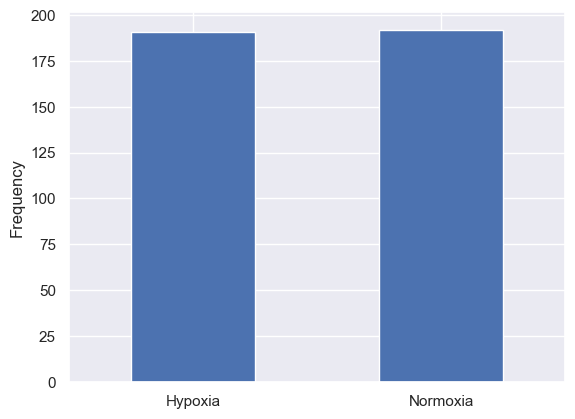

In [465]:
hypo_count = 0 
norm_count = 0
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    hypo_count += 1
  else:
    norm_count += 1

s = pd.Series({"Hypoxia" : hypo_count, "Normoxia" : norm_count})
s.plot.bar(rot = 0)

plt.ylabel("Frequency")
plt.show()

From the histogram above it is clear that the conditions are balanced among the samples.

### Correlation

Regarding correlation, we start by looking at correlation between features, so  between cells based on the genes. <br>
We will plot a heatmap of the correlation matrix, with light and dark shades of red representing negative and positive correlations, respectively.





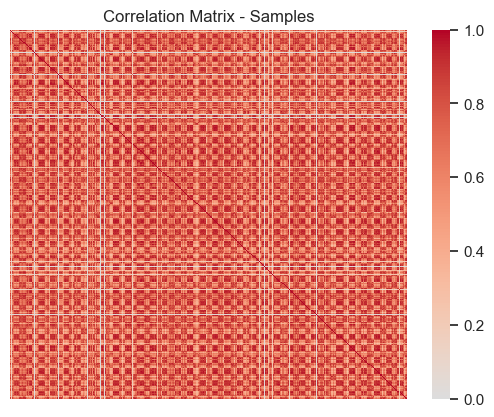

In [466]:
# Compute the correlation matrix for all pairs of cells based on genes
corr_matrix_n = df.corr() # pairwise correlation -> linear corr

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix_n, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
midpoint = (corr_matrix_n.values.max() - corr_matrix_n.values.min()) /2 + corr_matrix_n.values.min()
plt.title("Correlation Matrix - Samples")
plt.show()

From the plot, we can see that the dark red color represents high correlation between two cells, which means that the cells have similar gene expression profiles; this could indicate that they have a similar cellular function or that they are part of the same cell population. <br>
Since we notice that the minimum correlation between cells is negative we want to further invesztigate that.

Next we plot the frequency of the correlation matrix coefficients. Note: for the histogram we considered only the elements of the upper triangle of the correlation matrix because the uppare and lower triangles are simteric and in this was we don't compute the same thing twice.

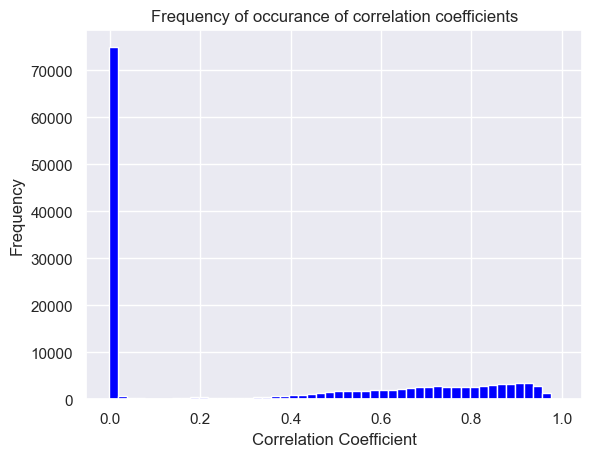

In [467]:
upper_triangular = np.triu(corr_matrix_n, k=1).flatten() 

plt.hist(upper_triangular, bins=50, color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Frequency of occurance of correlation coefficients')
plt.show()

We can notice that there are a lot of cells which are weakly correlated and we want to futher investigate that. Our first assumption is that the reason behind it is that those cells have all 0 entries.

In [468]:
num_zero_cols = (df == 0).sum(axis=0)
all_zero_cols = num_zero_cols[num_zero_cols == len(df)]
print(f"Columns with all 0 entries:\n{all_zero_cols}")

Columns with all 0 entries:
Series([], dtype: int64)


Since that is not the case, according to the standard thresholds we want to check the intensity of correlations as follows: <br>
* 0.00-0.19 “very weak” <br>
* 0.20-0.39 “weak” <br>
* 0.40-0.59 “moderate” <br>
* 0.60-0.79 “strong” <br>
* 0.80-1.0 “very strong” <br>

In [469]:
corr_df = df.corr()

no_corr = list(corr_df[(corr_df == 0)].stack().index)
very_weak = list(corr_df[(corr_df > 0) & (corr_df <= 0.19)].stack().index)
weak = list(corr_df[(corr_df >= 0.2) & (corr_df <= 0.39)].stack().index)
moderate = list(corr_df[(corr_df >= 0.4) & (corr_df <= 0.59)].stack().index)
strong = list(corr_df[(corr_df >= 0.6) & (corr_df <= 0.79)].stack().index)
very_strong = list(corr_df[(corr_df >= 0.8) & (corr_df <= 1)].stack().index)

print('no correlation', len(no_corr)//2)
print('very weak', len(very_weak)//2)
print('weak', len(weak)//2)
print('moderate', len(moderate)//2)
print('strong', len(strong)//2)
print('very strong', len(very_strong)//2)

no correlation 0
very weak 3603
weak 3865
moderate 14088
strong 23138
very strong 25837


Now we plot the correlation matrix for gene. From a biological point of view we expect that the genes which appear many times have high correlation with other genes.

In [470]:
#pearson correlation coefficient
random.seed(42)
random_columns = [i for i in range(0,1000)]
random.shuffle(random_columns)

corr_matrix_p = df.T.iloc[:, random_columns[:1000]].corr(method = 'pearson') #correlation matrix made of 100 random columns

average = (corr_matrix_p.values.max() - corr_matrix_p.values.min()) /2 + corr_matrix_p.values.min()
print("Number of genes included:", corr_matrix_p.shape[0])
print("Average between minimum and maximum correlation:", average)
print("Average correlation of expression profiles between genes:", corr_matrix_p.mean().mean())

Number of genes included: 1000
Average between minimum and maximum correlation: 0.3695789318416762
Average correlation of expression profiles between genes: 0.0821440990964279


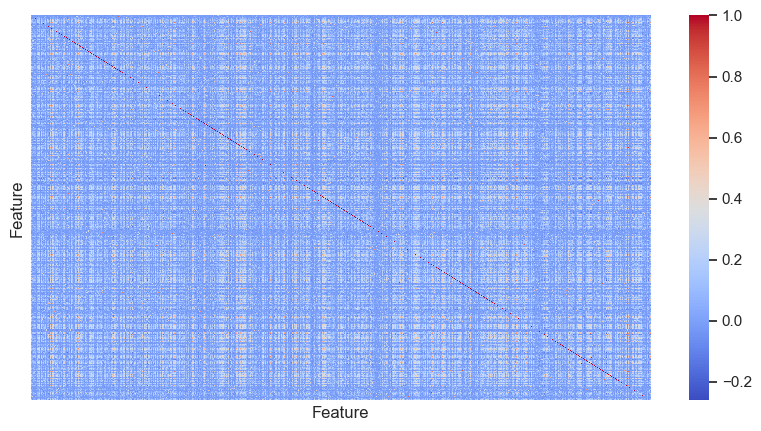

In [471]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix_p, cmap='coolwarm', yticklabels = False, xticklabels = False)
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.show()

### Outliers

We can try to identify the outliers in our dataset by computing the interquartile range, which is a standard approach for detecting outliers. This involves calculating the difference between the 75th and 25th percentile of the data. Any data point that falls outside the range of 1.5 times the interquartile range below the 25th percentile or above the 75th percentile is considered an outlier. We can then try to remove these outliers from our dataset and analyze the result.

In [472]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"    17.0
"output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"     0.0
"output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"     5.0
"output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"       0.0
"output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"       7.0
                                                              ... 
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam"     9.0
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam"    27.0
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam"    30.0
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam"    38.0
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam"    33.0
Length: 383, dtype: float64


In [473]:
df.describe()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                           40.869330            
std                                           466.002411            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                            17.000000            
max                                         46744.000000            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                            0.012268            
std                                             0.207857            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                            14.000000            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                           86.549356            
std                                          1037.224285            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             5.000000            
max                                         82047.000000            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                            1.025933          
std                                             6.101112          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                           289.000000          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           14.549749          
std                                           123.877800          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             7.000000          
max                                         10582.000000          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           56.284741          
std                                           503.913891          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            23.000000          
max                                         46856.000000          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           75.492556          
std                                           430.735604          
min                                             0.000000     

To get a more detailed understanding, let us plot the distribution of the genes for some random cell, using a boxplot. This way we can get more details about the median, the upper and lower quartiles, and the minimum and maximum values. The box itself represents the interquartile range (IQR), which is the range of the middle 50% of the data.

<Axes: xlabel='"output.STAR.1_E9_Hypo_S219_Aligned.sortedByCoord.out.bam"'>

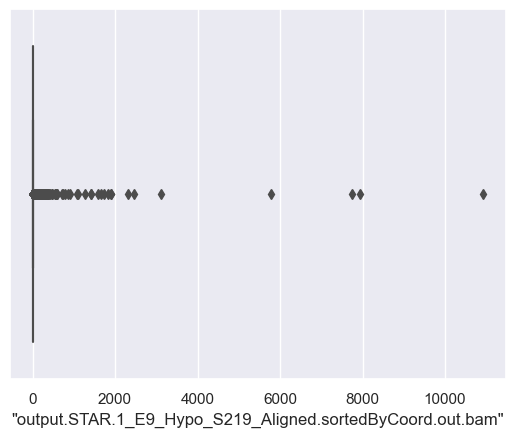

In [474]:
cells = list(df.columns)
random_cell = np.random.choice(len(cells))
sns.boxplot(x=df[cells[random_cell]])

A violin plot can be useful in this case because it provides a more informative visualization of the distribution of gene expression values than a simple box plot. Indeed, it also shows the shape of the distribution, which can be especially useful when working with high-dimensional data, such as gene expression data, where there are many genes and it can be difficult to get a sense of the overall distribution of expression values. Additionally, a violin plot can be used to compare the distributions of different groups, such as different cell types or experimental conditions.

<Axes: xlabel='"output.STAR.1_E9_Hypo_S219_Aligned.sortedByCoord.out.bam"'>

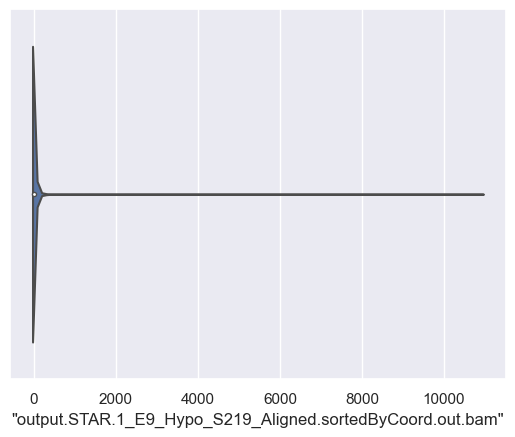

In [475]:
sns.violinplot(x=df[cells[random_cell]])

Moreover, we can plot the violin plot of 50 random features, which allows to get a broader view of the data, as well as any cells that exhibit a high degree of sparsity (i.e., contain mostly zero values). Additionally, this approach can help identify any patterns or trends in the data that may not be apparent when looking at single data points.

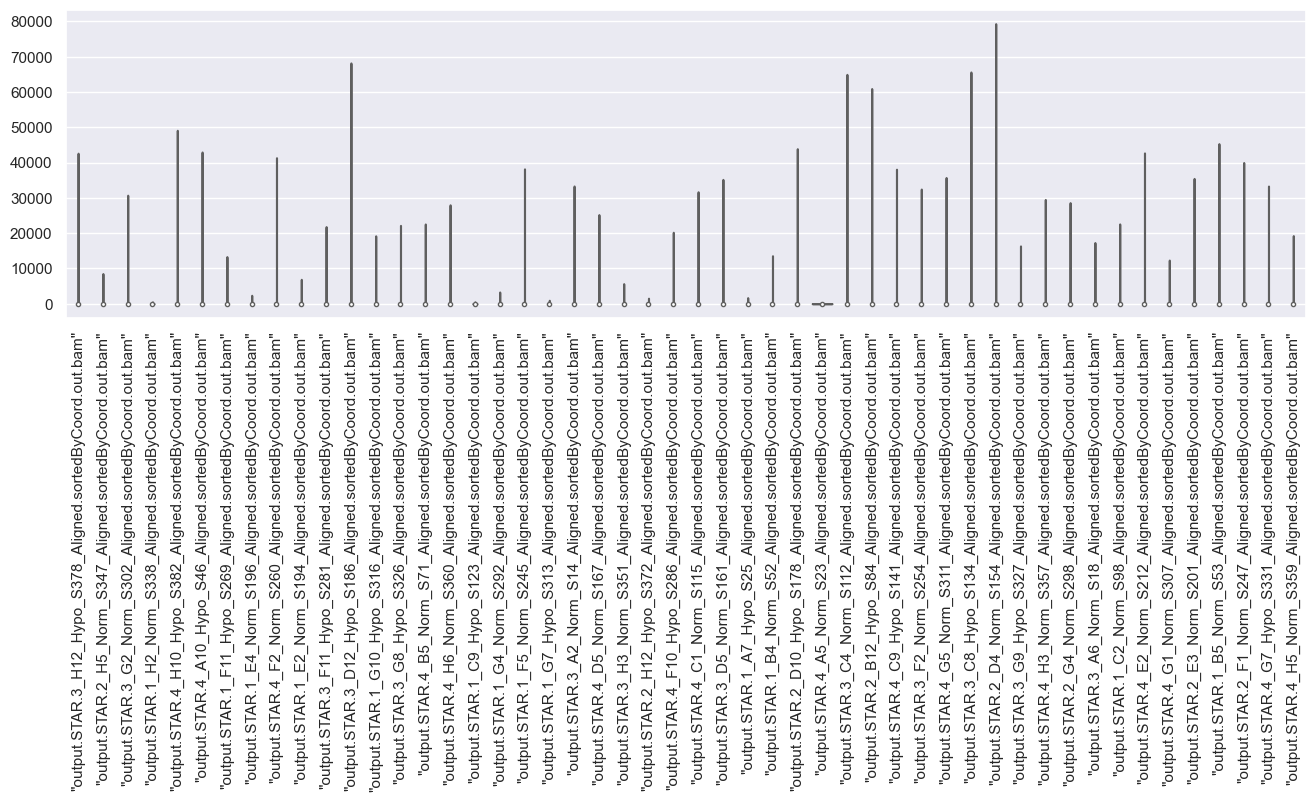

In [476]:
n_cells = 50
random_cells = np.random.choice(df.columns, size=n_cells, replace=False)

plt.figure(figsize=(16,4))
violin_plot = sns.violinplot(data=df[random_cells], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

Let's attempt to remove outliers by using the interquartile range method. As a best practice in exploratory data analysis, it's recommended to create a new dataset for any transformations or filtering. This will ensure that the original dataset remains intact and can be used later if needed.

In [477]:
df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers.shape
df_no_outliers.head(3)

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     0          

             "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0          
"CICP3"                                                      0          
"FAM87B"                                                     2          

             "output.STAR.1_A7_Hypo_S25_Aligned.sortedByCoord.out.bam"  ...  \
"MIR6859-1"                                                  0          ...   
"CICP3"                                                      0          ...   
"FAM87B"                                                     0          ...   

             "output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0             
"CICP3"                                                      0             
"FAM87B"                                                     0             

             "output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     1            

             "output.STAR.4_H2_Norm_S356_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                                  0            
"CICP3"                                                      0            
"FAM87B"                                                     0            

             "output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam"  \
"MIR6859-1"                                          

Let us look at our dataset and plots again, for the dataset with outliers removed.

In [478]:
df_no_outliers.describe()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                        6424.000000            
mean                                            0.110367            
std                                             1.199197            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                            41.000000            

       "output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam"  \
count                                             6424.0            
mean                                                 0.0            
std                                                  0.0            
min                                                  0.0            
25%                                                  0.0            
50%                                                  0.0            
75%                                                  0.0            
max                                                  0.0            

       "output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam"  \
count                                        6424.000000            
mean                                            0.064134            
std                                             0.595480            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             0.000000            
max                                            12.000000            

       "output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam"  \
count                                             6424.0          
mean                                                 0.0          
std                                                  0.0          
min                                                  0.0          
25%                                                  0.0          
50%                                                  0.0          
75%                                                  0.0          
max                                                  0.0          

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                        6424.000000          
mean                                            0.076276          
std                                             0.560607          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                            15.000000          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                        6424.000000          
mean                                            0.249377          
std                                             1.980777          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             0.000000          
max                                            56.000000          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                        6424.000000          
mean                                            0.341065          
std                                             2.192926          
min                                             0.000000     

<Axes: xlabel='"output.STAR.1_E9_Hypo_S219_Aligned.sortedByCoord.out.bam"'>

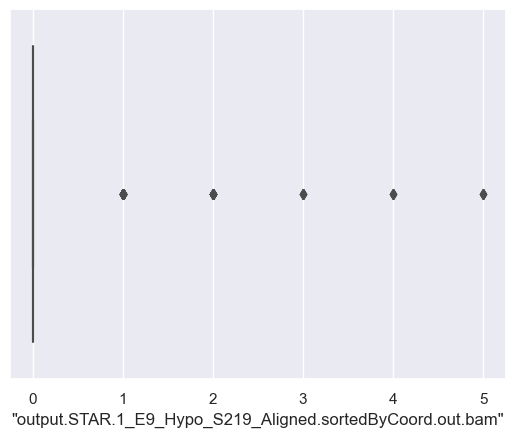

In [479]:
sns.boxplot(x=df_no_outliers[cells[random_cell]])

<Axes: xlabel='"output.STAR.1_E9_Hypo_S219_Aligned.sortedByCoord.out.bam"'>

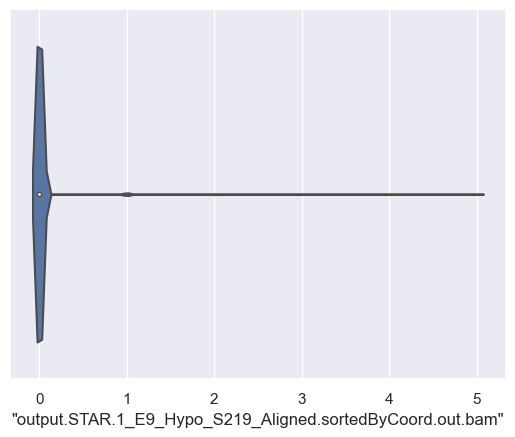

In [480]:
sns.violinplot(x=df_no_outliers[cells[random_cell]])

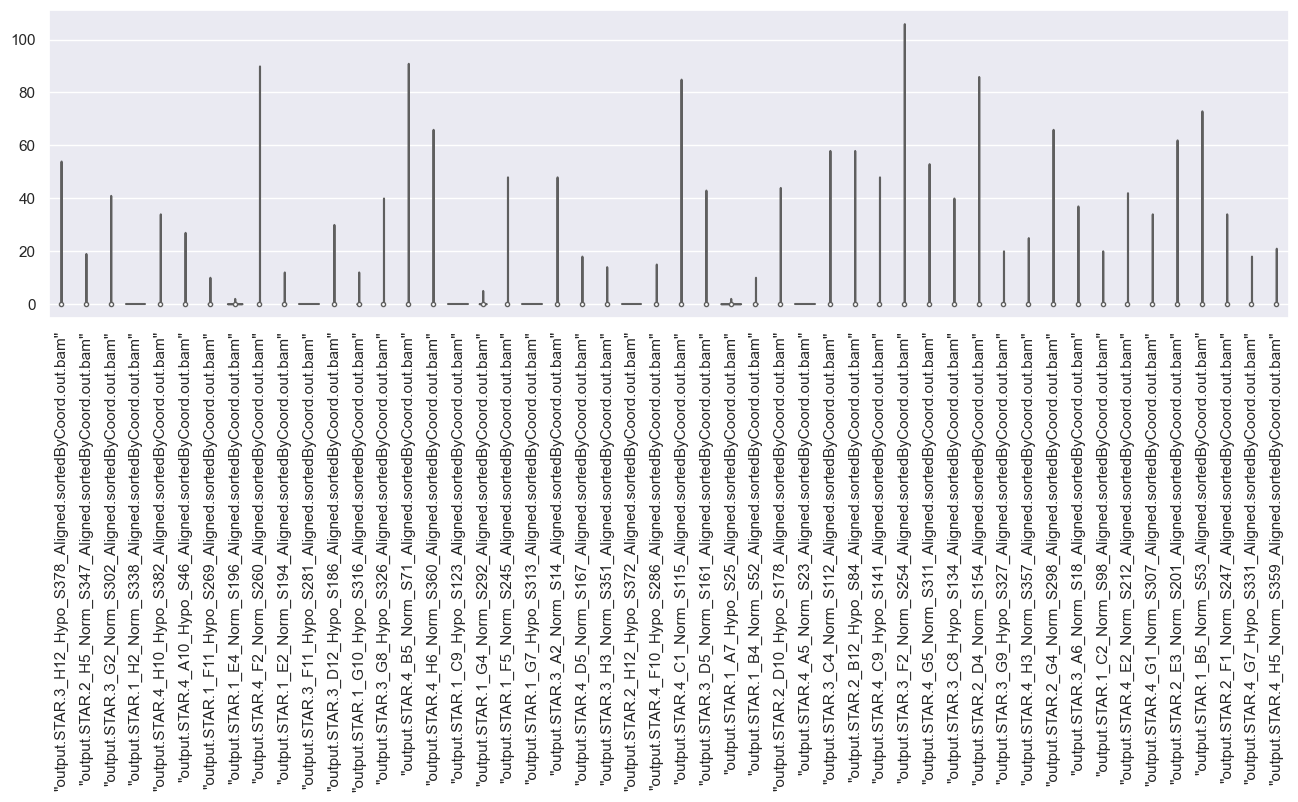

In [481]:
plt.figure(figsize=(16,4))
violin_plot = sns.violinplot(data=df_no_outliers[random_cells], palette="Set3", cut=0)
plt.setp(violin_plot.get_xticklabels(), rotation=90)
plt.show()

The current situation is not ideal as we are left with mainly zeros after removing the outliers. Simply removing the outliers won't solve the problem as many genes or features will still have a value of 0, which would lead to loss of information. Therefore, a different approach is needed, as the outliers appear to be the values that contain important information in this particular case. \
\
Therefore, it is the data's evident sparsity (i.e. the huge number of zeros, representing not expressed genes) to be giving more importance to outliers (representing genes with high expression). \
\
It is exactly the analysis of these highly-expressed genes that will lead to remarkable conclusions: genes with high expression in some cells are likely to be important in driving the biological processes that lead to cancer development and progression. These genes may represent key oncogenic drivers or tumor suppressors that are dysregulated in cancer cells. By identifying these highly expressed genes and understanding their functions, we can gain insights into the underlying biology of cancer.

### Sparsity


Sparsity is a measure of the proportion of zero values in a dataset or matrix. It is typically calculated as the number of zero elements divided by the total number of elements in the dataset or matrix. \
\
The sparsity value of this data frame indicates the proportion of cells in the data frame that are filled with non-zero values. A value of 1 indicates that all cells contain non-zero values, while a value closer to 0 indicates that a larger proportion of cells are zero. \
\
We can use a heatmap to visualize the sparsity of the dataset: here, the zero values in the dataframe are displayed as white cells and the non-zero values are displayed as black cells. The more white cells there are, the sparser the dataframe is.

<Axes: >

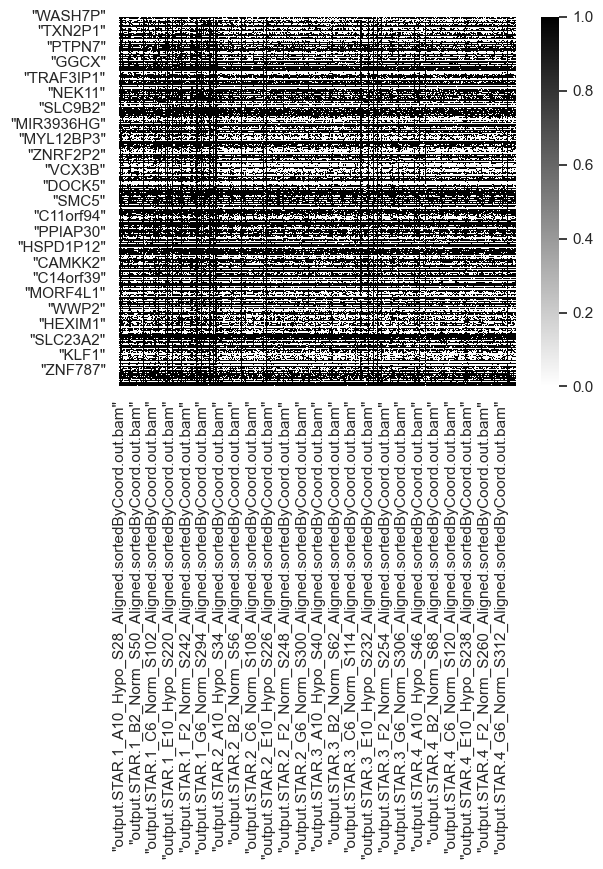

In [482]:
sns.heatmap(df == 0, cmap='binary')

It is remarkable how some rows are almost entirely white: this reveals that certain genes are not expressed in a majority of the cells, indicating that the biological function encoded by those genes may not be necessary for those particular cells. This could include the production of certain proteins, activation of metabolic pathways or regulation of specific gene expressions. \
\
Since there is a great amount of white cells in the heatmap, it is better to proceed with a more quantitative representation of sparsity. \
We can do that by computing the percentage of zeros in the dataframe.

In [483]:
zeros_count = (df == 0).sum().sum()
total_non_missing_values_count = df.count().sum()
zeros_percentage = (zeros_count / total_non_missing_values_count) * 100

print(f"Zeros percentage: {zeros_percentage:.2f}%")

Zeros percentage: 60.17%


Hence, as the proportion of zeros is fairly high, our dataset is definitely sparse (with sparsity level of around 0.6). \
\
Using sparse matrix representation could definitely be an advantage. Indeed, due to the high sparsity level, using a sparse matrix representation could lead to significant memory and computational savings, as only the non-zero values are stored and operated on. This can result in faster processing times and reduced memory usage, which can be especially important since we have a large dataset.

In [484]:
sparse_df = csr_matrix(df.values) # Converts DataFrame into a CSR sparse matrix
print(sparse_df)

density = np.count_nonzero(sparse_df.toarray()) / np.prod(sparse_df.shape)
print(f"Sparsity: {1 - density:.2%}")

  (0, 20)	1
  (0, 49)	1
  (0, 72)	1
  (0, 85)	1
  (0, 106)	2
  (0, 126)	1
  (0, 127)	1
  (0, 133)	2
  (0, 158)	9
  (0, 166)	1
  (0, 170)	1
  (0, 171)	1
  (0, 186)	1
  (0, 189)	3
  (0, 195)	1
  (0, 199)	2
  (0, 209)	1
  (0, 210)	1
  (0, 218)	1
  (0, 228)	2
  (0, 235)	1
  (0, 270)	4
  (0, 276)	1
  (0, 292)	1
  (0, 314)	2
  :	:
  (22904, 334)	12
  (22904, 336)	2
  (22904, 337)	1
  (22904, 340)	2
  (22904, 341)	3
  (22904, 342)	1
  (22904, 345)	3
  (22904, 346)	1
  (22904, 347)	6
  (22904, 348)	5
  (22904, 350)	5
  (22904, 351)	5
  (22904, 352)	1
  (22904, 357)	1
  (22904, 358)	6
  (22904, 361)	4
  (22904, 363)	2
  (22904, 369)	1
  (22904, 371)	2
  (22904, 372)	1
  (22904, 376)	2
  (22904, 377)	1
  (22904, 379)	6
  (22904, 381)	1
  (22904, 382)	4
Sparsity: 60.17%


### Kurtosis and Skewness

\
When exploring the distribution of a dataset, it is important to consider summary statistics beyond just the mean and standard deviation. Skewness and kurtosis are two such measures that can provide additional insight into the shape of the distribution. \
\
Skewness measures the degree of asymmetry in the distribution, with positive skewness indicating a longer tail to the right and negative skewness indicating a longer tail to the left (with a value of 0 indicating a perfectly symmetrical distribution). \
\
Kurtosis, on the other hand, measures the degree of peakedness of the distribution, with high kurtosis indicating a more peaked distribution and low kurtosis indicating a flatter distribution. A value of 3 indicates a normal distribution, values less than 3 indicate flatter distributions (platykurtic), and values greater than 3 indicate more peaked distributions (leptokurtic).

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

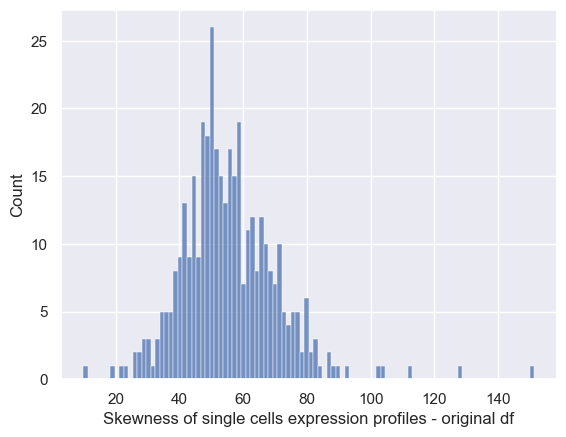

In [485]:
from scipy.stats import kurtosis, skew

col_num = np.shape(df)[1]
df_skew_cells = []

for i in range(col_num):      
     df_skew_cells += [df[cells[i]].skew()]
sns.histplot(df_skew_cells, bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

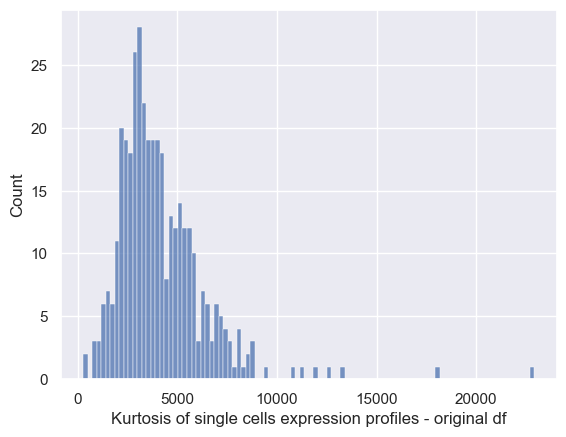

In [486]:
df_kurt_cells = []
for i in range(col_num) :     
    df_kurt_cells += [df[cells[i]].kurt()]
sns.histplot(df_kurt_cells, bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

The resulting histograms show the distribution of the skewness and kurtosis values across all cells, allowing us to get a sense of the overall shape of the gene expression profiles in the dataset. \
It is clear how the skewness histogram is right skewed and the kurtosis histogram is leptokurtic, indicating that many cells have highly variable expression profiles with both high peaks and long tails. \
\
For comparison, here are skewness and kurtosis for a normal distribution.

In [487]:
xnorm = np.random.normal(0, 2, 10000000)   # Create random values based on a normal distribution

print(f"Excess kurtosis of normal distribution: {kurtosis(xnorm)}")
print(f"Skewness of normal distribution: {skew(xnorm)}")

Excess kurtosis of normal distribution: 0.0019833938586759636
Skewness of normal distribution: 0.00023428166083094563


Then, the skewness and kurtosis values of the dataset suggest a highly non-normal distribution, as they greatly exceed the values expected for a normal distribution.

### Non-Zero Gene Expression

We now want to investigate the genes with non-zero expression. 

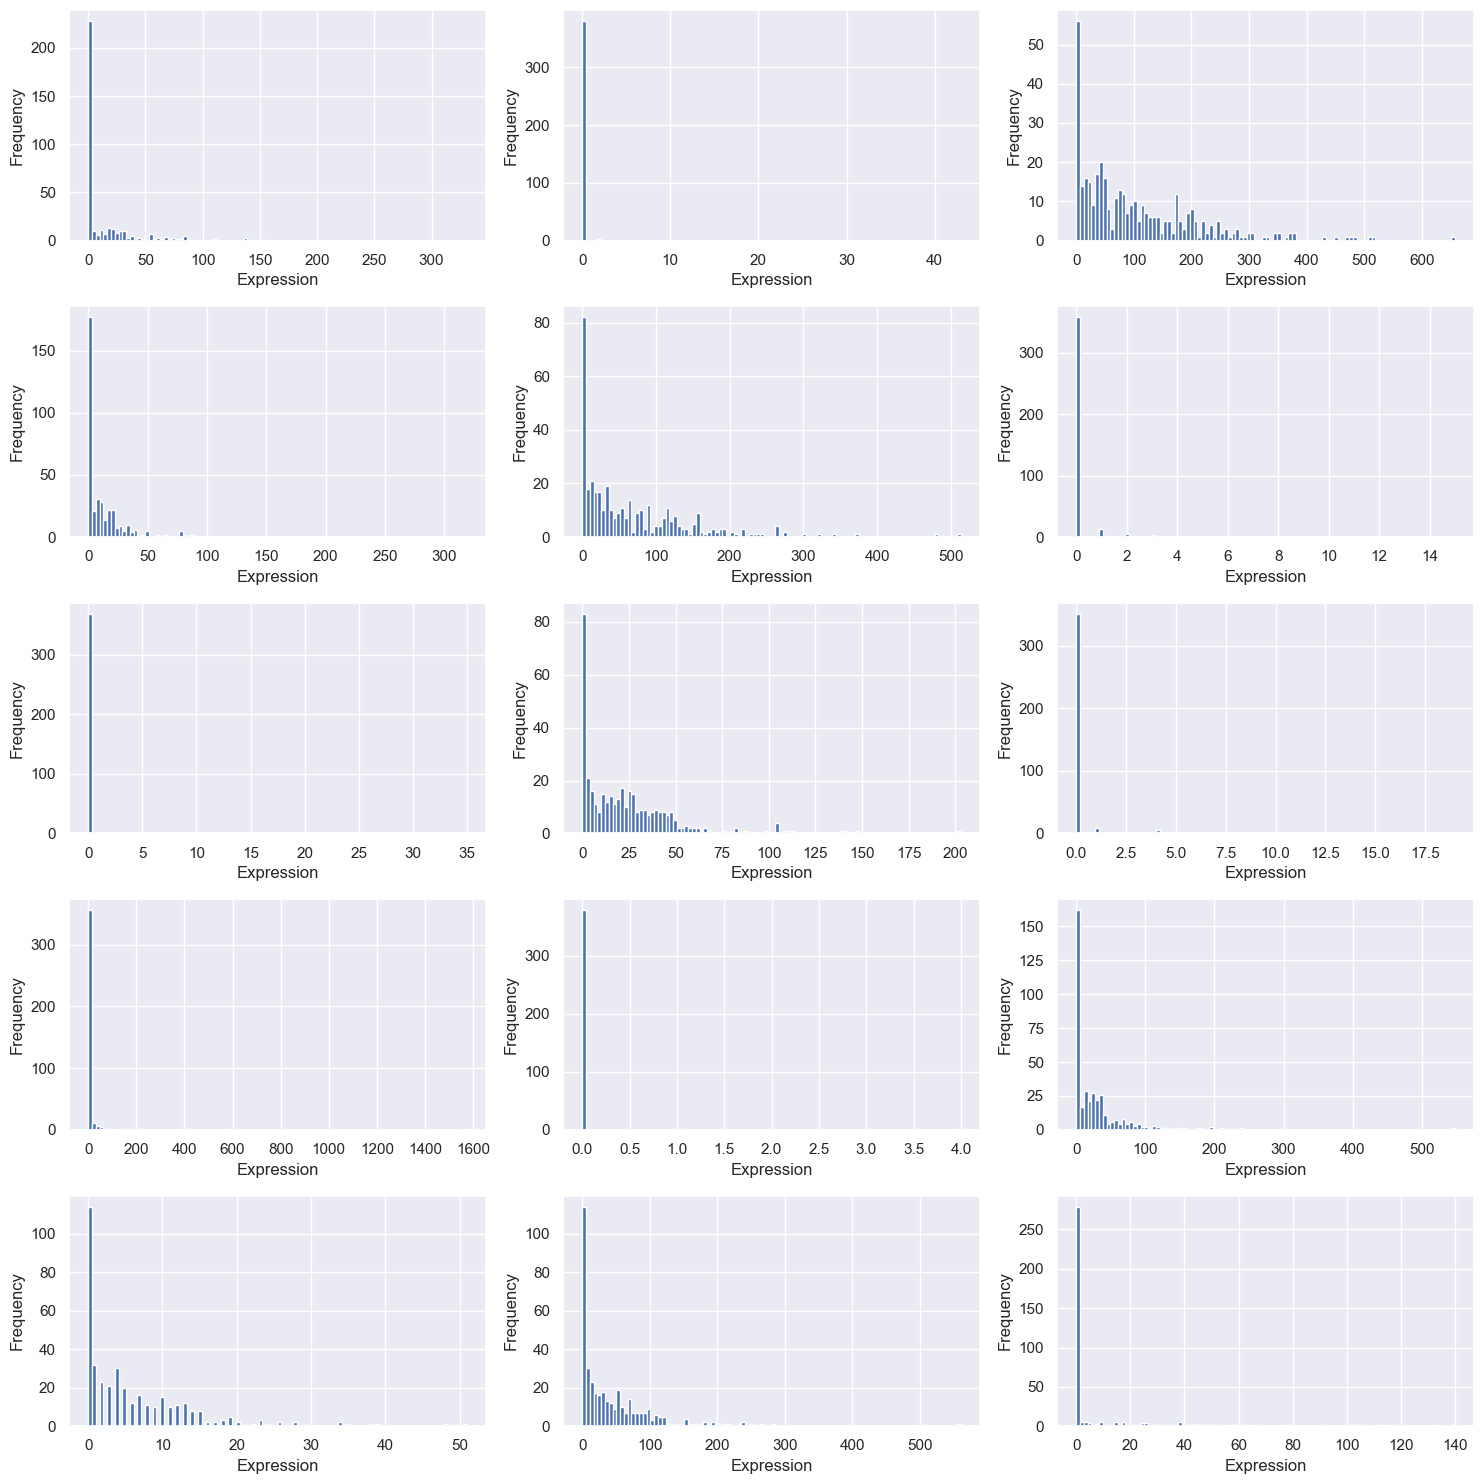

In [488]:
data = df.T
data = data.loc[(data!=0).any(axis=1), :]
genes = np.random.choice(data.columns, size=15, replace=False)
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
for i, gene in enumerate(genes):
    gene_data= data[gene]
    row_num= i//3
    col_num= i%3
    ax[row_num, col_num].hist(gene_data, bins=100)
    ax[row_num, col_num].set_xlabel('Expression')
    ax[row_num, col_num].set_ylabel('Frequency')
fig.tight_layout()
plt.show()

We would expect to observe a bimodal behaviour, since it is common in the distribution of gene expression levels, however we notice a unimodal behaviour in all of the cases (meaning that the data has a single peak). This is probably due to various biological factors. From the plots we can observe that the data doesn't present any upper limit for expression, and that it follows either a Negative Binomial or Poisson distribution (it depends on wether the mean and the variance coincide or not). We therefore now proceed by analysing the relationship between the mean and the variance by plotting them.

Text(0, 0.5, 'Variance')

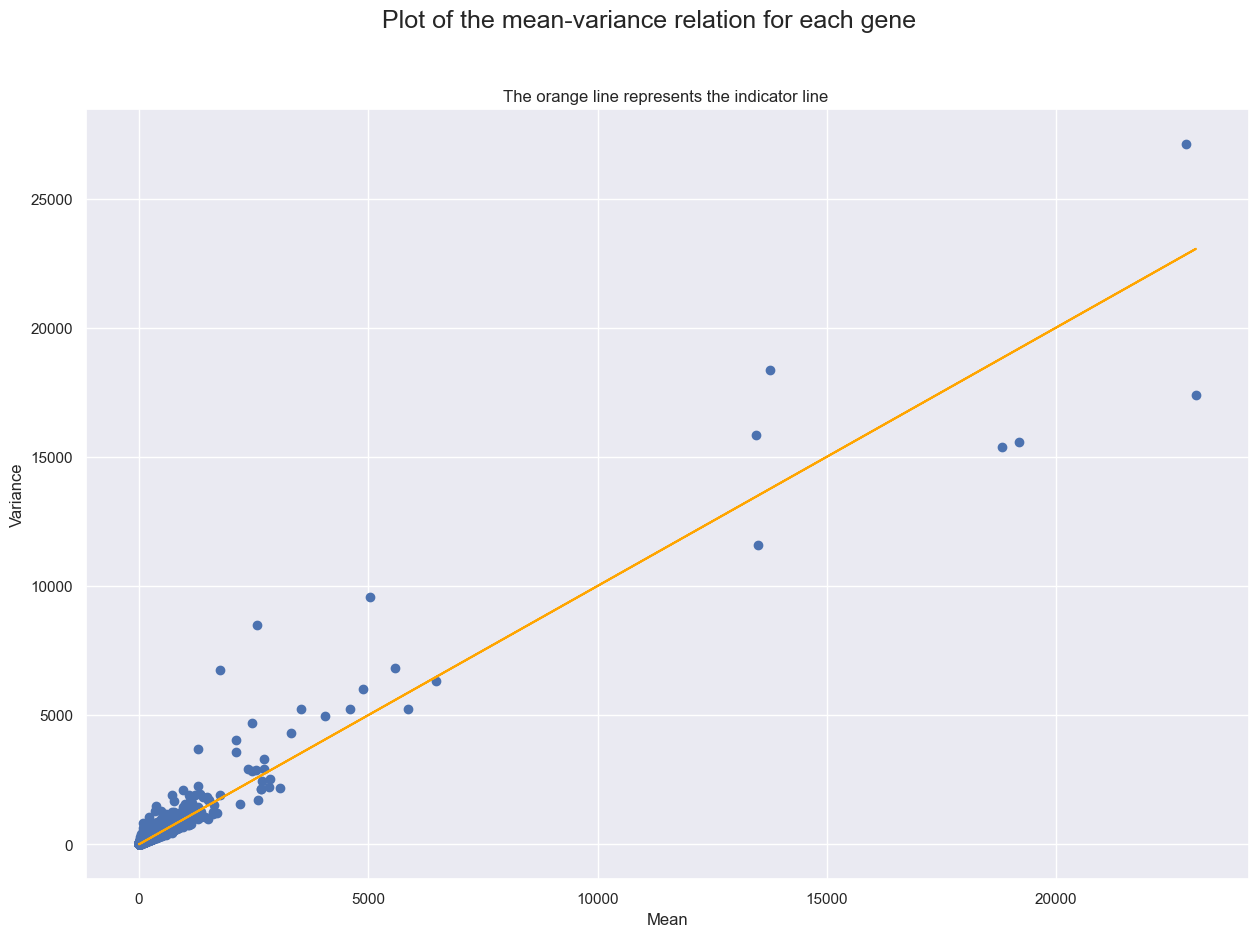

In [489]:
mean_vector = df.T.describe().iloc[1,:]
var_vector = df.T.describe().iloc[2,:]
plt.figure(figsize=(15, 10))
plt.scatter(mean_vector, var_vector)
plt.plot(mean_vector, mean_vector, color = "orange")
plt.title("The orange line represents the indicator line ", fontsize = 12)
plt.suptitle("Plot of the mean-variance relation for each gene", fontsize = 18)
plt.xlabel("Mean")
plt.ylabel("Variance")

We can observe a linear relation between mean and variance, therefore we can conclude that the data follows a Poisson distribution.

## **Data Preprocessing**

### Filtering & Quality Control


\
At this point we aim to determine whether the distribution of the total reads among cells is normal. This is done to asses the quality of the data and make sure there are no systemic biases as the total read count can be affected by technical factors, something that would need to be corrected. \
\
We use the Shapiro-Wilk test. \
\
[The Shapiro-Wilk test can be used to test for normality of the data. It tests the null hypothesis that a sample comes from a normally distributed population. It does not specifically test for normality of the measurement error, but rather for normality of the entire dataset. However, if the measurement error is the main contributor to non-normality in the data, then the Shapiro-Wilk test may indirectly detect non-normality in the measurement error.] \
\
[a 'read' is a single sequence of neucleotides obtained from a single fragment of RNA during sequencing (the process of RNA sequencing involves breaking up the RNA molecules in a sample into short fragments, sequencing these fragments, and then aligning the resulting sequences to a reference genome or transcriptome to identify the genes that were expressed in the sample), the number of reads for each gene can be used as a proxy for its expression level, with more reads indicating higher expression \
\'total read count' refers to the total number of reads obtained from an RNA-seq experiment for a given sample] \
\
*note: also mention that two other types of normalization were applied to reduce potential problems with total read counts, including extracting the same amount of RNA from each sample in the lab and adjusting the sequencing runs to obtain similar numbers of counts for each sample.

In [490]:
from scipy.stats import shapiro

total_counts = np.sum(df, axis=0) # sum the counts across all genes for each cell

# perform Shapiro-Wilk test to check for normality
stat, p = shapiro(total_counts)

if p > 0.05: # if p-value is greater than 0.05, we cannot reject the null hypothesis that the data is normally distributed
    print("Total read counts follow a normal distribution (p={:.3f})".format(p))
else:
    print("Total read counts do not follow a normal distribution (p={:.3f})".format(p))

Total read counts do not follow a normal distribution (p=0.000)


Now we want to visualize this result to better understand how we need to filter our data.

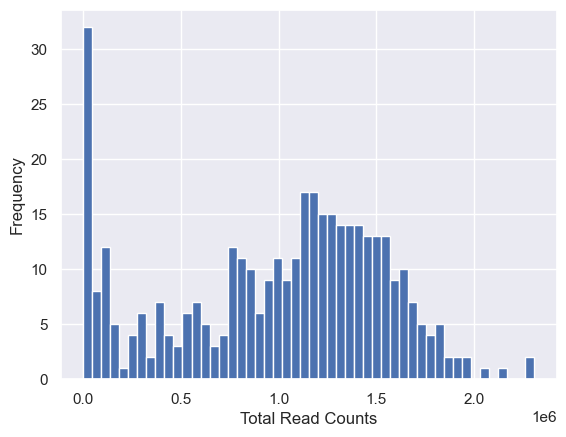

In [491]:
# Create a histogram of the total read counts
plt.hist(total_counts, bins=50)

# Set the x-axis label
plt.xlabel('Total Read Counts')

# Set the y-axis label
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [492]:
df_filtered = df.loc[:, total_counts >= .25e6]

Another standard analysis step is to filter out low quality cells, cells that may have been damaged during the experiment (have a low number of expressed genes) and that could affect the quality of the data.

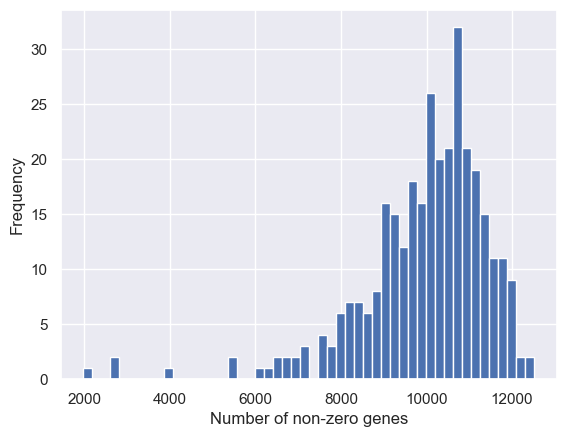

In [493]:
# count number of non-zero genes for each cell
nonzero_counts = np.count_nonzero(df_filtered, axis=0)

# plot histogram
plt.hist(nonzero_counts, bins=50)
plt.xlabel('Number of non-zero genes')
plt.ylabel('Frequency')
plt.show()

In [494]:
df_filtered = df_filtered.loc[:, nonzero_counts >= 7500]

By looking at the graphs we set thresholds based on which we can filter out cells to eliminate unwanted variation/noise and the effects of human errors.

In [495]:
df_filtered.shape

(22905, 305)

### Normalization

Now we want to work on normalizing our data so that any systematic differences in sequencing are removed and do not interfere with comparisons of the expression profiles between cells. The question that arises is how can we choose the normalization we apply/follow ?

We consider applying more than one normalization methods in order to compare our results and decide which is better suited for our analysis. The most common types of normalization for gene expression data are TPM and Library Size Normalization, so we look at these first.

TPM (Transcripts Per Million) normalization: this method scales the counts for each gene by the total number of reads in the library and the length of the gene (appropriate if you want to compare expression levels between genes). Even if it is a common normalization for gene expression data, it is length-normalized meaning we cannot apply it since we do not have information about gene lengths.

In [496]:
import random

df_filtered_copy = df_filtered.copy()
rdn_gene = random.randrange(df_filtered.shape[0])

Library size normalization: this method involves dividing the raw read counts of each sample/cell by the total number of reads in that sample, and then multiplying by a scaling factor (such as the mean or median library size) to ensure that the total read counts across all samples are equal. This method is useful when comparing gene expression levels across samples with different total read counts, as is our case.

Note: 'library size' is defined as the total sum of counts across all genes for each cell and its specific value can be assumed to scale any cell-specific biases

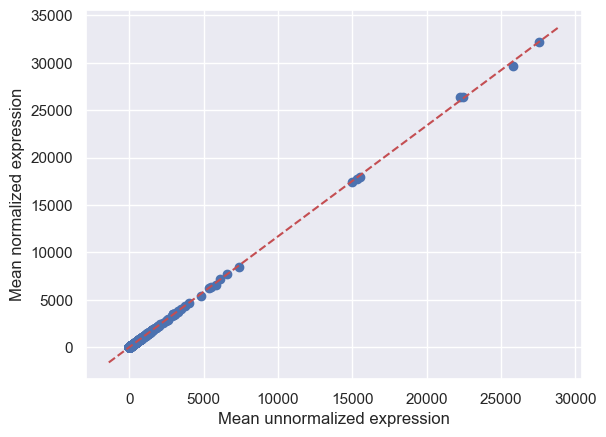

In [497]:
# library size normalization

# Calculate the library size for each cell
lib_size = df_filtered.sum(axis=0)

# Calculate scaling factor for each cell
scaling_factor = lib_size / lib_size.mean()

# Normalize the data using the scaling factor
df_normalized = (df_filtered / scaling_factor) * lib_size.mean() / 1e6

# Calculate the mean expression level before normalization
mean_filtered = df_filtered.mean(axis=1)

# Calculate the mean expression level after normalization
mean_normalized = df_normalized.mean(axis=1)

# Create a scatter plot
plt.scatter(mean_filtered, mean_normalized)
plt.xlabel('Mean unnormalized expression')
plt.ylabel('Mean normalized expression')

# Plot the diagonal line of slope 1
x = plt.xlim()
y = plt.ylim()
plt.plot(x, y, color='r', linestyle='--')
plt.show()

CPM (Counts Per Million) normalization: this method scales the raw counts by the library size of each sample, multiplied by a factor of 1,000,000 (1e6)

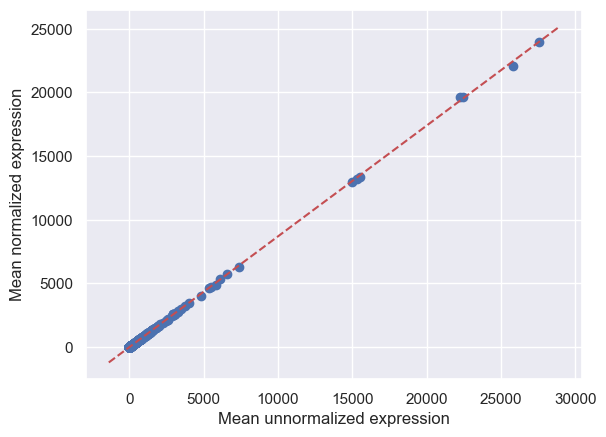

In [498]:
#CPM

# Calculate the total read count for each sample
total_reads = df_filtered_copy.sum(axis=0)

# Divide each read count in the DataFrame by corresponding total count and multiply by 1,000,000
cpm_df =  (df_filtered / total_reads) * 1e6

# Calculate the mean expression level before normalization
mean_filtered = df_filtered.mean(axis=1)

# Calculate the mean expression level after normalization
mean_normalized = cpm_df.mean(axis=1)

plt.scatter(mean_filtered, mean_normalized)
plt.xlabel('Mean unnormalized expression')
plt.ylabel('Mean normalized expression')
x = plt.xlim()
y = plt.ylim()
plt.plot(x, y, color='r', linestyle='--')
plt.show()

We can see a strong similarity between the graphs resulting from each normalization, which could make sense if dataset has relatively small variations in library sizes across cells.

In the scatter plot, each point represents a gene, and the x-coordinate is the mean expression level before normalization, while the y-coordinate is the mean expression level after normalization. By looking at the plot, we can interpret how well the normalization has worked. The points are tightly clustered around the diagonal line of slope 1 which indicates that the normalization was successful and has removed differences in library size between the samples.

Let us update the data set with the filtered and normalized data set.

In [499]:
cpm_df.describe()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                           43.658590            
std                                           497.806257            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                            18.160220            
max                                         49934.195908            

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           43.658590          
std                                           371.712947          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            21.004495          
max                                         31752.795098          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           43.658590          
std                                           390.872719          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            17.840494          
max                                         36344.963784          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           43.658590          
std                                           249.101501          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            22.554343          
max                                         17079.999098          

       "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           43.658590          
std                                           361.574544          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.694678          
75%                                            24.313745          
max                                         35409.148220          

       "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                           43.658590          
std                                           297.587197          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                            24.584697          
max                                         23443.449052          

       "output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                           43.658590            
std                                           452.899651            
min                                             0.000000            
25%                 

In [500]:
df = cpm_df.copy()

### Log-Transformation

We now want to analyse skewness and kurtosis of the normalized and filtered data set to check if they have improved.

Text(0.5, 0, 'Skewness of single cells expression profiles - original df')

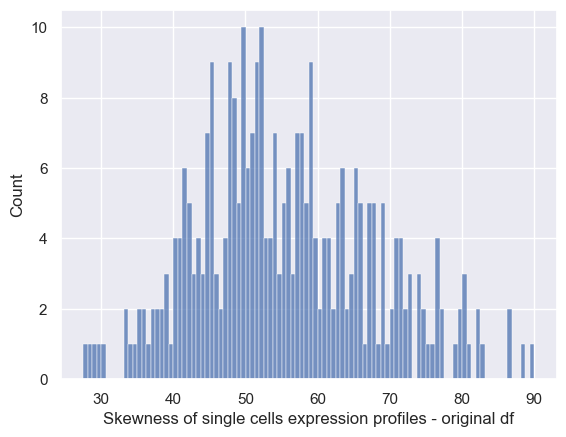

In [501]:
# skewness of normalized and filtered data set
cells_filt = df.columns
col_num = np.shape(df)[1]
df_skew_cells = []

for i in range(col_num):      
     df_skew_cells += [df[cells_filt[i]].skew()]
sns.histplot(df_skew_cells, bins=100)
plt.xlabel('Skewness of single cells expression profiles - original df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - original df')

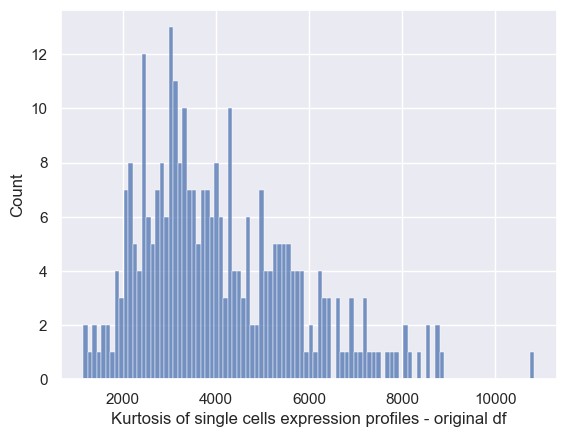

In [502]:
# kurtosis of normalized and filtered data set
df_kurt_cells = []
for i in range(col_num) :     
    df_kurt_cells += [df[cells_filt[i]].kurt()]
sns.histplot(df_kurt_cells, bins=100)
plt.xlabel('Kurtosis of single cells expression profiles - original df')

Since they are still pretty messy, we apply a logarithmic transformation, which is a potential solution to address the issue of skewed distribution of gene expression data. Using the logarithmic base 2 transformation is common as adding 1 to the data indicates doubling of the feature abundance (gene expression) and subtracting 1 indicates halving of the feature abundance. \
\
This transformation makes the changes in the feature abundance symmetric in both directions, so up-regulation and down-regulation of a gene with respect to a control is symmetrical. The transformed data can then be visualized using a boxplot to check if the distribution has become more normal and to identify any outliers.

In [503]:
df_log2 = np.log2(df+1)

In [504]:
df_log2.describe()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                            1.925585            
std                                             2.784815            
min                                             0.000000            
25%                                             0.000000            
50%                                             0.000000            
75%                                             4.260042            
max                                            15.607769            

       "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                            2.184312          
std                                             2.812017          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.459726          
max                                            14.954641          

       "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                            2.035665          
std                                             2.783784          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.235765          
max                                            15.149508          

       "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                            2.208385          
std                                             2.830957          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.557921          
max                                            14.060105          

       "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                            2.361747          
std                                             2.806257          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.761012          
75%                                             4.661849          
max                                            15.111875          

       "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000          
mean                                            2.239099          
std                                             2.838717          
min                                             0.000000          
25%                                             0.000000          
50%                                             0.000000          
75%                                             4.677209          
max                                            14.516959          

       "output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"  \
count                                       22905.000000            
mean                                            1.967943            
std                                             2.778069            
min                                             0.000000            
25%                 

In [505]:
df_log2.head()

"output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000            
"MIR6859-1"                                           0.000000            
"WASH9P"                                              1.048409            
"OR4F29"                                              0.000000            
"MTND1P23"                                            0.000000            

             "output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                   0.0          
"MIR6859-1"                                                0.0          
"WASH9P"                                                   0.0          
"OR4F29"                                                   0.0          
"MTND1P23"                                                 0.0          

             "output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000          
"MIR6859-1"                                           0.000000          
"WASH9P"                                              0.828366          
"OR4F29"                                              0.000000          
"MTND1P23"                                            0.000000          

             "output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000          
"MIR6859-1"                                           0.000000          
"WASH9P"                                              2.761959          
"OR4F29"                                              0.000000          
"MTND1P23"                                            0.000000          

             "output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000          
"MIR6859-1"                                           0.000000          
"WASH9P"                                              0.761012          
"OR4F29"                                              0.000000          
"MTND1P23"                                            0.000000          

             "output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                                   0.0          
"MIR6859-1"                                                0.0          
"WASH9P"                                                   0.0          
"OR4F29"                                                   0.0          
"MTND1P23"                                                 0.0          

             "output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000            
"MIR6859-1"                                           0.000000            
"WASH9P"                                              1.671797            
"OR4F29"                                              0.000000            
"MTND1P23"                                            0.000000            

             "output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000            
"MIR6859-1"                                           0.000000            
"WASH9P"                                              1.797015            
"OR4F29"                                              0.000000            
"MTND1P23"                                            0.000000            

             "output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam"  \
"WASH7P"                                              0.000000            
"MIR6859-1"                                           0.000000            
"WASH9P"                                              1.044617            
"OR4F29"                                              0.000000            
"MTND1P23"                                            0.000000            

             "

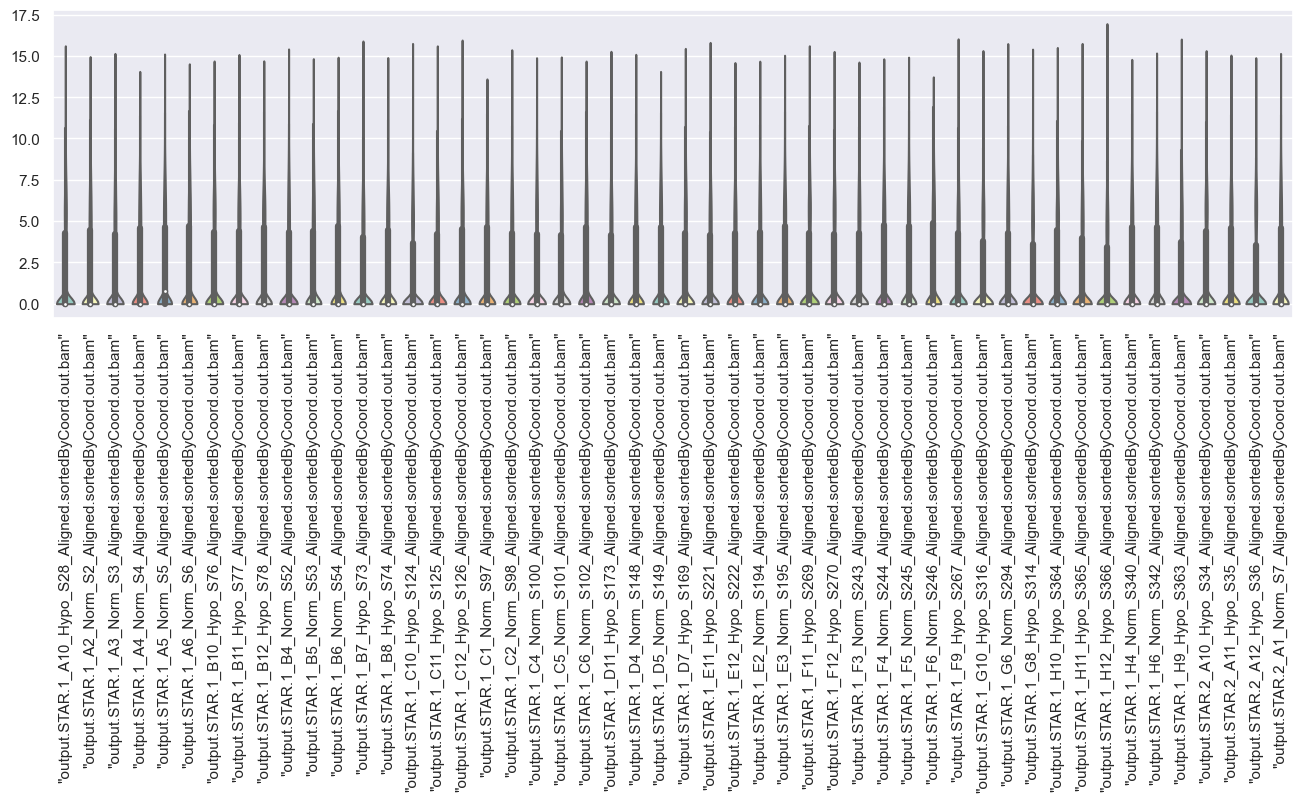

In [506]:
# Selecting part of the data, as the plots would otherwise take too long to generate
df_log2_small = df_log2.iloc[:, :50]
plt.figure(figsize=(16,4))
plot = sns.violinplot(data=df_log2_small, palette="Set3", cut=0)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Text(0.5, 0, 'Skewness of single cells expression profiles - log2 df')

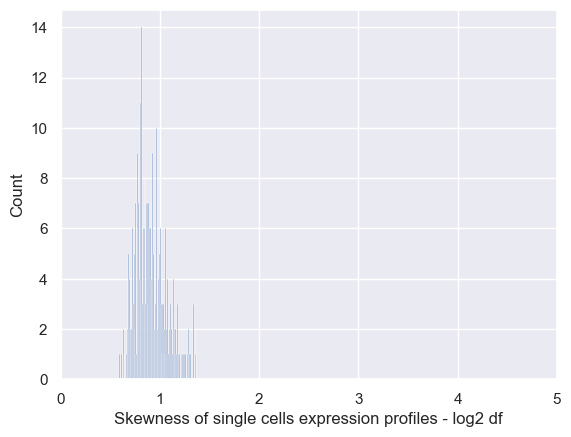

In [507]:
df_log2_skew = []
for i in range(col_num) :     
     v_df = df_log2[cells_filt[i]]
     df_log2_skew += [skew(v_df)]   
sns.histplot(df_log2_skew, bins=100)
plt.xlim(0, 5)
plt.xlabel('Skewness of single cells expression profiles - log2 df')

Text(0.5, 0, 'Kurtosis of single cells expression profiles - log2 df')

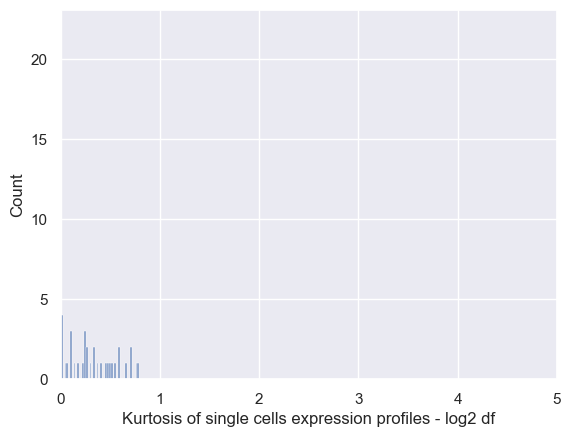

In [508]:
df_log2_kurt = []
for i in range(col_num) :     
     v_df = df_log2[cells_filt[i]]
     df_log2_kurt += [kurtosis(v_df)] 
sns.histplot(df_log2_kurt, bins=100)
plt.xlim(0, 5)
plt.xlabel('Kurtosis of single cells expression profiles - log2 df')

The values of skewness and kurtosis have improved (both being close to 0 for pretty much every cell), so we can keep this transformation for now.

In [509]:
df = df_log2.copy() # Using the logarithmic transformation of the data as our dataset from now on

### Enrichment Analysis 

Enrichment analysis is a widely used method in bioinformatics and functional genomics to gain insights into the biological meaning and significance of a set of genes or proteins. <br>It can provide functional annotations and insights into the biological processes, molecular functions, or cellular components associated with a set of genes: it's useful to understand the biological context and potential roles of the genes in a particular biological system.

In order to proceed with this analysis we need to define a set of marker genes: we manually investigate the ones present in our dataset from the wider set of known genes Peng-Ju et al, 2020.<br> The choice of marker genes is arbitrary, thus we chose the main ones. Most of these genes are related to immune system cells since Adenocarcinoma1, which is the type of breast cancer we are dealing with, can impact various aspects of the immune system. The interaction between tumor cells and immune cells plays a crucial role in HCC. However there are also some other genes related to blood cells development, energy storing, muscle and connective tissues building.

In [510]:
from scipy.stats import hypergeom
import scanpy as sc

In [511]:
gene_data = sc.AnnData(df).T

In [512]:
marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    "ID2-hi myeloid prog": [
        "CD14",
        "ID2",
        "VCAN",
        "S100A9",
        "CLEC12A",
        "KLF4",
        "PLAUR",
    ],
    "cDC1": ["CLEC9A", "CADM1"],
    "cDC2": [
        "CST3",
        "COTL1",
        "LYZ",
        "DMXL2",
        "CLEC10A",
        "FCER1A",
    ],  
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "Proerythroblast": [
        "CDK6",
        "SYNGR1",
        "HBM",
        "GYPA",
    ],  
    "NK": ["GNLY", "NKG7", "CD247", "GRIK4", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": [
        "VPREB1",
        "MME",
        "EBF1",
        "SSBP2",
        "BACH2",
        "CD79B",
        "IGHM",
        "PAX5",
        "PRKCE",
        "DNTT",
        "IGLL1",
    ],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],   
    'Endothelial cells': ['VEGFA', 'SLC2A1', 'PGAM1', 'LDHA'],
    'Fibroblasts': ['TPI1', 'P4HA1', 'MRPS17', 'CDKN3'],
    'Adipocytes': ['ADM', 'NDRG1', 'TUBB6'],
    'Myocytes': ['ALDOA', 'MIF']
}

In [513]:
marker_genes_d = {}
for path, markers in marker_genes.items():
    markers_f = []
    for marker in markers:
        marker = '"' + marker + '"'
        if marker in gene_data.var_names:
            markers_f.append(marker)
    if markers_f:
        marker_genes_d[path] = markers_f

These are the marker genes we found in our data:

In [514]:
marker_genes_d

{'CD14+ Mono': ['"CD14"'],
 'CD16+ Mono': ['"TCF7L2"', '"LYN"'],
 'ID2-hi myeloid prog': ['"CD14"', '"ID2"', '"S100A9"', '"KLF4"', '"PLAUR"'],
 'cDC1': ['"CADM1"'],
 'cDC2': ['"CST3"', '"COTL1"', '"LYZ"', '"DMXL2"'],
 'Normoblast': ['"SLC4A1"', '"SLC25A37"', '"HBB"', '"HBA1"', '"TFRC"'],
 'Erythroblast': ['"MKI67"', '"HBA1"', '"HBB"'],
 'Proerythroblast': ['"CDK6"', '"SYNGR1"'],
 'NK': ['"GNLY"', '"GRIK4"', '"FCER1G"', '"KLRG1"'],
 'ILC': ['"ID2"', '"PLCG2"', '"GNLY"', '"SYNE1"'],
 'Lymph prog': ['"MME"', '"SSBP2"', '"BACH2"', '"IGHM"', '"PAX5"', '"PRKCE"'],
 'Naive CD20+ B': ['"IL4R"', '"IGHD"', '"IGHM"'],
 'B1 B': ['"SSPN"',
  '"ITGB1"',
  '"EPHA4"',
  '"COL4A4"',
  '"PRDM1"',
  '"IRF4"',
  '"XBP1"',
  '"PAX5"',
  '"BCL11A"',
  '"BLK"',
  '"IGHD"',
  '"IGHM"'],
 'Transitional B': ['"MME"', '"CD24"', '"ACSM3"', '"MSI2"'],
 'Plasma cells': ['"MZB1"', '"HSP90B1"', '"FNDC3B"', '"PRDM1"'],
 'Plasmablast': ['"XBP1"', '"PRDM1"', '"PAX5"'],
 'CD4+ T activated': ['"CD4"', '"ITGB1"'],
 'CD4+ T

Now we perform the actual Enrichment analysis. More precisely we will use Fisher's exact test, which is a statistical test used to determine if there is a significant association between two categorical variables. <br>
In this particular analysis, genes are assigned to predefined gene sets or pathways. The overlap between the genes in the pathway and the genes in the dataset is evaluated using Fisher's exact test to assess the statistical significance of the overlap.<br>
The output of this analysis includes p-values and odds ratios for each pathway, indicating the enrichment or depletion of pathway genes in the dataset.
This approach is useful for determining if specific pathways are overrepresented or underrepresented in the dataset based on gene overlap.

In [515]:
import statsmodels.stats.multitest as smm
from scipy import stats

gene_expression_data = gene_data
gene_ranking = gene_expression_data.X.mean(axis=0)  


enrichment_results = {}
total_genes = len(gene_expression_data)


for pathway, genes in marker_genes_d.items():
    pathway_genes = set(genes)
    pathway_genes_in_data = pathway_genes.intersection(set(gene_expression_data.var_names))
    print(f"Pathway: {pathway}")
    print(f"Genes in pathway: {genes}")
    print(f"Genes in data: {pathway_genes_in_data}")
    pathway_gene_count = len(pathway_genes_in_data)
    overlap_count = len(pathway_genes_in_data.intersection(set(gene_expression_data.var_names)))
    odds_ratio, p_value = stats.fisher_exact([[overlap_count, pathway_gene_count], [total_genes, len(gene_ranking)]])

    enrichment_results[pathway] = {
        'Genes': pathway_genes_in_data,
        'Overlap Count': overlap_count,
        'P-Value': p_value
    }


p_values = [result['P-Value'] for result in enrichment_results.values()]
reject, p_corrected, _, _ = smm.multipletests(p_values, method='fdr_bh')

# Visualisation
for pathway, result in enrichment_results.items():
    genes = ', '.join(result['Genes'])
    overlap_count = result['Overlap Count']
    p_value = result['P-Value']
    fdr = p_corrected[list(enrichment_results.keys()).index(pathway)]

    print(f"Pathway: {pathway}")
    print(f"Genes: {genes}")
    print(f"Overlap Count: {overlap_count}")
    print(f"P-Value: {p_value}")
    print(f"FDR: {fdr}")
    print("-----------------------")

Pathway: CD14+ Mono
Genes in pathway: ['"CD14"']
Genes in data: {'"CD14"'}
Pathway: CD16+ Mono
Genes in pathway: ['"TCF7L2"', '"LYN"']
Genes in data: {'"LYN"', '"TCF7L2"'}
Pathway: ID2-hi myeloid prog
Genes in pathway: ['"CD14"', '"ID2"', '"S100A9"', '"KLF4"', '"PLAUR"']
Genes in data: {'"PLAUR"', '"ID2"', '"CD14"', '"S100A9"', '"KLF4"'}
Pathway: cDC1
Genes in pathway: ['"CADM1"']
Genes in data: {'"CADM1"'}
Pathway: cDC2
Genes in pathway: ['"CST3"', '"COTL1"', '"LYZ"', '"DMXL2"']
Genes in data: {'"LYZ"', '"DMXL2"', '"CST3"', '"COTL1"'}
Pathway: Normoblast
Genes in pathway: ['"SLC4A1"', '"SLC25A37"', '"HBB"', '"HBA1"', '"TFRC"']
Genes in data: {'"HBB"', '"SLC25A37"', '"HBA1"', '"SLC4A1"', '"TFRC"'}
Pathway: Erythroblast
Genes in pathway: ['"MKI67"', '"HBA1"', '"HBB"']
Genes in data: {'"MKI67"', '"HBA1"', '"HBB"'}
Pathway: Proerythroblast
Genes in pathway: ['"CDK6"', '"SYNGR1"']
Genes in data: {'"SYNGR1"', '"CDK6"'}
Pathway: NK
Genes in pathway: ['"GNLY"', '"GRIK4"', '"FCER1G"', '"KLRG1"

Let's perform some plots that will help us visualise the results.

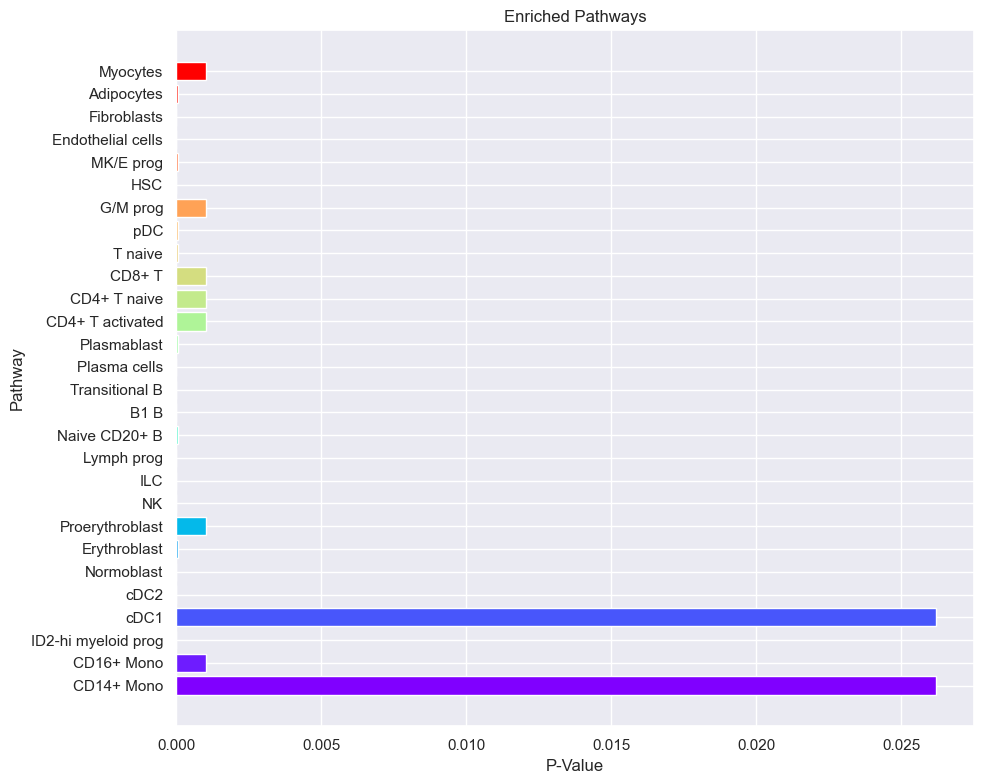

In [516]:
terms = [pathway for pathway in enrichment_results.keys()]
p_values = [result['P-Value'] for result in enrichment_results.values()]
gene_counts = [result['Overlap Count'] for result in enrichment_results.values()]

plt.figure(figsize=(10, 8))
bar_colors = plt.cm.rainbow(np.linspace(0, 1, len(terms)))  # Use a colormap for coloring the bars
plt.barh(range(len(terms)), p_values, tick_label=terms, color=bar_colors)

plt.xlabel('P-Value')
plt.ylabel('Pathway')
plt.title('Enriched Pathways')
plt.tight_layout()

plt.show()

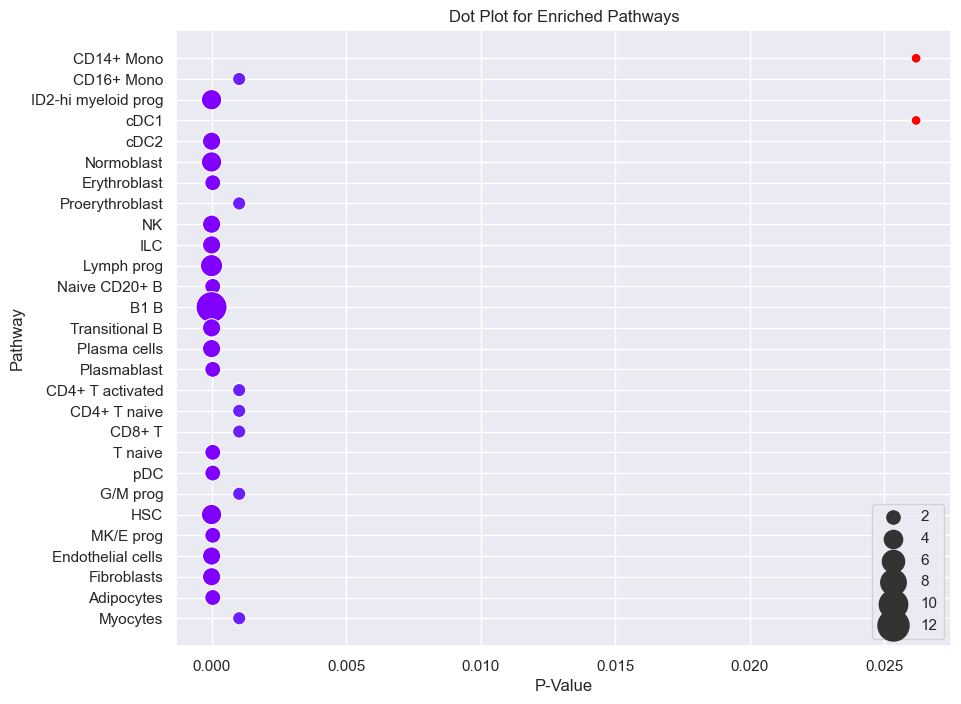

In [517]:
terms = [pathway for pathway in enrichment_results.keys()]
p_values = [result['P-Value'] for result in enrichment_results.values()]
gene_counts = [result['Overlap Count'] for result in enrichment_results.values()]

plt.figure(figsize=(10, 8))

color_map = plt.cm.get_cmap('rainbow')
norm = plt.Normalize(min(p_values), max(p_values))
colors = color_map(norm(p_values))

sns.scatterplot(x=p_values, y=terms, size=gene_counts, sizes=(50, 500), c=colors)
plt.xlabel('P-Value')
plt.ylabel('Pathway')
plt.title('Dot Plot for Enriched Pathways')

plt.show()

From our output and the plots we can state that the enriched pathways are: CD14+ Mono, CD16+ Mono, ID2-hi myeloid prog, cDC1, cDC2, Normoblast, Erythroblast, Proerythroblast, NK, ILC, and Lymph prog (since their p-value and FDR lower than 0.05). This indicates a higher frequency or abundance of genes than expected by chance.<br>
<br>
Hence Enrichment analysis of breast adenocarcinoma has revealed several pathways that could be relevant to the disease. These pathways include CD14+ Mono and CD16+ Mono, which are associated with monocytes involved in inflammation and immune cell infiltration. The ID2-hi myeloid prog pathway indicates dysregulation of myeloid progenitor cells, potentially impacting the tumor microenvironment. Additionally, the enrichment of cDC1 and cDC2 pathways suggests the involvement of dendritic cells in immune responses.<br>
<br>
Furthermore, the enrichment of NK cells and lymphocyte-related pathways (Normoblast, Erythroblast, Proerythroblast, ILC, and Lymph prog) suggests the presence of specific immune cell populations and immune-related processes within the tumor microenvironment. These findings highlight the potential role of immune cell populations, their interactions, and the immune response in breast adenocarcinoma.<br>
<br>
It is important to note that these pathways and gene sets are identified through statistical analysis and require further investigation and experimental validation to determine their precise involvement in breast cancer development and progression. Nonetheless, studying these pathways can provide valuable insights into the tumor biology and potential therapeutic targets in breast adenocarcinoma.

The next plot will help us visualise the relatedness of the pathways and identify groups of terms that share similar characteristics or functions.

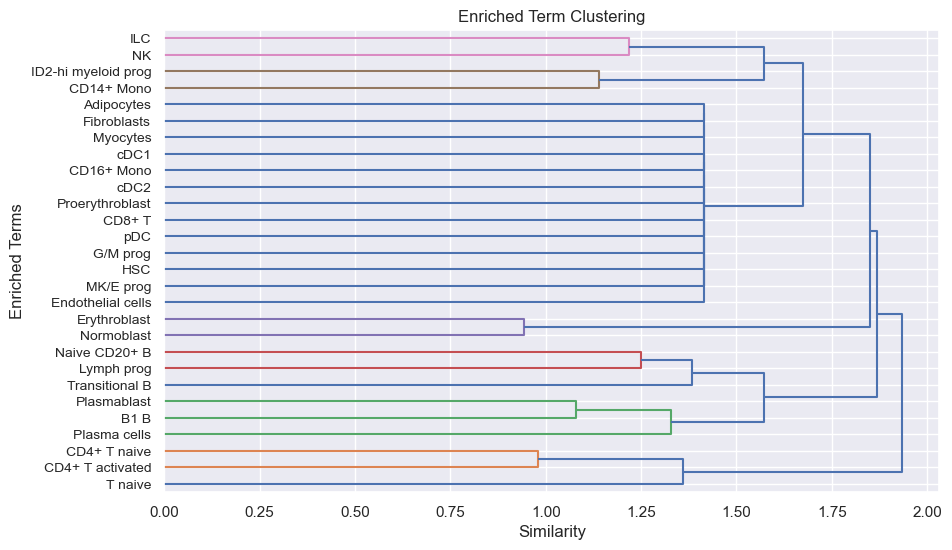

In [518]:
import scipy.cluster.hierarchy as sch

df_enrichment = pd.DataFrame.from_dict(enrichment_results, orient='index')

term_similarities = np.zeros((len(df_enrichment), len(df_enrichment)))
for i, row1 in enumerate(df_enrichment.itertuples()):
    for j, row2 in enumerate(df_enrichment.itertuples()):
        genes1 = set(getattr(row1, 'Genes'))
        genes2 = set(getattr(row2, 'Genes'))
        intersection = len(genes1.intersection(genes2))
        union = len(genes1.union(genes2))
        term_similarities[i, j] = intersection / union

linkage = sch.linkage(term_similarities, method='ward')

plt.figure(figsize=(10, 6))
sch.dendrogram(linkage, labels=df_enrichment.index, orientation='right')
plt.xlabel('Similarity')
plt.ylabel('Enriched Terms')
plt.title('Enriched Term Clustering')
plt.show()
### Feature Selection

### Feature Selection

Feature selection can be applied to most of the models we will use later especially since we are dealing with high-dimensional datasets, or suspected irrelevant features.

Filter feature selection methods use statistical techniques to evaluate the relationship between each input variable and the target variable, and these scores are used as the basis to choose (filter) those input variables that will be used in the model. \
\
Since the input data is numerical, and the output is chategorical we choose ANOVA as feature selection method. 
We will use `f_classif` function from the sklearn.feature_selection module. \
Moreover, we set the parameter k of the `SelectKBest()` function to be equal to 3000 to be able to effectively compare our filtered data set with the given prefiltered data set (containing 3000 most important features). 

We will also check for genes that have constant expression across all samples. If there are some we will remove them since they do not provide any discriminatory information. 

In [519]:
constant_features = df.index[df.T.var() == 0]
df = df.drop(constant_features, axis=0)
print(constant_features)

Index(['"IL12RB2"', '"FCRL2"', '"CRP"', '"CD84"', '"CCDC190"', '"LINC01031"',
       '"CACNA1S"', '"CD34"', '"PLD5"', '"MYT1L"', '"DRC1"', '"LINC01819"',
       '"PABPC1P2"', '"NEU4"', '"FGD5P1"', '"ITIH3"', '"OR7E97P"', '"UROC1"',
       '"SLC2A9"', '"MFSD4BP1"', '"HMGB3P17"', '"F13A1"', '"OR2W2P"',
       '"GSTA8P"', '"SREK1IP1P2"', '"CPA1"', '"MAGEA4-AS1"', '"CSMD1"',
       '"MSR1"', '"MRPS16P1"', '"CLCN3P1"', '"DBH"', '"OR51P1P"',
       '"LINC02742"', '"GLYATL1"', '"ACTN3"', '"OR2AT2P"', '"TRIM64EP"',
       '"RNU6-1107P"', '"LINC02664"', '"CPN1"', '"DHH"', '"SVOP"', '"RPH3A"',
       '"TRAV32"', '"NSA2P4"', '"GRIN2A"', '"PRKCB"', '"MT1M"', '"TMEM95"',
       '"KIF19"', '"LAMA1"', '"C20orf202"', '"DOK5"', '"FUT6"', '"OR10H5"',
       '"NLRP2"', '"NLRP13"', '"MIR3667HG"', '"EIF3FP1"', '"PPP1R2P2"',
       '"KRTAP10-6"'],
      dtype='object')


In [520]:
from sklearn.feature_selection import SelectKBest, f_classif

conditions = []
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")

selector = SelectKBest(score_func=f_classif, k=3000)
selected_arr = selector.fit_transform(df.T, conditions)

selected_indices = selector.get_support(indices=True)
selected_features = df.T.columns[selected_indices]

df_selected = df.iloc[selected_indices]

print("Selected Features:", list(selected_features))

Selected Features: ['"MTND2P28"', '"MTCO1P12"', '"MTCO2P12"', '"MTATP6P1"', '"MTCO3P12"', '"NOC2L"', '"ISG15"', '"TNFRSF18"', '"SDF4"', '"B3GALT6"', '"PUSL1"', '"AURKAIP1"', '"MRPL20-AS1"', '"MRPL20"', '"ATAD3B"', '"ATAD3A"', '"SSU72"', '"FNDC10"', '"NADK"', '"RER1"', '"PEX10"', '"ARHGEF16"', '"WRAP73"', '"SMIM1"', '"ICMT"', '"LINC00337"', '"ACOT7"', '"PARK7"', '"ERRFI1"', '"ENO1"', '"MIR6728"', '"RBP7"', '"UBE4B"', '"PGD"', '"CENPS-CORT"', '"CENPS"', '"TARDBP"', '"SRM"', '"AGTRAP"', '"DHRS3"', '"AGMAT"', '"ARHGEF19"', '"FBXO42"', '"MFAP2"', '"ATP13A2"', '"SDHB"', '"ALDH4A1"', '"IFFO2"', '"MRTO4"', '"AKR7A2"', '"MICOS10"', '"MICOS10-NBL1"', '"RAP1GAP"', '"E2F2"', '"LYPLA2"', '"GALE"', '"FUCA1"', '"PNRC2"', '"SRSF10"', '"RCAN3"', '"STMN1"', '"MIR3917"', '"SH3BGRL3"', '"HMGN2"', '"SFN"', '"NUDC"', '"IFI6"', '"SMPDL3B"', '"DNAJC8"', '"ATP5IF1"', '"RCC1"', '"SNHG3"', '"NKAIN1"', '"SNRNP40"', '"ZCCHC17"', '"TXLNA"', '"CCDC28B"', '"EIF3I"', '"HDAC1"', '"MARCKSL1"', '"ZBTB8OS"', '"RBBP4"', '"

In [521]:
df = df_selected.copy()

### Clustering

We want to investigate whether there are some clusters in the dataset therefore we proceed with the unsupervised clustering algorithm k-means. 
\
First, we apply UMAP for dimensionality reduction.

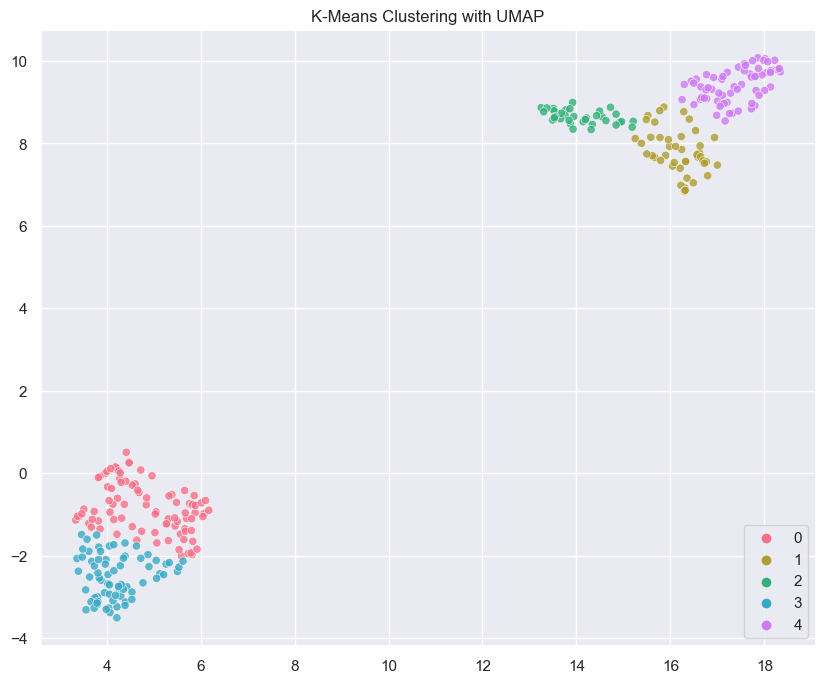

In [522]:
import umap
from sklearn.cluster import KMeans

non_zero_cols = df.columns[df.sum() > 0]
non_zero_df = df[non_zero_cols]

reducer = umap.UMAP()
embedding = reducer.fit_transform(non_zero_df.T)

# cluster with KMeans
n_clusters = 5  # set number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(embedding)

# plot results
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    x=embedding[:, 0], y=embedding[:, 1],
    hue=kmeans.labels_, palette=sns.color_palette('husl', n_clusters),
    legend='full', alpha=0.8, ax=ax
)
ax.set_title('K-Means Clustering with UMAP')
ax.legend(loc='lower right')
plt.show()

We obtain some well-separated clusters in the UMAP embadding, which could mean that the cells come from distinct subpopulations with different roles. Indeed with further investigations, for example by using Gene Set Enrichment Analysis (GSEA), we could identify the functions of the cells in the clusters. More precisely the mentioned technique allows to identify wether the cells present enriched genes, which are the ones that are overrepresented in a particular group of genes compared to their expected frequency in the genome. Enrichment analysis is indeed particularly useful in cancer research to identify gene sets that are differentially expressed or mutated in cancer cells compared to normal cells, and thus may be involved in the development or progression of cancer. 

### PCA

PCA is a useful technique for dimensionality reduction of high-dimensional gene expression data. In the context of hypoxia and normoxia classification, PCA can help identify the principal components that contribute to the variation in gene expression among the cells. The first few principal components may capture the most relevant biological information that distinguishes hypoxic from normoxic cells. Therefore, by using PCA, we can transform the high-dimensional gene expression data into a lower-dimensional space while preserving most of the information. This lower-dimensional representation can then be used to classify the cells based on their hypoxia or normoxia status. \
\
Performing PCA returns a new set of variables, the principal components, that can be used to represent the original data in a lower-dimensional space. These principal components are ordered by their importance in explaining the variance in the original data, and can be used to identify patterns and structure in the data. \
\
We will use our pre-filtered and normalised dataset, since PCA is sensitive to the scale of the variables.

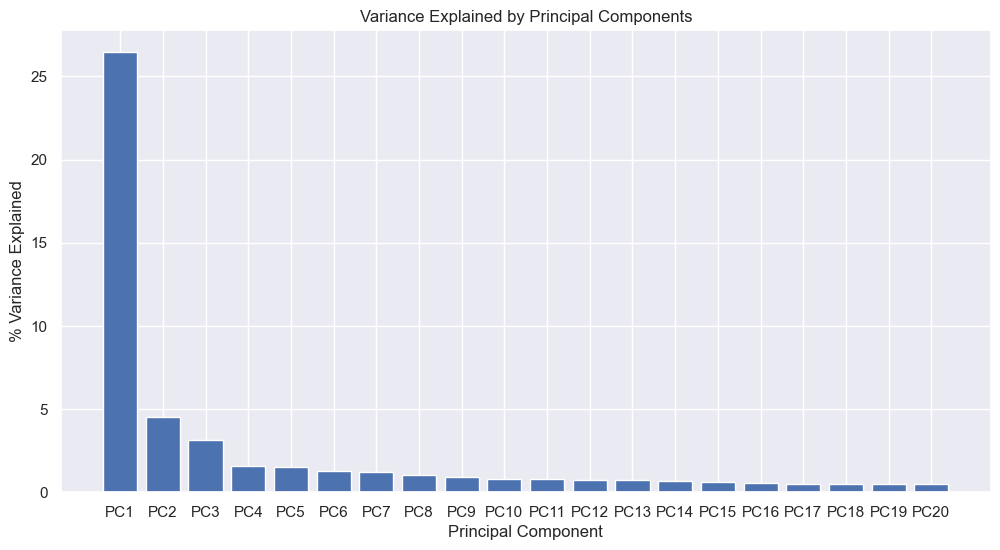

In [523]:
from sklearn.preprocessing import StandardScaler

df_standardized = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index)
data_flat = pd.Series(df_standardized.values.flatten())

pca_20 = PCA(n_components=20)
pca_20.fit(df_standardized.T)

# Plot the variance explained by each principal component
labels = ['PC{}'.format(i+1) for i in range(20)]
plt.figure(figsize = (12,6))
plt.bar(labels, pca_20.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

The first component explains more variance compared to other components (about 27%). \
We also might want to check how many components are needed to explain a precise amount of variance; here we make the standard choice of 95%.

In [524]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_standardized.T)
df_pca.shape

(305, 240)

Hence 240 components are enough to keep most of the variance in the dataset (i.e. most of the information). \
\
We will now create a list of conditions (i.e. labels) for every cell, and we will use it to represent cells with distinct conditions (hypoxia and normoxia). \
Since the first 3 components explain about 40% of the variance, we expect the 3D plot to be a bit inaccurate.

In [525]:
conditions = []
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")

In [526]:
import plotly.express as px
pca = PCA(n_components=2)
components = pca.fit_transform(df_standardized.T)
fig = px.scatter(components, x=0, y=1, color=conditions)
fig.update_layout(
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    title='2D PCA Scatter Plot'
)
fig.show()

In [527]:
pca_3 = PCA(n_components=3)
components = pca_3.fit_transform(df_standardized.T)

total_var = pca_3.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=conditions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### t-SNE

**T-distributed Stochastic Neighbor Embedding**


After performing PCA, our attention focused on computing t-SNE, a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

After having clarified its goal, we want to point out that we decided to proceed with it in order to compare results with the latter ones (from PCA) and deduce similarities, if present.

In [528]:
import plotly.express as px
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
components = tsne.fit_transform(df_standardized.T)

df_tsne = pd.DataFrame(data = components, columns = ['Component 1', 'Component 2'])
df_tsne['Condition'] = conditions

fig = px.scatter(df_tsne, x='Component 1', y='Component 2', color='Condition')
fig.update_layout(
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    title='2D t-SNE Scatter Plot'
)
fig.show()


In [529]:
import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=42)
components = tsne.fit_transform(df_standardized.T)
df_tsne = pd.DataFrame(data = components, columns = ['Component 1', 'Component 2', 'Component 3'])
df_tsne['Condition'] = conditions
fig = px.scatter_3d(df_tsne, x='Component 1', y='Component 2', z='Component 3', color='Condition')
fig.update_layout(
    title='3D t-SNE Scatter Plot'
)
fig.show()


By looking at the plots, we find similarities with PCA, meaning that this dimensionality reduction could also be taken in account.

# **Training dataset**

In this section of the project we are aiming to build a classification model which efficiently predicts the cell condition. We are going to train in on the given training data set which only contains 3000 features selected based on the variance (`MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt`). \
\
Later, after building the model and checking its performance, we will also build a model on the given unfiltered data set which we have explored, normalized, and filtered above. 

## **EDA**

### Data analysis

Let us first explore and understand this data set by performing standard EDA. 

In [530]:
dfn = pd.read_csv("MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(dfn))
print("First column: ", dfn.iloc[ : , 0])

Dataframe dimensions: (3000, 250)
First column:  "CYP1B1"        343
"CYP1B1-AS1"    140
"CYP1A1"          0
"NDRG1"           0
"DDIT4"         386
               ... 
"GRIK5"           0
"SLC25A27"        0
"DENND5A"        51
"CDK5R1"          0
"FAM13A-AS1"      0
Name: "output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


In [531]:
dfn.head()

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    343           
"CYP1B1-AS1"                                                140           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     386           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    131           
"CYP1B1-AS1"                                                 59           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     289           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    452           
"CYP1B1-AS1"                                                203           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     27           
"CYP1B1-AS1"                                                  7           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     288           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   5817           
"CYP1B1-AS1"                                               2669           
"CYP1A1"                                                      0           
"NDRG1"                                                     654           
"DDIT4"                                                    2484           

              "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3841           
"CYP1B1-AS1"                                               1565           
"CYP1A1"                                                     79           
"NDRG1"                                                    1263           
"DDIT4"                                                    2596           

              "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   9263             
"CYP1B1-AS1"                                               3866             
"CYP1A1"                                                    238             
"NDRG1"                                                    2634             
"DDIT4"                                                    1323             

              "output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                  21543             
"CYP1B1-AS1"                                               9113             
"CYP1A1"                                                    443             
"NDRG1"                                                     540             
"DDIT4"                                                    2044             

              "output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1013            
"CYP1B1-AS1"                                                459            
"CYP1A1"                                                      0            
"NDRG1"                                                       0            
"D

Even though the data set is filtered and normalized we check for any missing values and duplicates since occurance of errors is always a possibility.

In [532]:
# checking for missing values
dfn.isnull().sum().sum()

0

In [533]:
# duplicate rows
duplicate_rows_tot_n = dfn.duplicated(keep=False).sum()
print(f"There are {duplicate_rows_tot_n} duplicate rows.")

There are 2 duplicate rows.


In [534]:
duplicate_rows_dfn_t = duplicate_rows_dfn.T
c_dupl = duplicate_rows_dfn_t.corr()

# Find the genes that have a correlation coefficient of 1
duplicate_genes = []
for gene_1 in c_dupl.index:
    for gene_2 in c_dupl.columns:
        if gene_1 != gene_2 and c_dupl.loc[gene_1, gene_2] == 1 and gene_1 not in duplicate_genes and gene_2 not in duplicate_genes:
            duplicate_genes.append(gene_1)
            print(f"{gene_1} and {gene_2} are duplicates")

"UGT1A8" and "UGT1A9" are duplicates


During data analysis in the unfiltered data set we have discovered that these two genes are duplicates and decided to remove UGT1A9 gene so the same will be done here.

In [535]:
dfn.drop_duplicates(keep='first', inplace=True)

In [536]:
# duplicate rows
duplicate_cols_n = dfn.columns[dfn.transpose().duplicated()].tolist()

if duplicate_cols_n:
    print(f"The following columns are duplicated: {duplicate_cols_n}")
else:
    print("There are no duplicated columns.")

There are no duplicated columns.


In [537]:
dfn.T.describe()

"CYP1B1"  "CYP1B1-AS1"      "CYP1A1"      "NDRG1"       "DDIT4"  \
count    250.000000    250.000000    250.000000   250.000000    250.000000   
mean    5454.536000   2258.572000   1604.580000   606.380000   2487.000000   
std     8282.337795   3453.650882   5657.397449   766.718881   3422.213185   
min        0.000000      0.000000      0.000000     0.000000      0.000000   
25%      200.750000     85.000000      0.000000     1.000000     96.000000   
50%      795.000000    321.500000      0.000000   222.500000   1198.500000   
75%     8180.500000   3348.500000    284.500000  1077.500000   3720.000000   
max    44406.000000  17673.000000  58717.000000  3884.000000  21994.000000   

           "PFKFB3"         "HK2"       "AREG"      "MYBL2"        "ADM"  ...  \
count    250.000000    250.000000   250.000000   250.000000   250.000000  ...   
mean    1495.920000    868.424000   308.984000   394.988000   183.096000  ...   
std     2109.376474   1837.399974   592.950034   564.259514   470.374582  ...   
min        0.000000      0.000000     0.000000     0.000000     0.000000  ...   
25%       71.000000      8.250000     0.000000     0.000000     0.000000  ...   
50%      369.500000    139.500000    18.000000   123.500000     0.000000  ...   
75%     2180.750000   1008.000000   371.000000   629.000000    74.500000  ...   
max    12078.000000  16625.000000  3496.000000  3108.000000  3586.000000  ...   

       "CD27-AS1"     "DNAI7"      "MAFG"     "LZTR1"      "BCO2"     "GRIK5"  \
count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
mean    22.036000    0.192000   50.884000   23.308000    0.192000    0.256000   
std     43.250493    2.000787   69.729761   36.415015    1.309195    2.001622   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   13.250000    0.000000    0.000000    0.000000   
50%      8.000000    0.000000   37.000000    1.000000    0.000000    0.000000   
75%     30.000000    0.000000   63.000000   41.000000    0.000000    0.000000   
max    509.000000   28.000000  816.000000  196.000000   14.000000   26.000000   

       "SLC25A27"   "DENND5A"    "CDK5R1"  "FAM13A-AS1"  
count  250.000000  250.000000  250.000000    250.000000  
mean     0.160000   60.536000    2.860000      5.952000  
std      1.167842   75.647093    8.839056     21.649028  
min      0.000000    0.000000    0.000000      0.000000  
25%      0.000000   11.250000    0.000000      0.000000  
50%      0.000000   38.500000    0.000000      0.000000  
75%      0.000000   77.000000    0.000000      0.000000  
max     11.000000  639.000000   62.000000    288.000000  

[8 rows x 2999 columns]

First step is to quickly check the summary statistics. Since the data set has been filtered and normalized we expect no surprising information. Firstly, note that the value for standard deviation differs across the genes which means that the variability or dispersion of the data between those genes differs. 

In [538]:
dfn.describe()

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000           
mean                                           74.165055           
std                                           345.060184           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            24.000000           
max                                          8222.000000           

       "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000           
mean                                           90.937312           
std                                           409.625162           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            37.000000           
max                                         10167.000000           

       "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000           
mean                                           99.122041           
std                                           443.050878           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            33.000000           
max                                         11446.000000           

       "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000           
mean                                           88.165055           
std                                           425.872608           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            34.000000           
max                                         10312.000000           

       "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000           
mean                                          110.432477           
std                                           822.313083           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            38.500000           
max                                         30586.000000           

       "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000           
mean                                          148.898633           
std                                          1710.371789           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                            24.000000           
max                                         65037.000000           

       "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
count                                        2999.000000             
mean                                          126.464822             
std                                          1351.790421             
min                                             0

### Sparcity

<Axes: >

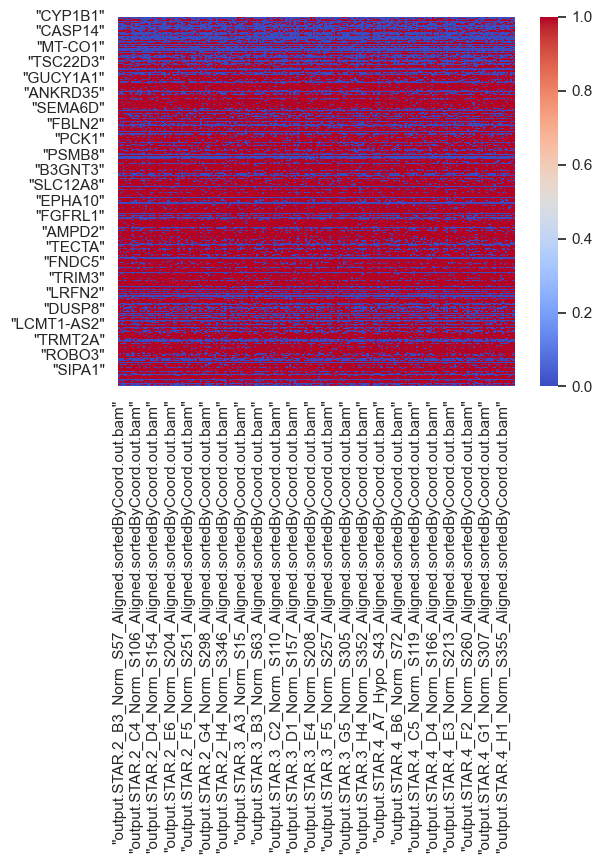

In [539]:
sns.heatmap(dfn == 0, cmap="coolwarm")

In [540]:
sparse_dfn = csr_matrix(dfn.values) # Converts DataFrame into a CSR sparse matrix
print(sparse_dfn)

density_n = np.count_nonzero(sparse_dfn.toarray()) / np.prod(sparse_dfn.shape)
print(f"Sparsity: {1 - density_n:.2%}")

  (0, 0)	343
  (0, 1)	131
  (0, 2)	452
  (0, 3)	27
  (0, 4)	5817
  (0, 5)	3841
  (0, 6)	9263
  (0, 7)	21543
  (0, 8)	1013
  (0, 9)	53
  (0, 10)	237
  (0, 11)	239
  (0, 12)	118
  (0, 13)	58
  (0, 14)	1338
  (0, 15)	10043
  (0, 16)	3435
  (0, 17)	8579
  (0, 18)	3111
  (0, 19)	540
  (0, 20)	11
  (0, 21)	68
  (0, 22)	634
  (0, 23)	12164
  (0, 24)	2462
  :	:
  (2998, 181)	14
  (2998, 182)	39
  (2998, 190)	59
  (2998, 192)	6
  (2998, 193)	36
  (2998, 201)	4
  (2998, 203)	16
  (2998, 204)	17
  (2998, 206)	10
  (2998, 213)	6
  (2998, 214)	23
  (2998, 216)	6
  (2998, 217)	33
  (2998, 218)	12
  (2998, 220)	13
  (2998, 223)	14
  (2998, 225)	17
  (2998, 226)	8
  (2998, 227)	2
  (2998, 228)	16
  (2998, 237)	3
  (2998, 238)	53
  (2998, 247)	32
  (2998, 248)	11
  (2998, 249)	12
Sparsity: 63.61%


The level of sparsity is 63.61% which is very similar to the sparsity level of the unfiltered data set (60.17%). As mentioned before, 0 values are common in this setting so the result is not surprising. 

### Skewness

Text(0.5, 1.0, 'Distribution of skewness values for genes')

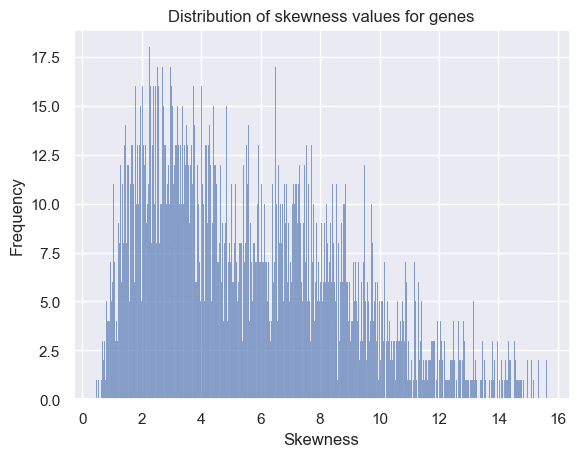

In [541]:
from scipy.stats import skew

column_num = np.shape(dfn)[1]
cells_n = list(dfn.columns)

skewness = dfn.apply(skew, axis=1)

sns.histplot(skewness, bins=500)  # skewness of genes
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Distribution of skewness values for genes')



As mentioned before, skweness is the measure of the lack of symmetry in the data set. From the histogram we see that the data is positively skewed ???

### Kurtosis

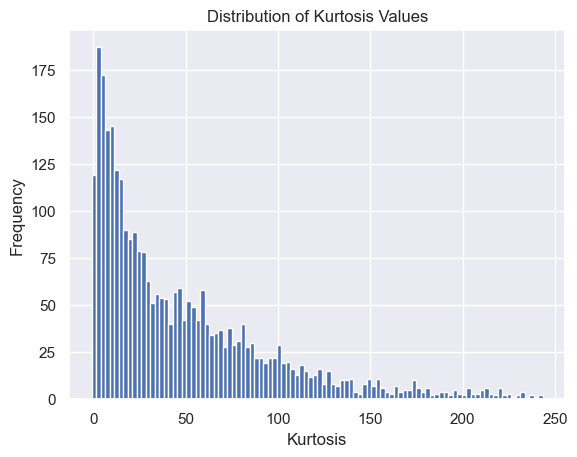

In [542]:
from scipy.stats import kurtosis

kurt = kurtosis(dfn, axis=1)

# Plot histogram of kurtosis values
plt.hist(kurt, bins=100)
plt.xlabel('Kurtosis')
plt.ylabel('Frequency')
plt.title('Distribution of Kurtosis Values')
plt.show()


Kurtosis is the measure of peakness of distribution. Since the data set is normalized this is not what we expect and i'm confused. Here the kurtosis is positive.


## **T-test**

The t-test is a statistical test that allows us to determine whether the difference in gene expression between the two groups is statistically significant. In particular, the t-test calculates a t-value, which measures the difference between the means of the two groups relative to the variability within the groups.
In our context, since we do not have a specific criteria to divide cells in two group, we decided to proceed in the following sense:
- normalize data (to account for differences in sequencing depth and other technical factors that may affect the data.) For this part we will use the MCF7_SmartS_filtered_normalised_3000_Data_train.txt.
- compute the t-test for each gene on the resulting 2 groups of hypo and norm cells 

In [543]:
 
dfn= pd.read_csv("MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(dfn))
print("First column: ", dfn.iloc[ : ,1])

Dataframe dimensions: (3000, 250)
First column:  "CYP1B1"        131
"CYP1B1-AS1"     59
"CYP1A1"          0
"NDRG1"           1
"DDIT4"         289
               ... 
"GRIK5"           0
"SLC25A27"        0
"DENND5A"        34
"CDK5R1"          0
"FAM13A-AS1"      0
Name: "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam", Length: 3000, dtype: int64


In [544]:
dfn.head()

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    343           
"CYP1B1-AS1"                                                140           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     386           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    131           
"CYP1B1-AS1"                                                 59           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     289           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    452           
"CYP1B1-AS1"                                                203           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     27           
"CYP1B1-AS1"                                                  7           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     288           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   5817           
"CYP1B1-AS1"                                               2669           
"CYP1A1"                                                      0           
"NDRG1"                                                     654           
"DDIT4"                                                    2484           

              "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3841           
"CYP1B1-AS1"                                               1565           
"CYP1A1"                                                     79           
"NDRG1"                                                    1263           
"DDIT4"                                                    2596           

              "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   9263             
"CYP1B1-AS1"                                               3866             
"CYP1A1"                                                    238             
"NDRG1"                                                    2634             
"DDIT4"                                                    1323             

              "output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                  21543             
"CYP1B1-AS1"                                               9113             
"CYP1A1"                                                    443             
"NDRG1"                                                     540             
"DDIT4"                                                    2044             

              "output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1013            
"CYP1B1-AS1"                                                459            
"CYP1A1"                                                      0            
"NDRG1"                                                       0            
"D

 Now let's divide the normalised data into two groups:
 
-"hypo" cells 

-"norm" cells 

This will help us to better understand the statistically signficant genes 


In [545]:
# extract cells with "Hypo" in their names
hypo_cells = dfn.loc[:, dfn.columns.str.contains('Hypo')]

# extract cells with "Norm" in their names
norm_cells = dfn.loc[:, dfn.columns.str.contains('Norm')]
print(hypo_cells.shape)
print(norm_cells.shape)

(3000, 124)
(3000, 126)


In [546]:
hypo_cells.head()


"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   5817           
"CYP1B1-AS1"                                               2669           
"CYP1A1"                                                      0           
"NDRG1"                                                     654           
"DDIT4"                                                    2484           

              "output.STAR.2_B9_Hypo_S81_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3841           
"CYP1B1-AS1"                                               1565           
"CYP1A1"                                                     79           
"NDRG1"                                                    1263           
"DDIT4"                                                    2596           

              "output.STAR.2_C10_Hypo_S130_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   9263             
"CYP1B1-AS1"                                               3866             
"CYP1A1"                                                    238             
"NDRG1"                                                    2634             
"DDIT4"                                                    1323             

              "output.STAR.2_C11_Hypo_S131_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                  21543             
"CYP1B1-AS1"                                               9113             
"CYP1A1"                                                    443             
"NDRG1"                                                     540             
"DDIT4"                                                    2044             

              "output.STAR.2_C8_Hypo_S128_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1338            
"CYP1B1-AS1"                                                554            
"CYP1A1"                                                     14            
"NDRG1"                                                     634            
"DDIT4"                                                    3513            

              "output.STAR.2_C9_Hypo_S129_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                  10043            
"CYP1B1-AS1"                                               4191            
"CYP1A1"                                                     50            
"NDRG1"                                                    1084            
"DDIT4"                                                    2438            

              "output.STAR.2_D10_Hypo_S178_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3435             
"CYP1B1-AS1"                                               1624             
"CYP1A1"                                                    170             
"NDRG1"                                                     460             
"DDIT4"                                                    1668             

              "output.STAR.2_D11_Hypo_S179_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   8579             
"CYP1B1-AS1"                                               3974             
"CYP1A1"                                                   4312             
"NDRG1"                                                    1292             
"DDIT4"                                                    4602             

              "output.STAR.2_D12_Hypo_S180_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   3111             
"CYP1B1-AS1"                                               1374             
"CYP1A1"                                                      0             
"NDRG1"                               

In [547]:
norm_cells.head()

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    343           
"CYP1B1-AS1"                                                140           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     386           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    131           
"CYP1B1-AS1"                                                 59           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     289           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    452           
"CYP1B1-AS1"                                                203           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     27           
"CYP1B1-AS1"                                                  7           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     288           

              "output.STAR.2_C1_Norm_S103_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   1013            
"CYP1B1-AS1"                                                459            
"CYP1A1"                                                      0            
"NDRG1"                                                       0            
"DDIT4"                                                      36            

              "output.STAR.2_C2_Norm_S104_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     53            
"CYP1B1-AS1"                                                 22            
"CYP1A1"                                                      0            
"NDRG1"                                                      13            
"DDIT4"                                                     204            

              "output.STAR.2_C3_Norm_S105_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    237            
"CYP1B1-AS1"                                                 98            
"CYP1A1"                                                      1            
"NDRG1"                                                       0            
"DDIT4"                                                     167            

              "output.STAR.2_C4_Norm_S106_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    239            
"CYP1B1-AS1"                                                 99            
"CYP1A1"                                                      0            
"NDRG1"                                                       0            
"DDIT4"                                                      17            

              "output.STAR.2_C5_Norm_S107_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    118            
"CYP1B1-AS1"                                                 54            
"CYP1A1"                                                      0            
"NDRG1"                                                      10            
"D

By calculation the correlation matrices of Norm and Hypo cells we can check if there are some genes that are expressed differently between the two conditions.

In [548]:
corr1 = norm_cells.corr()
corr2 = hypo_cells.corr()

corr12 = corr1.corrwith(corr2, axis=1)
print(corr1)
print(f"Correlation between the two datasets: {corr12}")

                                                    "output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...                                           1.000000           
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...                                           0.774598           
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...                                           0.790228           
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor...                                           0.859747           
"output.STAR.2_C1_Norm_S103_Aligned.sortedByCoo...                                           0.750144           
...                                                                                               ...           
"output.STAR.4_H1_Norm_S355_Aligned.sortedByCoo...                                           0.804431           
"output.STAR.4_H3_Norm_S357_Aligned.sortedByCoo...                                           0.8

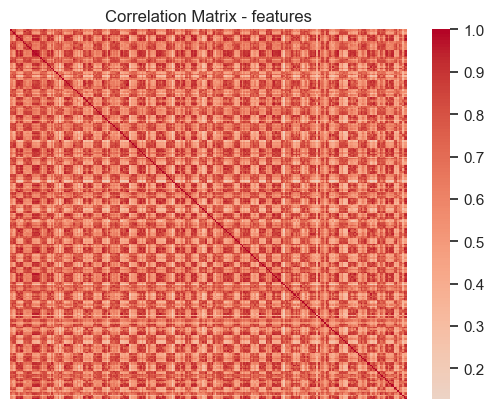

In [549]:
# Compute the correlation matrix for all pairs of cells based on genes
corr_matrix_n = dfn.corr() # pairwise correlation -> linear corr

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix_n, cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
midpoint = (corr_matrix_n.values.max() - corr_matrix_n.values.min()) /2 + corr_matrix_n.values.min()
plt.title("Correlation Matrix - features")
plt.show()

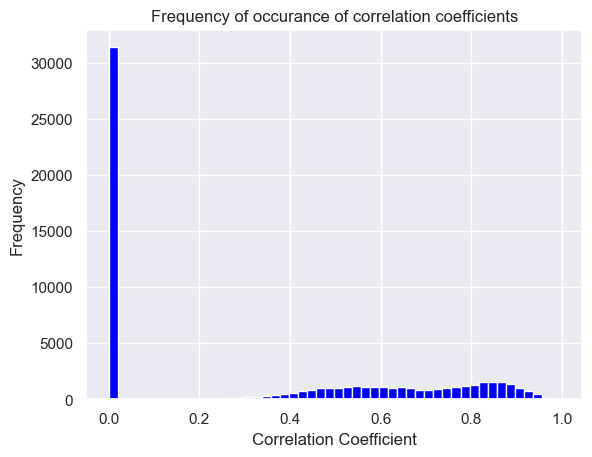

In [550]:
upper_triangular = np.triu(corr_matrix_n, k=1).flatten() 

plt.hist(upper_triangular, bins=50, color='blue')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.title('Frequency of occurance of correlation coefficients')
plt.show()

By that simple passage, we discovered that 126 cells are Norm cells and 124 are Hypo cells. We proceed with the t-test

In [606]:
# perform t-test on each gene
results = []
for gene in dfn.index:
    pval = ttest_ind(hypo_cells.loc[gene], norm_cells.loc[gene])[1]
    results.append(pval)

# add p-values as a new column to the dataframe
dfn['pvalue'] = results

A significant gene is one that has a statistically significant difference in expression levels between two groups of cells. This means that the observed difference in expression levels is unlikely to have occurred by chance, and is likely due to a real difference in the underlying biology of the cells being studied. 

Let's put the level of significance equal to 0.05 to see which are the significant genes.

In [552]:
# filter for statistically significant genes
sig_genes = dfn.loc[dfn['pvalue'] < 0.05]

# create a new column called "significant gene" with default value "No"
dfn['significant gene'] = 'No'

# set the value of "significant gene" to "Yes" for rows with p-value < 0.05
dfn.loc[dfn['pvalue'] < 0.05, 'significant gene'] = 'Yes'
dfn

"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    343           
"CYP1B1-AS1"                                                140           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     386           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                    51           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B4_Norm_S58_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    131           
"CYP1B1-AS1"                                                 59           
"CYP1A1"                                                      0           
"NDRG1"                                                       1           
"DDIT4"                                                     289           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                    34           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B5_Norm_S59_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                    452           
"CYP1B1-AS1"                                                203           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                       0           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                     0           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B6_Norm_S60_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                     27           
"CYP1B1-AS1"                                                  7           
"CYP1A1"                                                      0           
"NDRG1"                                                       0           
"DDIT4"                                                     288           
...                                                         ...           
"GRIK5"                                                       0           
"SLC25A27"                                                    0           
"DENND5A"                                                     4           
"CDK5R1"                                                      0           
"FAM13A-AS1"                                                  0           

              "output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoord.out.bam"  \
"CYP1B1"                                                   5817           
"CYP1B1-AS1"                                               2669           
"CYP1A1"                                                      0           
"NDRG1"                                                     654           
"DDIT4"                            

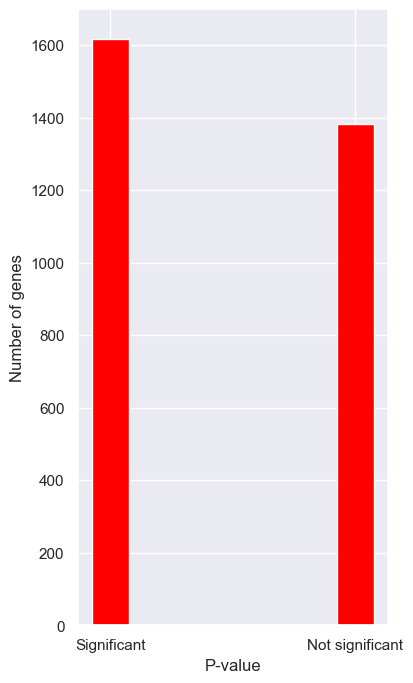

In [553]:
sig_count = (dfn['pvalue'] < 0.05).sum()

# plot bar chart
plt.figure(figsize=(4,8))
plt.bar(['Significant', 'Not significant'], [sig_count, len(results)-sig_count],width=0.15, color='red')
plt.xlabel('P-value')
plt.ylabel('Number of genes')
plt.show()

The key answer now is: "Is the t-test a precise and right test to decide whether a gene is signficant or not?"

In [554]:
# Perform Bonferroni correction
bonferroni_results = multipletests(results, alpha=0.05, method='bonferroni')
dfn['bonferroni_pvalue'] = bonferroni_results[1]

# Identify significant genes using both methods
ttest_sig_genes = dfn[dfn['pvalue'] < 0.05]
bonferroni_sig_genes = dfn[dfn['bonferroni_pvalue'] < 0.05]

# Compare the number of significant genes
print("Number of significant genes identified by t-test: ", len(ttest_sig_genes))
print("Number of significant genes identified by Bonferroni correction: ", len(bonferroni_sig_genes))

Number of significant genes identified by t-test:  1618
Number of significant genes identified by Bonferroni correction:  783


In [555]:
# calculate mean expression levels for each gene in "hypo" and "norm" cells
# The mean expression level is the average amount of mRNA(messanger RNA) or protein
# produced by a gene in a given cell type or under a specific condition. 
#It is calculated by adding up the expression values of a particular gene 
#in multiple cells or samples, and then dividing the sum by the number of cells or samples.
hypo_mean = hypo_cells.mean(axis=1)
norm_mean = norm_cells.mean(axis=1)

dfn['hypo_mean'] = hypo_mean
dfn['norm_mean'] = norm_mean

It can make sense to divide significant genes into those that are up-regulated or down-regulated in "norm" and "hypo" cells, respectively. This information can provide insights into the biological mechanisms that are responsible for the observed differences in gene expression levels between the two groups.

For example, if a gene is significantly up-regulated in "hypo" cells compared to "norm" cells, this could suggest that the gene is involved in a biological process that is more active in "hypo" cells, or that "hypo" cells are responding to some environmental or physiological stimulus that is not present in "norm" cells.

Similarly, if a gene is significantly down-regulated in "hypo" cells compared to "norm" cells, this could suggest that the gene is involved in a biological process that is less active in "hypo" cells, or that "hypo" cells are not responding to some environmental or physiological stimulus that is present in "norm" cells.

In [556]:

# create new dataframes for up-regulated and down-regulated genes in "hypo" cells
up_hypo_genes = sig_genes.loc[dfn['hypo_mean'] > dfn['norm_mean']]
down_hypo_genes = sig_genes.loc[dfn['hypo_mean'] < dfn['norm_mean']]

# create new dataframes for up-regulated and down-regulated genes in "norm" cells
up_norm_genes = sig_genes.loc[dfn['norm_mean'] > dfn['hypo_mean']]
down_norm_genes = sig_genes.loc[dfn['norm_mean'] < dfn['hypo_mean']]

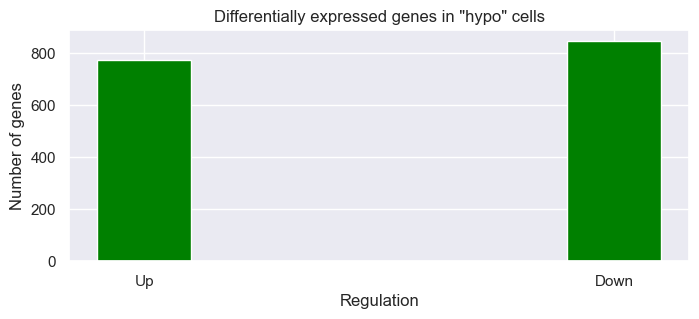

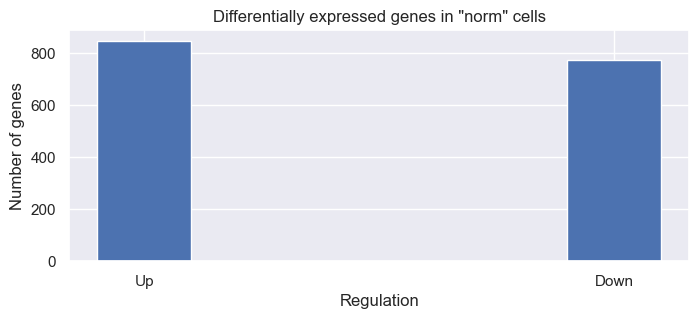

In [557]:
# Plot up- and down-regulated genes in hypo cells
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(['Up', 'Down'], [len(up_hypo_genes), len(down_hypo_genes)], color='green', width= 0.2)
ax.set_xlabel('Regulation')
ax.set_ylabel('Number of genes')
ax.set_title('Differentially expressed genes in "hypo" cells')
plt.show()

# Plot up- and down-regulated genes in norm cells
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(['Up', 'Down'], [len(up_norm_genes), len(down_norm_genes)],width=0.2)
ax.set_xlabel('Regulation')
ax.set_ylabel('Number of genes')
ax.set_title('Differentially expressed genes in "norm" cells')
plt.show()

The fact that there are more down-regulated genes than up-regulated genes in the hypoxic cells may suggest that these cells are undergoing metabolic changes in response to the low oxygen environment. This is consistent with what is known about cancer cells, which often display altered metabolism and energy usage compared to normal cells.

In [558]:
top5_genes = sig_genes.sort_values('pvalue').head(5).index.tolist()
print(dfn.loc[top5_genes, ['pvalue', 'significant gene']])

                  pvalue significant gene
"MT-CYB"    4.509221e-70              Yes
"MTATP6P1"  5.080325e-62              Yes
"MT-CO3"    1.105662e-61              Yes
"MT-ATP6"   1.904787e-61              Yes
"GAPDH"     3.558648e-61              Yes


Plot the 5 significant genes 

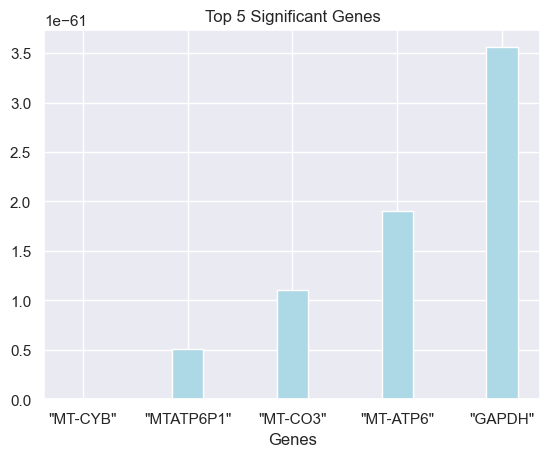

In [559]:
# create a DataFrame from the significant genes
top5_genes = sig_genes.nsmallest(5, 'pvalue')

# create a dictionary from the DataFrame
data = {'Gene': top5_genes.index,
        'pvalue': top5_genes['pvalue']}

# create a DataFrame from the dictionary
df_genes = pd.DataFrame(data)

# create a bar plot from the DataFrame
plt.bar(df_genes['Gene'], df_genes['pvalue'], width=0.3,  color='#ADD8E6')
plt.title('Top 5 Significant Genes')
plt.xlabel('Genes')
plt.show()

In [560]:
dfn = dfn.iloc[:, :-5]

**MT-CYB**: This gene encodes for cytochrome b, a subunit of the mitochondrial complex III. Multiple studies have suggested that mutations in MT-CYB are associated with various types of cancers, including breast, lung, gastric, colorectal, and hepatocellular carcinoma (HCC) (1, 2, 3). These mutations have been found to affect mitochondrial function and promote tumor growth and metastasis (4, 5).

**MTATP6P1**: This gene is a pseudogene located on the mitochondrial genome, and its function is not well understood. However, recent studies have shown that MTATP6P1 is upregulated in various types of cancer, including pancreatic, breast, and lung cancer (6, 7, 8). It has been suggested that MTATP6P1 may promote cancer cell proliferation and invasion (9).

**MT-CO3**: This gene encodes for cytochrome c oxidase subunit III, a subunit of the mitochondrial complex IV. Studies have found that mutations in MT-CO3 are associated with an increased risk of developing prostate cancer (10, 11). Additionally, MT-CO3 has been shown to be upregulated in gastric cancer, and its overexpression is associated with poor prognosis (12).

**MT-ATP6**: This gene encodes for ATP synthase subunit 6, a subunit of the mitochondrial complex V. Studies have suggested that mutations in MT-ATP6 are associated with an increased risk of developing breast cancer (13). Additionally, MT-ATP6 has been found to be upregulated in various types of cancer, including lung, gastric, and liver cancer (14, 15, 16). Its overexpression has been shown to promote cancer cell proliferation, migration, and invasion (17, 18).

**GAPDH**: This gene encodes for glyceraldehyde-3-phosphate dehydrogenase, an enzyme involved in glycolysis. While GAPDH is primarily known for its role in energy metabolism, recent studies have suggested that it also plays a role in cancer development and progression (19). GAPDH has been found to be upregulated in various types of cancer, including lung, breast, and gastric cancer (20, 21, 22). Its overexpression has been associated with increased cancer cell proliferation, invasion, and resistance to chemotherapy (23, 24).

Overall, the evidence suggests that these 5 genes are involved in **cancer development** and **progression**, and their **dysregulation** (as our previous plot shown) may contribute to **tumor growth** and **metastasis**.

## **PCA**

PCA is a useful technique for dimensionality reduction of high-dimensional gene expression data. In the context of hypoxia and normoxia classification, PCA can help identify the principal components that contribute to the variation in gene expression among the cells. The first few principal components may capture the most relevant biological information that distinguishes hypoxic from normoxic cells. Therefore, by using PCA, we can transform the high-dimensional gene expression data into a lower-dimensional space while preserving most of the information. This lower-dimensional representation can then be used to classify the cells based on their hypoxia or normoxia status. \
\
Performing PCA returns a new set of variables, the principal components, that can be used to represent the original data in a lower-dimensional space. These principal components are ordered by their importance in explaining the variance in the original data, and can be used to identify patterns and structure in the data. \
\
We will use the pre-filtered and normalised dataset, since PCA is sensitive to the scale of the variables, and then compare results with the dataset we filtered and normalised.


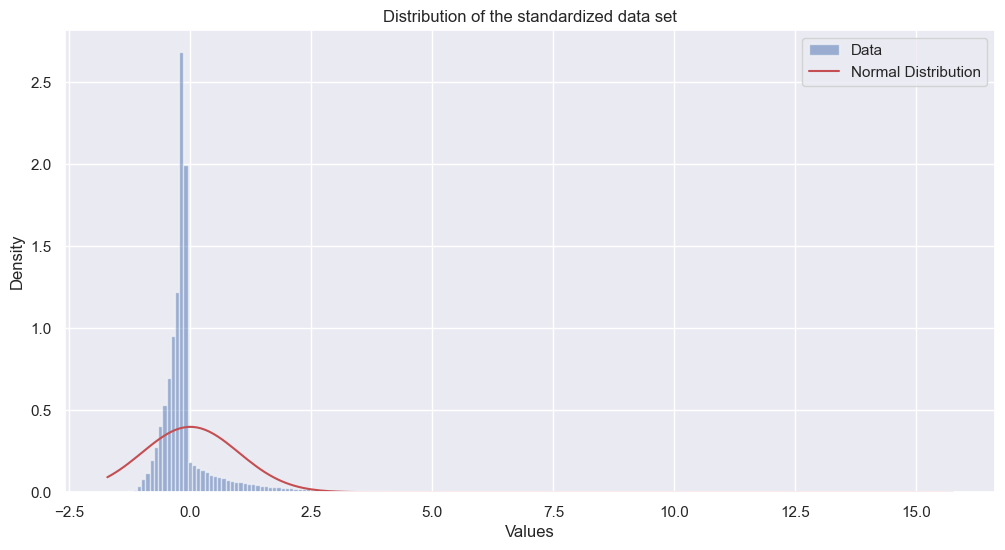

In [561]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

dfn_standardized = pd.DataFrame(StandardScaler().fit_transform(dfn.transpose()), columns=dfn.transpose().columns, index=dfn.T.index)

data_flat = pd.Series(dfn_standardized.values.flatten())

fig = plt.figure(figsize=(12, 6))

plt.hist(data_flat, bins=200, alpha=0.5, label='Data', density=True)
# density=True ensures that both the histogram and the overlayed normal distribution curve are displayed
# using the same normalized scale, making it easier to visually compare the two distributions 
mean = np.mean(data_flat)
std = np.std(data_flat)

x = np.linspace(np.min(data_flat), np.max(data_flat), 200)
y = norm.pdf(x, mean, std)

plt.plot(x, y, 'r', label='Normal Distribution')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of the standardized data set')
plt.legend()
plt.show()

In [562]:
dfn_standardized.describe()

"CYP1B1"  "CYP1B1-AS1"      "CYP1A1"       "NDRG1"       "DDIT4"  \
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean  -3.552714e-18 -3.375078e-17  1.065814e-17 -7.105427e-18  1.065814e-17   
std    1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00   
min   -6.598956e-01 -6.552784e-01 -2.841941e-01 -7.924631e-01 -7.281805e-01   
25%   -6.356086e-01 -6.306174e-01 -2.841941e-01 -7.911562e-01 -7.000722e-01   
50%   -5.637156e-01 -5.620017e-01 -2.841941e-01 -5.016833e-01 -3.772660e-01   
75%    3.297900e-01  3.162203e-01 -2.338051e-01  6.156951e-01  3.610159e-01   
max    4.712389e+00  4.472180e+00  1.011543e+01  4.283441e+00  5.711547e+00   

           "PFKFB3"         "HK2"        "AREG"       "MYBL2"         "ADM"  \
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean  -4.973799e-17  2.131628e-17  4.263256e-17 -2.842171e-17  2.842171e-17   
std    1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00   
min   -7.105990e-01 -4.735855e-01 -5.221415e-01 -7.014155e-01 -3.900366e-01   
25%   -6.768723e-01 -4.690865e-01 -5.221415e-01 -7.014155e-01 -3.900366e-01   
50%   -5.350774e-01 -3.975107e-01 -4.917239e-01 -4.821055e-01 -3.900366e-01   
75%    3.253112e-01  7.611625e-02  1.047987e-01  4.155560e-01 -2.313345e-01   
max    5.026750e+00  8.592677e+00  5.385630e+00  4.817738e+00  7.248968e+00   

       ...    "CD27-AS1"       "DNAI7"        "MAFG"       "LZTR1"  \
count  ...  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean   ... -1.065814e-17 -3.552714e-18 -2.842171e-17  3.197442e-17   
std    ...  1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00   
min    ... -5.105191e-01 -9.615474e-02 -7.311953e-01 -6.413496e-01   
25%    ... -5.105191e-01 -9.615474e-02 -5.407948e-01 -6.413496e-01   
50%    ... -3.251791e-01 -9.615474e-02 -1.995110e-01 -6.138333e-01   
75%    ...  1.845060e-01 -9.615474e-02  1.741051e-01  4.868182e-01   
max    ...  1.128174e+01  1.392641e+01  1.099460e+01  4.751843e+00   

             "BCO2"       "GRIK5"    "SLC25A27"     "DENND5A"      "CDK5R1"  \
count  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02  2.500000e+02   
mean  -3.819167e-17 -5.684342e-17 -6.217249e-18 -1.065814e-17  6.039613e-17   
std    1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00  1.002006e+00   
min   -1.469492e-01 -1.281528e-01 -1.372796e-01 -8.018476e-01 -3.242130e-01   
25%   -1.469492e-01 -1.281528e-01 -1.372796e-01 -6.528323e-01 -3.242130e-01   
50%   -1.469492e-01 -1.281528e-01 -1.372796e-01 -2.918844e-01 -3.242130e-01   
75%   -1.469492e-01 -1.281528e-01 -1.372796e-01  2.180788e-01 -3.242130e-01   
max    1.056810e+01  1.288737e+01  9.300696e+00  7.662217e+00  6.704181e+00   

       "FAM13A-AS1"  
count  2.500000e+02  
mean  -1.953993e-17  
std    1.002006e+00  
min   -2.754830e-01  
25%   -2.754830e-01  
50%   -2.754830e-01  
75%   -2.754830e-01  
max    1.305434e+01  

[8 rows x 3000 columns]

In [563]:
dfn_standardized

"CYP1B1"  "CYP1B1-AS1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor... -0.618399     -0.614660   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor... -0.644047     -0.638161   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor... -0.605212     -0.596382   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor... -0.656629     -0.653247   
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor...  0.043851      0.119077   
...                                                      ...           ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo... -0.636183     -0.625685   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo... -0.598921     -0.586228   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...  3.521815      3.324428   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...  1.762629      1.617886   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...  0.060305      0.031458   

                                                    "CYP1A1"   "NDRG1"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor... -0.284194 -0.792463   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor... -0.284194 -0.791156   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor... -0.284194 -0.792463   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor... -0.284194 -0.792463   
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor... -0.284194  0.062233   
...                                                      ...       ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo... -0.284017 -0.474892   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo... -0.284194 -0.711437   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...  1.712593  0.858121   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo... -0.184479  0.416397   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo... -0.191740  1.261945   

                                                     "DDIT4"  "PFKFB3"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor... -0.615162 -0.674972   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor... -0.643563 -0.690648   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor... -0.728181 -0.710599   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor... -0.643856 -0.608944   
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor... -0.000878  0.050866   
...                                                      ...       ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo... -0.650297 -0.578542   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo... -0.606085 -0.267876   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo...  0.517954  1.979466   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...  2.999975  0.328280   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo... -0.062072  0.842257   

                                                       "HK2"    "AREG"  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor... -0.473586 -0.522142   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor... -0.473586  0.924384   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor... -0.473586 -0.522142   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor... -0.465405 -0.113194   
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor... -0.065672  0.214640   
...                                                      ...       ...   
"output.STAR.4_H5_Norm_S359_Aligned.sortedByCoo... -0.431049 -0.520452   
"output.STAR.4_H6_Norm_S360_Aligned.sortedByCoo... -0.323617 -0.522142   
"output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoo... -0.091303 -0.522142   
"output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoo...  0.148646 -0.522142   
"output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoo...  0.751791 -0.236554   

                                                     "MYBL2"     "ADM"  ...  \
"output.STAR.2_B3_Norm_S57_Aligned.sortedByCoor...  0.143860 -0.390037  ...   
"output.STAR.2_B4_Norm_S58_Aligned.sortedByCoor...  2.114986 -0.390037  ...   
"output.STAR.2_B5_Norm_S59_Aligned.sortedByCoor...  0.674821 -0.390037  ...   
"output.STAR.2_B6_Norm_S60_Aligned.sortedByCoor...  1.413550 -0.390037  ...   
"output.STAR.2_B7_Hypo_S79_Aligned.sortedByCoor... -0

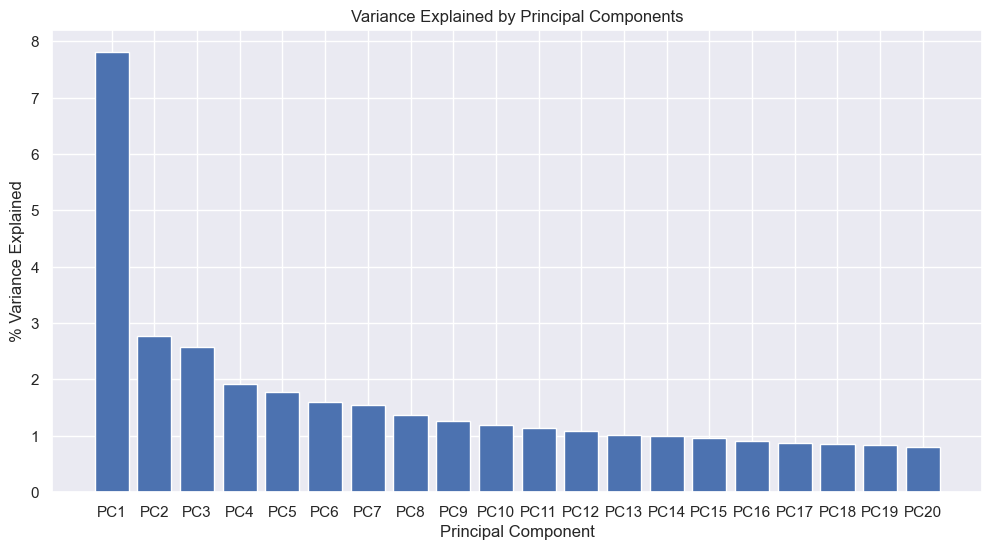

In [564]:
from sklearn.decomposition import PCA


# Perform PCA with 20 components
pca_20 = PCA(n_components=20)
pca_20.fit(dfn_standardized)

# Plot the variance explained by each principal component
labels = ['PC{}'.format(i+1) for i in range(20)]
plt.figure(figsize = (12,6))
plt.bar(labels, pca_20.explained_variance_ratio_ * 100)
plt.xlabel('Principal Component')
plt.ylabel('% Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()


We can clearly see how the first principal component captures less than 8% of the variance in the data, while less than 3% of the variance is explained by other principal component each. \
\
For this reason, it is hard to choose the number of components; hence, we make a standard choice of 3 components, which keeps most of the information and still manages to reduce dimensionality.

In [565]:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(dfn_standardized)
df_pca.shape

(250, 205)

In [566]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(dfn_standardized)

plot_df = pd.DataFrame(df_pca)
plot_df.columns = ["PC1","PC2","PC3"]


conditions = []
for cell in dfn.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")

plot_df["Condition"] = conditions
plot_df

PC1        PC2        PC3 Condition
0   -11.733153  -8.942254  -2.254636  Normoxia
1   -17.064252   4.696964   4.419060  Normoxia
2   -21.459996  -2.427267   5.205570  Normoxia
3   -12.774610   2.729624   5.724160  Normoxia
4     7.078282   9.258533  -2.543677   Hypoxia
..         ...        ...        ...       ...
245 -10.560917 -12.671162 -12.980823  Normoxia
246  -5.763760   3.947296  -7.190669  Normoxia
247  21.247046 -18.988883   0.015206   Hypoxia
248  15.803033   1.562500   4.513180   Hypoxia
249  17.823350   2.008781   4.686243   Hypoxia

[250 rows x 4 columns]

Let us check proportion of the total variance in the data that is explained by each of the principal components found by the PCA.

In [567]:
pca.explained_variance_ratio_

array([0.07810178, 0.027794  , 0.02571145])

We can plot the data points in 3-dimensions, to show the relationship between the first three principal components of the input data, with each data point representing a cell. The color of each point represents the condition of the corresponding cell (either "Hypoxic" or "Normoxic"). 

In [568]:
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    plot_df, x = "PC1", y = "PC2", z = "PC3", color=conditions,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## **Clustering**

Clustering data is an unsupervised learning challenge we will tackle to advance our analysis. The crux of clustering lies in determining what defines a 'good' cluster. With our objective of categorizing cells based on gene expression, employing **exclusive clustering**, which groups data in a distinct manner, is highly effective. Nevertheless, to thoroughly address the clustering component, we will also explore **hierarchical clustering**.

### **Exclusive Clustering** - K-Means

Firstly, we approach the K-Means algorithm.K-means is an unsupervised clustering algorithm that aims to group data into "K" distinct clusters based on their distance from a central point called a centroid. The objective is to minimize the sum of squared distances between the data points and the centroid of the cluster they belong to.

Centroids are the central points of each cluster, which are calculated as the average of all points within the cluster. The distances between data points and centroids are typically calculated using the Euclidean distance, which is the straight-line distance between two points in a multi-dimensional space.

Nonetheless, the significance of the distance metric might decrease if the dataset has a high dimensionality, leading to the "curse of dimensionality", and this is, unfortunately, our case. For this reason we decided to take input data after having computed  PCA (Principal Component Analysis) on them.

This a highly non convex cost function, where multiple restarts and heuristic algorithms are used. Thus, a greedy approach is needed.


In [569]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [570]:
#before doing my task I have to standardize data, do pca and then cluster this
clustering_fn= pd.read_csv("MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt",delimiter="\ ",engine='python',index_col=0)
print("Dataframe dimensions:", np.shape(clustering_fn))

#Since we want to cluster cells and not genes, trasposing the data is necessary
clustering_fn=clustering_fn.T
print("Dataframe dimensions:", np.shape(clustering_fn))

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_fn)

# Perform PCA
pca = PCA(n_components=3)  # or however many components you want to keep
clustering_pca = pca.fit_transform(scaled_data)

Dataframe dimensions: (3000, 250)
Dataframe dimensions: (250, 3000)


In [571]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [572]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [573]:

Labels=pd.Series(clustering_fn.index, index= clustering_fn.index)
hypo_labels = Labels.str.contains('Hypo')
norm_labels = Labels.str.contains('Norm')


Labels[hypo_labels] = 'hypoxia'
Labels[norm_labels] = 'normoxia'



We should also point out that K-Means is unable to handle outliers and it is not suitable to discover clusters with non-convex shapes.Moreover, it could end with a local optimum. With this reason we decided to run it multiple times and for this reason our "n_init" parameter is set  10 . 

Indeed, we took into account the silhouette score to understand which value of k would be the optimal one.

In [574]:
# Find the best k using the silhouette score
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(clustering_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(clustering_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

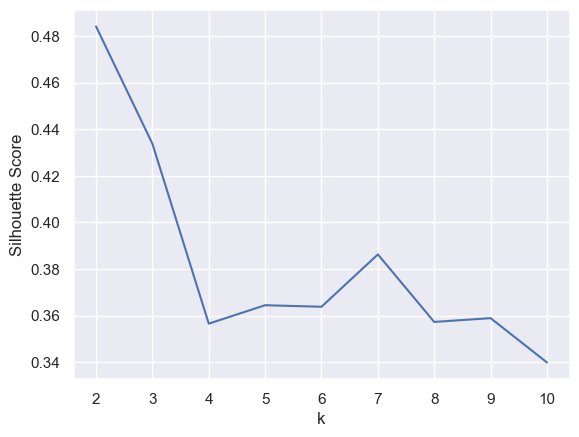

In [575]:
# Plot the silhouette scores for various k values
plt.plot(k_values, silhouette_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

...Time to plot

**Silhouette Score**: The Silhouette Score plot shows the average silhouette score for different values of k. The silhouette score ranges from -1 to 1, where a higher score indicates that samples are well-clustered within their clusters and well-separated from other clusters. You can use this plot to determine the optimal value of k in K-means clustering. A k value with a higher silhouette score is generally preferred.

**Silhouette Plot**: The Silhouette Plot shows the distribution of silhouette coefficients for each sample within each cluster. The colored bars represent the different clusters and the length of the bars indicates the silhouette coefficient value for each sample. An optimal interpretation of this plot shows that most of the bars within each cluster have silhouette values above the mean (dashed red line) and that the clusters have a similar distribution of silhouette values.

**Visualization of Clustered Data**: This plot shows the clustered and dimensionally-reduced data based on the clusters identified by the K-means algorithm. Each point represents a sample (a cell) and the colors indicate which cluster it belongs to. 

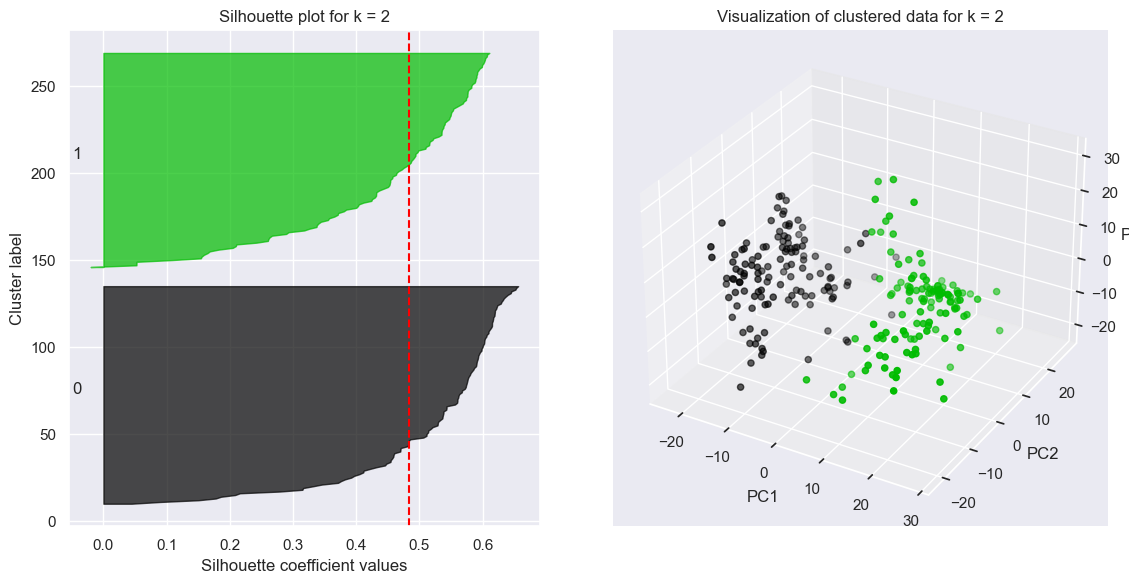

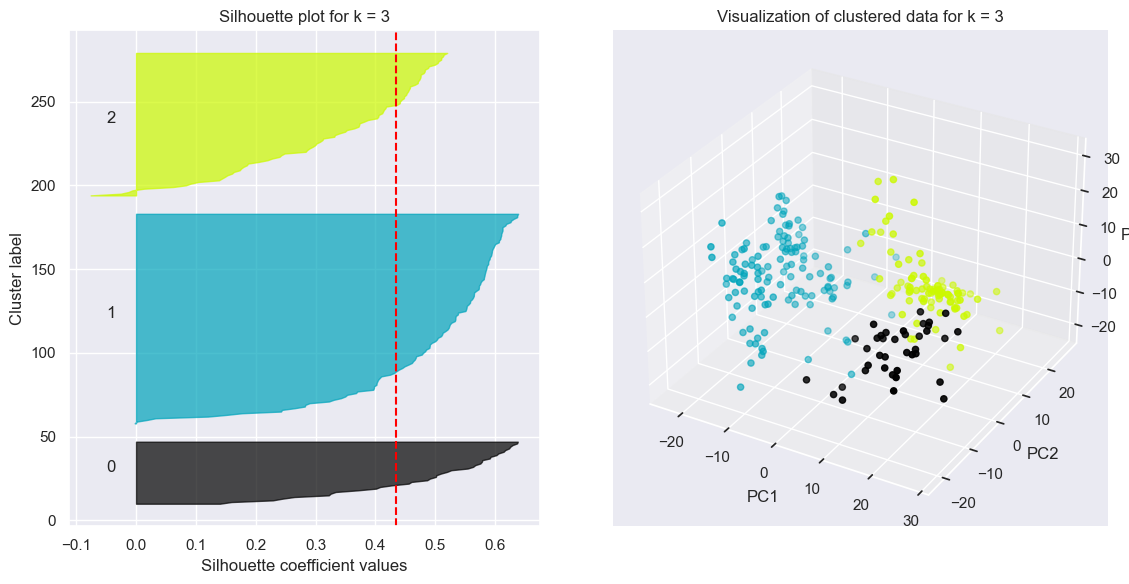

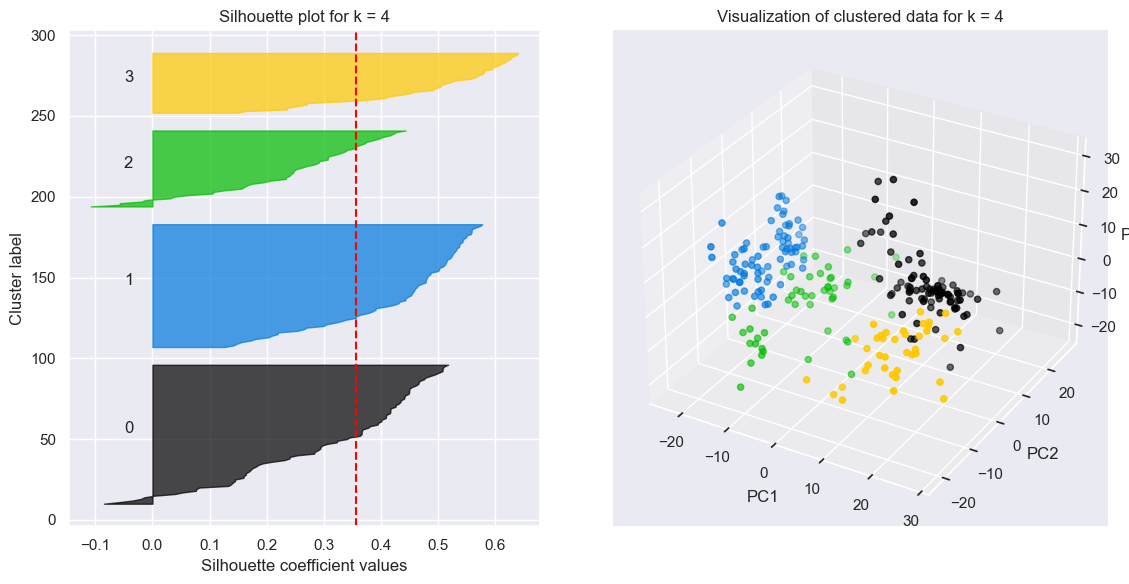

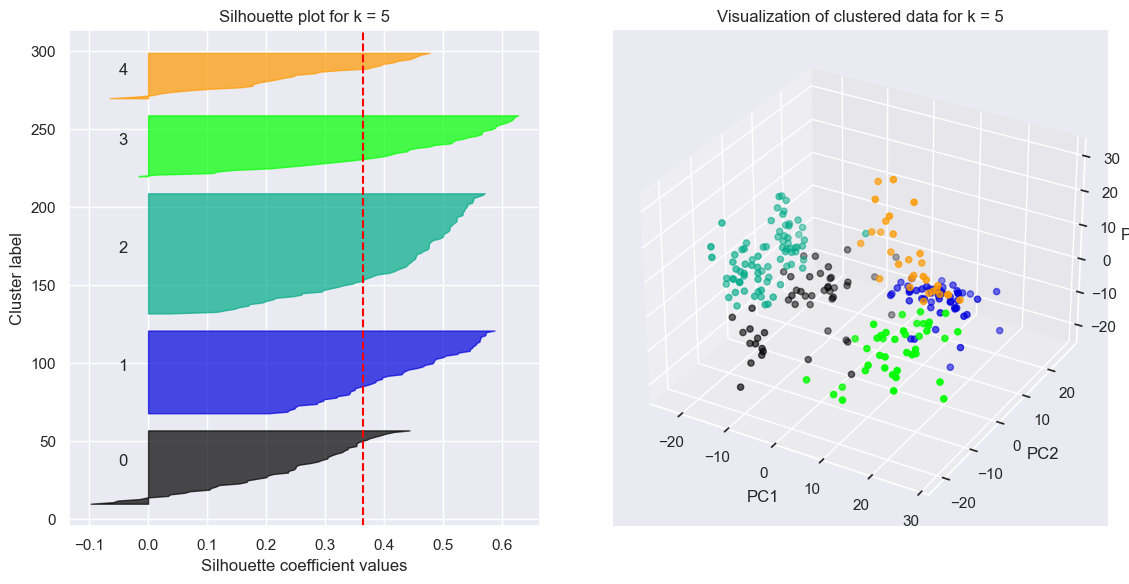

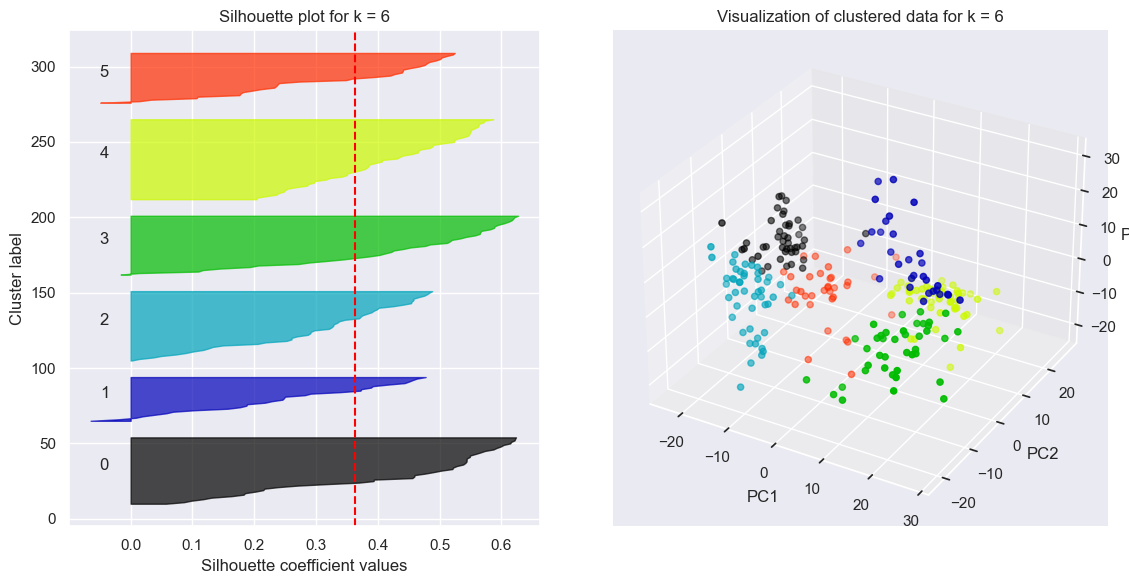

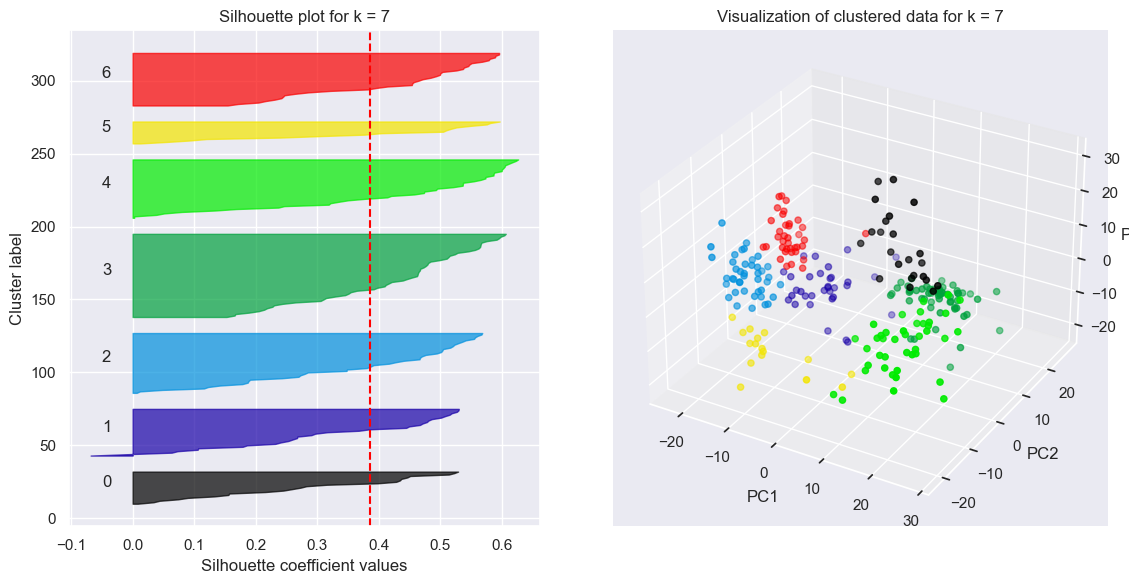

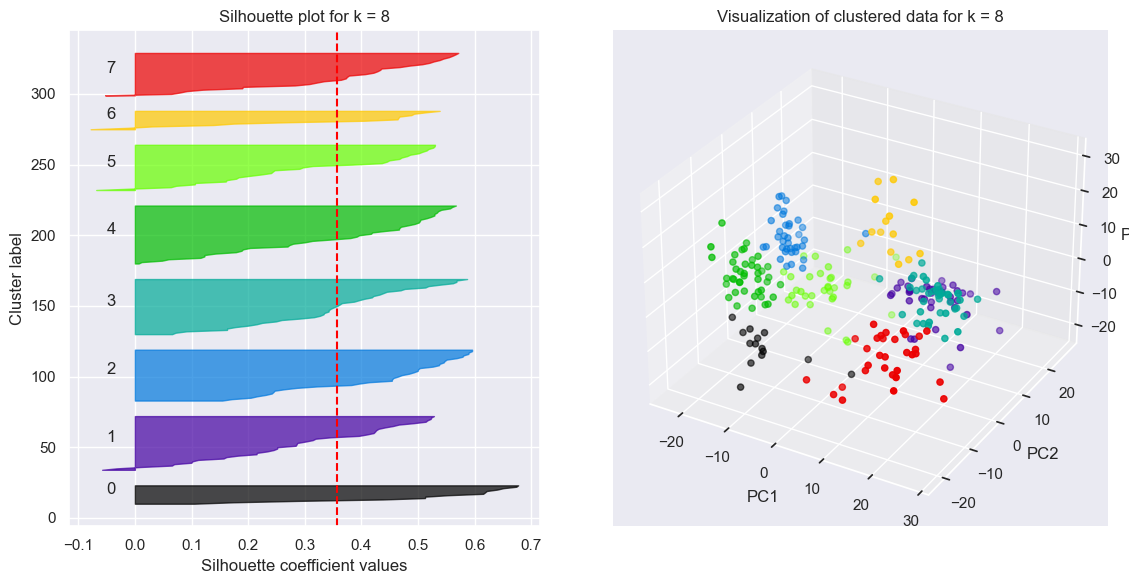

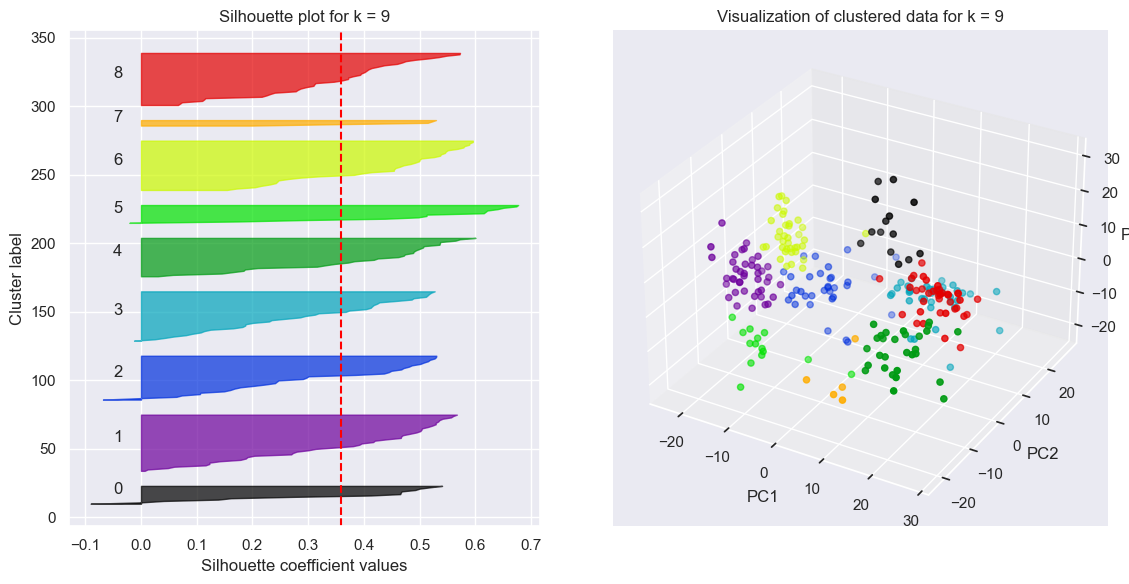

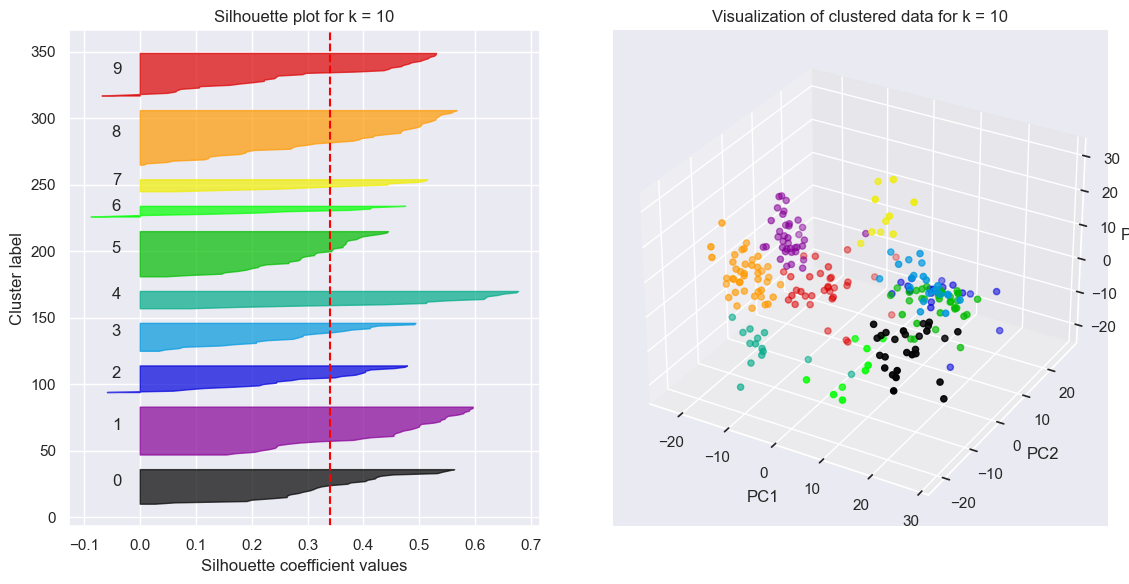

In [576]:
import matplotlib.gridspec as gridspec


for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(clustering_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(clustering_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(clustering_pca, cluster_labels)

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 4])

    # Silhouette plot
    ax1 = plt.subplot(gs[0])
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title(f"Silhouette plot for k = {k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Visualization of clustered data
    ax2 = plt.subplot(gs[1], projection='3d')
    clustered_data = pd.DataFrame(clustering_pca, columns=['PC1', 'PC2', 'PC3'])
    clustered_data['Cluster'] = cluster_labels
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)

    ax2.scatter(clustered_data['PC1'], clustered_data['PC2'], clustered_data['PC3'], c=colors)
    ax2.set_title(f"Visualization of clustered data for k = {k}")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    ax2.set_zlabel("PC3")

    plt.tight_layout()
    plt.show()


**Adjusted Rand Index** 

An Adjusted Rand Index (ARI) varies from -1 to +1, where +1 indicates that the two data partitions (in this case, our cluster labels and the official labels) are identical, 0 indicates that the labels are independent from each other, and -1 indicates complete disagreement between the labels.


In [577]:

from sklearn.metrics import adjusted_rand_score
# Now that we know the best k is 2, we run k-means again with k=2

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(clustering_pca)
cluster_labels = kmeans.labels_

# Convert the official labels to numeric form for comparison
true_labels_numeric = Labels.replace({'hypoxia': 0, 'normoxia': 1})

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(true_labels_numeric, cluster_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.9367700968898395



An ARI of 0.937 suggests that our k-means clustering algorithm with k=2 has done a great job in grouping  cells into "hypoxia" and "normoxia", and that the generated cluster labels align very well with the official labels.

In [578]:
# Count the number of cells in each cluster
counts = np.bincount(kmeans.labels_)

# Print the counts
for i, count in enumerate(counts):
    print(f"Cluster {i} has {count} cells")

Cluster 0 has 126 cells
Cluster 1 has 124 cells


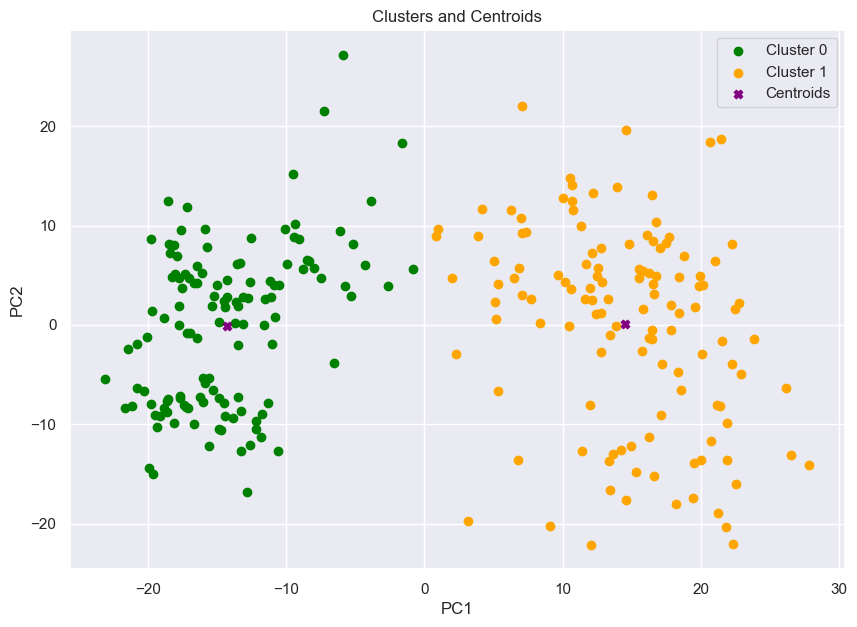

In [579]:
# Plotting the Centroids
centroids = kmeans.cluster_centers_

# Plot
plt.figure(figsize=(10, 7))
for label, color in zip(set(cluster_labels), ['green', 'orange']):
    mask = cluster_labels == label
    plt.scatter(clustering_pca[mask, 0], clustering_pca[mask, 1], c=color, label=f'Cluster {label}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='purple', marker='X', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [580]:
# Create a DataFrame with the PCA-transformed data
df_pca = pd.DataFrame(clustering_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca.index = clustering_fn.index  # make sure the index is the same as the original data

# Add the cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Merge the cluster labels back to the original data
merged_df = pd.concat([clustering_fn, df_pca['Cluster']], axis=1)

# Group by cluster and calculate the mean
cluster_means = merged_df.groupby('Cluster').mean()

# Now, cluster_means is a DataFrame where the index is the cluster labels,
# and the columns are the mean expression of each gene in each cluster.

In [581]:
top_genes = cluster_means.T.apply(lambda x: x.nlargest(10).index.tolist())
print(top_genes)

Cluster         0         1
0         "GAPDH"   "GAPDH"
1        "MT-CO1"   "ACTG1"
2         "ALDOA"   "ALDOA"
3         "ACTG1"    "FTH1"
4        "MT-CYB"  "CYP1B1"
5        "MT-CO2"   "BEST1"
6         "SULF2"    "PGK1"
7        "MT-ND4"     "GPI"
8          "FTH1"     "UBC"
9         "BEST1"    "LDHA"


We looked for all these genes inside the "NCBI Gene", the National Center for Biotechnology Information, and we realized that the possible reasoning behind the gene expression in each cluster is the following: 

**Cluster 1**:
The genes expressed in Cluster 1, including GAPDH, ALDOA, ACTG1, and MT-CYB, are commonly considered housekeeping genes, which are typically expressed in most cell types and conditions. Therefore, Cluster 1 may represent a cluster of cells that exhibit similar baseline or "normal" gene expression patterns, independent of the hypoxia condition. This cluster might include cells that are in a non-hypoxic state.

**Cluster 2**:
The genes expressed in Cluster 2, including CYP1B1, PGK1, GPI, and LDHA, are involved in energy metabolism, glycolysis, and hormone metabolism. It is possible that this cluster represents cells that are more metabolically active or responsive to changes in oxygen levels, such as cells experiencing hypoxia. The differential gene expression in Cluster 2 might reflect adaptations to low oxygen levels.

### **Hierarchical Clustering**

Now we proceed by performing agglomerative clustering with four different linkage methods: 'ward', 'complete', 'average', and 'single'. For each method, we obtain the cluster labels, calculate the Adjusted Rand Index (ARI) to assess the clustering quality, and plot the dendrogram.

You can compare the ARIs to evaluate the performance of different linkage methods. The dendrograms visualize the clustering hierarchy for each method.

ARI for ward linkage: 0.9681280163184557


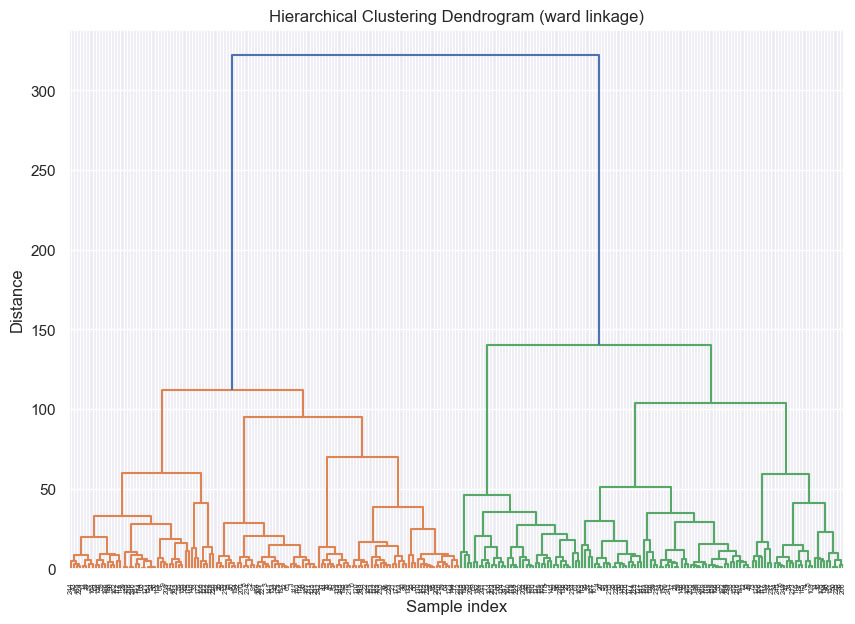

ARI for complete linkage: 0.1505796506524091


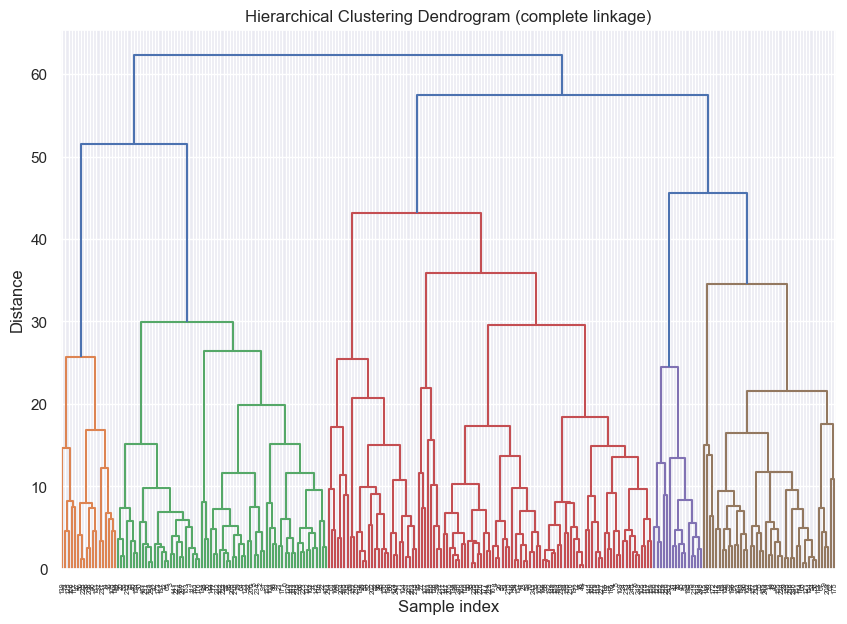

ARI for average linkage: 0.9839997460645816


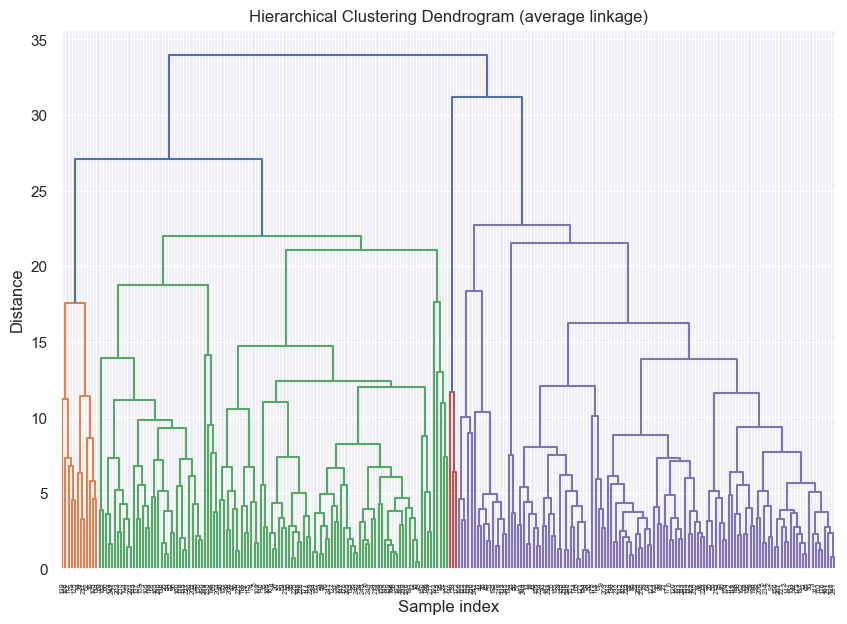

ARI for single linkage: 0.0001290403850319298


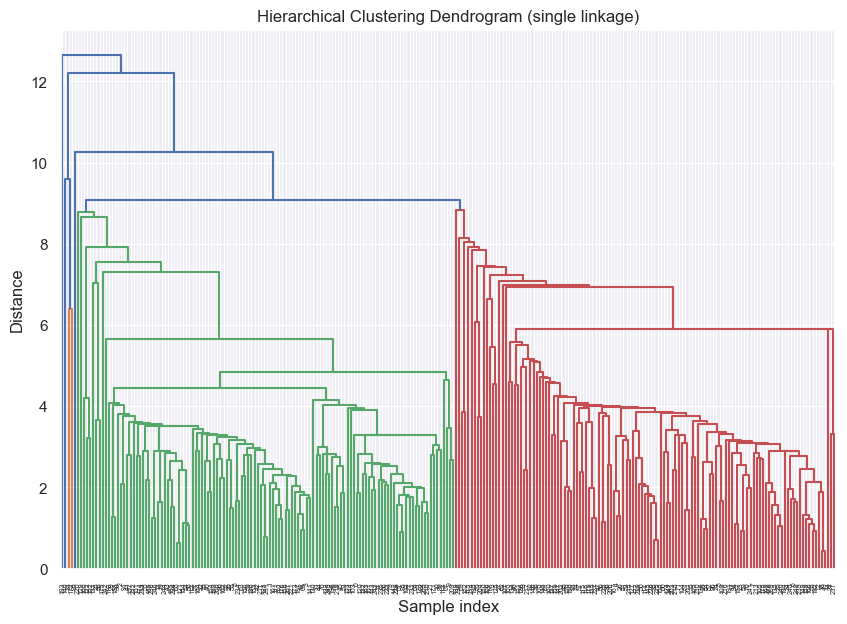

In [582]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Agglomerative clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
cluster_labels = {}

for method in linkage_methods:
    agglomerative = AgglomerativeClustering(n_clusters=2, linkage=method)
    agglomerative_labels = agglomerative.fit_predict(clustering_pca)
    cluster_labels[method] = agglomerative_labels

    # Calculate Adjusted Rand Index
    ari = adjusted_rand_score(true_labels_numeric, agglomerative_labels)
    print(f"ARI for {method} linkage: {ari}")

    # Plot dendrogram
    linked = linkage(clustering_pca, method)
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title(f"Hierarchical Clustering Dendrogram ({method} linkage)")
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In order to read properly these graphs, let's remark that:


At the initial stage, each data point is considered as an individual cluster, and they are represented by different colors or vertical lines in the dendrogram. As the clustering algorithm proceeds, similar data points or clusters are progressively merged together, and the dendrogram visually shows the merging process.

The height of the vertical lines in the dendrogram represents the distance or dissimilarity between the merged clusters. Clusters that are closer in height on the dendrogram are more similar to each other compared to clusters that are farther apart.

In the end, when all data points are merged into a single cluster, there will be only one color or vertical line representing the entire dataset.

Therefore, each color in the dendrogram corresponds to a cluster or a group of data points at a specific level of the hierarchical clustering process, with the colors gradually merging as the clustering proceeds.

By computing the ARI, as in previous step, we found evidence that:
-  ARI for average linkage: 0.9839997460645816
-  ARI for ward linkage: 0.9681280163184557


This suggests that these methods better align with the true cluster assignments or labels .

**Average Linkage**: The average linkage method calculates the average distance between pairs of data points in two different clusters. It tends to produce clusters of relatively equal sizes and can work well when clusters have similar sizes and densities.Infact for our case we have clusters of size 124 and 126 items each.

**Ward Linkage**: The Ward linkage method minimizes the variance within each cluster. It aims to form compact and homogeneous clusters by minimizing the sum of squared differences within each cluster. It can work well when clusters have different sizes and densities.

# **Supervised Learning**

Performing supervised learning is one of the most important tasks in machine learning. We want to build and test different models, compare their performances and test the accuracy. Firstly, let's note that we will use the data set on which PCA was not performed. The reason behind this is that PCA is a procedure that linearly transforms the features in order to get new features whose covariance matrix is diagonal. Now, since the new features are a linear transformation of the original ones we lose their meaning completely. The uncorrelated features don’t have any business meaning at all, so they aren’t explainable. In other words, we managed to remove correlation but we lose the ability to explain the model which is crucial in supervised learning. <br>
<br>
We will begin by building a pipeline which includes several machine learning algorithms used for classification.

- SVM: very efficient in high dimensional spaces and generally are used in classification problems. Main goal is to divide the datasets into number of classes in order to find a maximum marginal hyperplane (MMH) by first generating hyperplanes iteratively that separate the classes in the best way and then choses the hyperplane that segregate the classes correctly. 
The classifier separates data points using a hyperplane with the largest amount of margin. \
\
In the python SVC class the fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or SGDClassifier instead. 

- Linear SVM: the objective is to fit to the provided data, returning a "best fit" hyperplane that divides, or categorizes, it. \
\
It applies a linear kernel function to perform classification and it performs well with a large number of samples. It is similar to SVC with parameter kernel='linear', but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples; supports both dense and sparse input; since n_samples < n_features dual=True (by default). 

* Logistic regression: popular classification algorithm used to identify the most relevant features in a dataset and to build a predictive model that can accurately classify new observations. The goal of logistic regression is to predict the probability that a given observation belongs to a particular class.\
\
Is most commonly used when the data in question has binary output, so when it belongs to one class or another, or is either a 0 or 1 as we do here with Hypoxia and Normoxia. 

* SGD: optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best fit between predicted and actual outputs. \
\
It calculates the gradient using just a random small part of the observations instead of all of them. This approach can reduce computation time which is why we have chosen it. SGD is affective when applied to large-scale and sparse machine learning problems. \
To be precise, it is only a way to train a model. For example, using SGDClassifier(loss='log_loss') results in logistic regression, i.e. a model equivalent to LogisticRegression which is fitted via SGD instead of being fitted by one of the other solvers in LogisticRegression. 

* Random forest: in random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. \
\
It uses averaging to improve the predictive accuracy and control over-fitting

* KNN: non-parametric type of supervised learning method used for classification. The algorithm predicts on a test data point x by computing k closest training data points where closeness is quantified as some distance e. g. Euclidean distance. Then it finds the most common class y among k neighbors and classifies x as y

* Extra tree: creates a large number of unpruned decision trees from the training dataset. Predictions are made by using majority voting in the case of classification.\
\
It is closely related to random forest algorithm and it often achieves as-good or better performance than the random forest algorithm, although it uses a simpler algorithm to construct the decision trees used as members of the ensemble.


We should note that distance-based algorithms suffer greatly from data that isn't on the same scale. We will use Scikit-Learn's `StandardScaler()` class to perform Feature Scaling on such algorithms (KNN, SVC, Linear SVC). \
The reason why we scale the data for Logistic regression is because those models are sensitive to the scale of the input features. When the features have different scales, the coefficients assigned to them may not accurately reflect their importance.

In [583]:
conditions = []
for cell in dfn.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
print(len(conditions))

250


In [584]:
df_test = pd.read_csv('MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt', delimiter="\ ", engine='python', index_col=0)

In [585]:
# Convert target variable to binary encoding
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

# define train and test data
X_train = dfn.T
y_train = target_binary
X_test = df_test

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

## **Model Analysis**

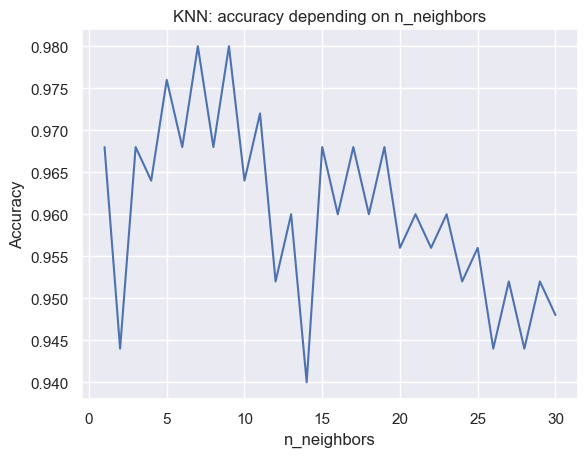

In [586]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, mutual_info_classif

k_values = range(1, 31)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(k_values, accuracies)
plt.title('KNN: accuracy depending on n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()



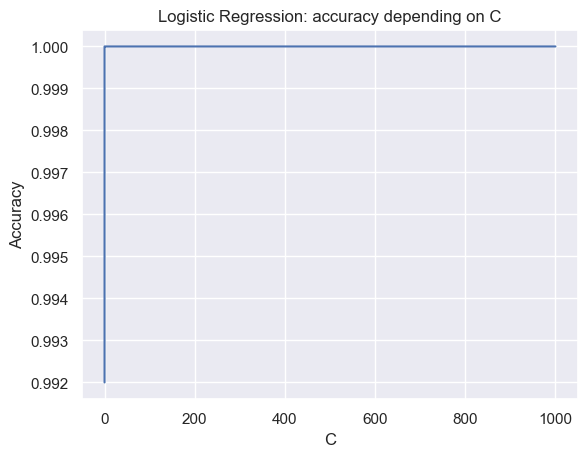

In [587]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracies = []

for c in c_values:
    model = LogisticRegression(C=c)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(c_values, accuracies)
plt.title('Logistic Regression: accuracy depending on C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



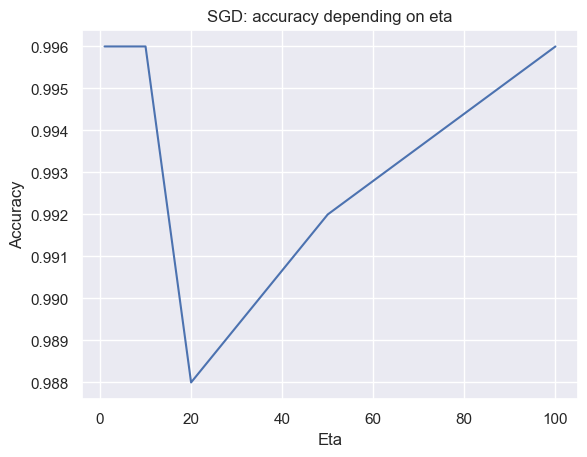

In [588]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

eta_list = [1, 10, 20, 50, 100]
accuracies = []

for eta in eta_list:
    model_sgd = SGDClassifier(eta0=eta)
    scores = cross_val_score(model_sgd, X_train, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(eta_list, accuracies)
plt.title('SGD: accuracy depending on eta')
plt.xlabel('Eta')
plt.ylabel('Accuracy')
plt.show()


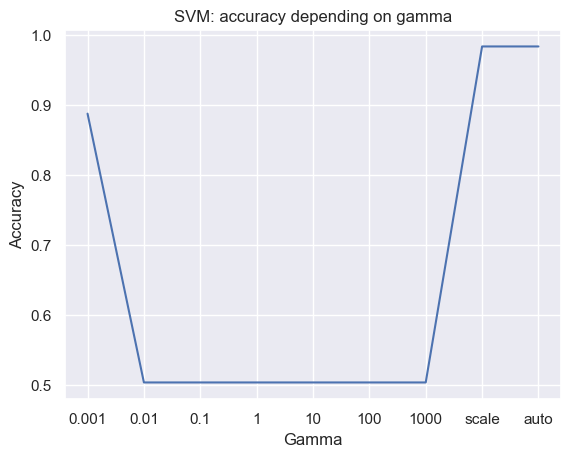

In [589]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

gamma_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'scale', 'auto']
accuracies = []

for gamma in gamma_values:
    model_svm = SVC(gamma = gamma)
    scores = cross_val_score(model_svm, X_train_scaled, y_train, cv=10)
    accuracies.append(scores.mean())

plt.plot(gamma_values, accuracies)
plt.title('SVM: accuracy depending on gamma')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.show()


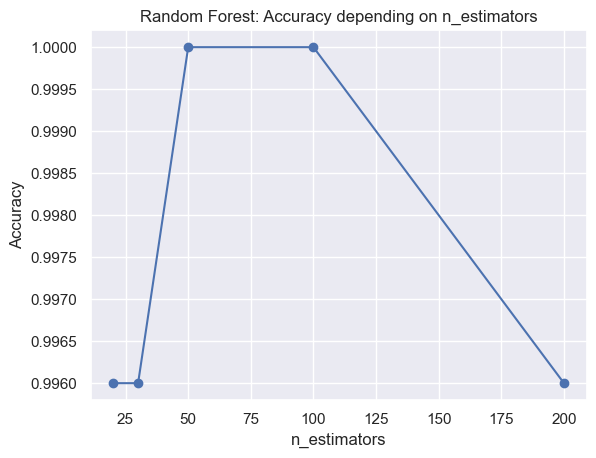

In [590]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

n_estimators= [20, 30, 50, 100, 200]
accuracies_rf = []
for n in n_estimators:
    model_rf = RandomForestClassifier(n_estimators=n)
    scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10)
    accuracies_rf.append(scores_rf.mean())

plt.plot(n_estimators, accuracies_rf, marker='o')
plt.title('Random Forest: Accuracy depending on n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()


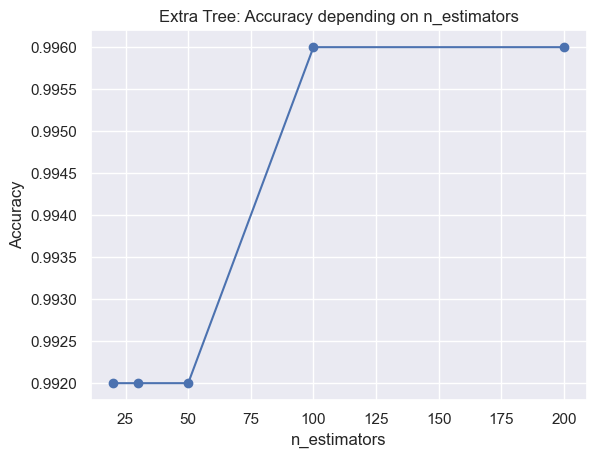

In [591]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

n_estimators= [20, 30, 50, 100, 200]
accuracies_et = []

for n in n_estimators:
    model_et = ExtraTreesClassifier(n_estimators=n)
    scores_et = cross_val_score(model_et, X_train, y_train, cv=10)
    accuracies_et.append(scores_et.mean())

plt.plot(n_estimators, accuracies_et, marker='o')
plt.title('Extra Tree: Accuracy depending on n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()



## **Pipeline**

In [592]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')


# Define parameter grids for each model
param_grids = {
    "svm": {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000] + ['scale', 'auto'],
        'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    },
    "linear_svm": {
        'linear_svm__penalty': ['l1', 'l2'],
        'linear_svm__loss' : ['hinge', 'squared_hinge'], 
    },
    "logistic": {
        'logistic__penalty': ['l1', 'l2'],
        'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    },
    "sgd": {
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'],
        'sgd__penalty': ['l1', 'l2', 'elasticnet'],
        'sgd__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'sgd__eta0': [1, 10, 20, 50, 100],
    },
    "random_forest": {
        'random_forest__n_estimators': [20, 30, 50, 100, 200],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__criterion': ["gini", "entropy"],
    },
    "knn": {
        'knn__n_neighbors': range(1, 31),
        "knn__weights": ["uniform", "distance"], 
        'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming']
    },
    "extra_tree": {
            'extra_tree__n_estimators':[20, 30, 50, 100, 200], 
            'extra_tree__max_leaf_nodes': np.arange(20, 100, 10)
    }
}


# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC())   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC()) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression())
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier())
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier())
    ]),
    "knn": Pipeline([
        ("knn", KNeighborsClassifier())
    ]), 
    "extra_tree": Pipeline([
        ("extra_tree", ExtraTreesClassifier())
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic", "knn"]:
        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        # Fit the pipeline on scaled data
        pipeline.fit(X_train, y_train)
    else:
        # Fit the pipeline on original data
        pipeline.fit(X_train, y_train)
    
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")

    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))


Fitting 10 folds for each of 252 candidates, totalling 2520 fits
Model: svm
Best parameters: {'svm__C': 0.001, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Model: linear_svm
Best parameters: {'linear_svm__loss': 'hinge', 'linear_svm__penalty': 'l2'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Model: logistic
Best parameters: {'logistic__C': 0.001, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}
Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
Model: sgd
Best parameters: {'sgd__alpha': 1e-05, 'sgd__eta0': 1, 'sgd__learning_rate': 'invscaling', 'sgd__loss': 'log_loss', 'sgd__penalty': 'l1'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model: random_forest
Best parameters: {'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__n_estimators': 50}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Model: knn
Best parameter

In [593]:
dfn.shape

(3000, 250)

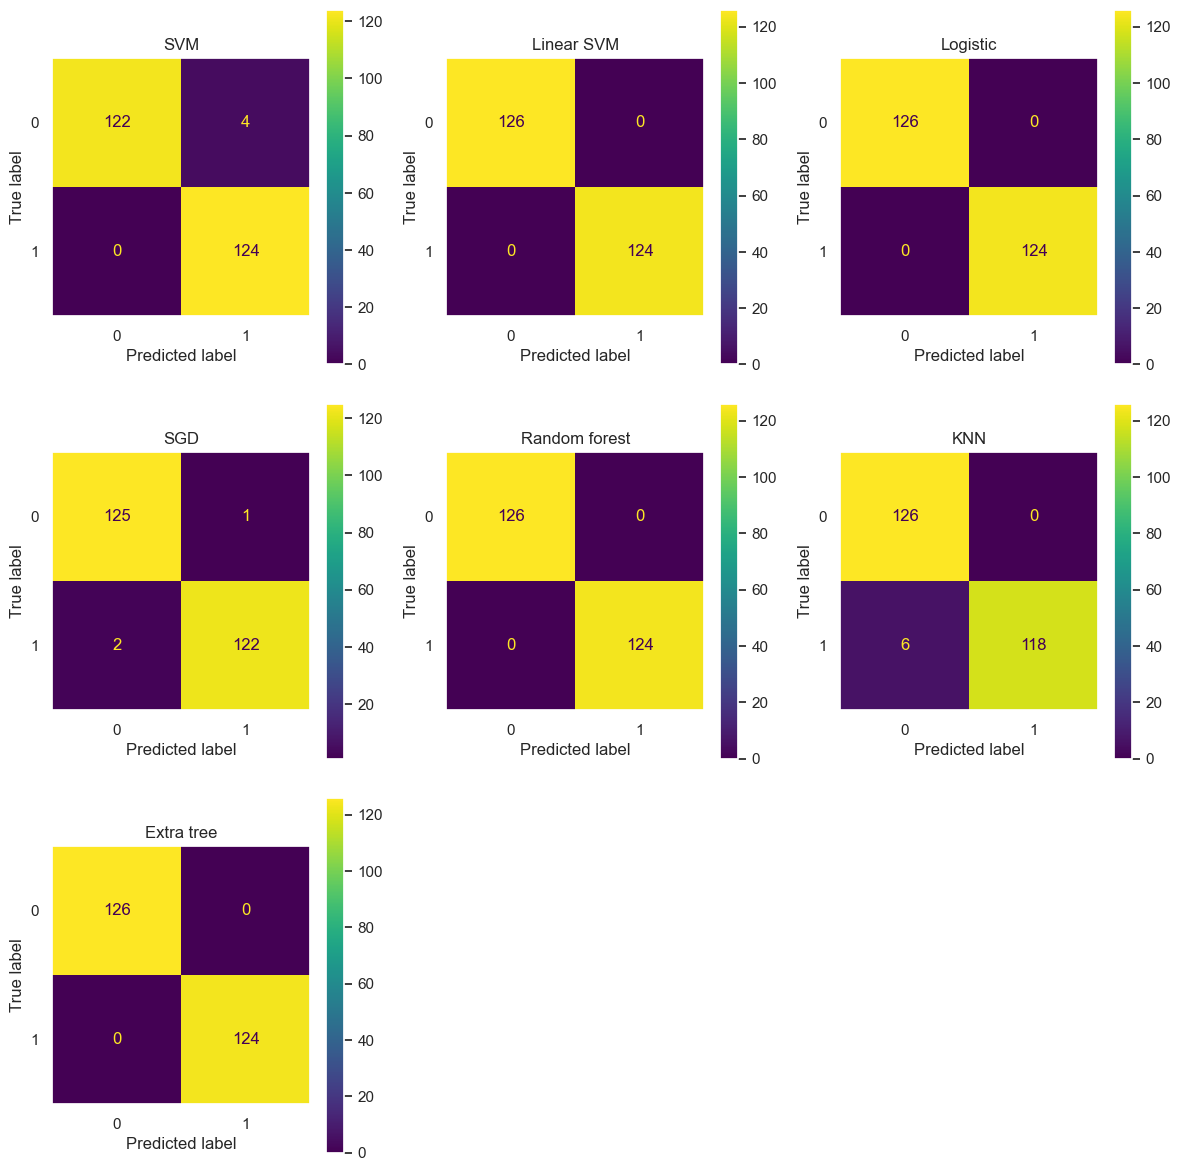

In [594]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

# Define the titles for your plots
titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest', 'KNN', 'Extra tree']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over confusion matrices and titles together
for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

# Hide the unused subplot (if there are less plots than subplots)
if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

## **Supervised Learning on Original Dataset**

In [595]:
conditions = []
for cell in df.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
print(len(conditions))

305


In [596]:
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

In [597]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
X_train = df.T
y_train = target_binary

# Define parameter grids for each model
param_grids = {
    "svm": {
        'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000] + ['scale', 'auto'],
        'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    },
    "linear_svm": {
        'linear_svm__penalty': ['l1', 'l2'],
        'linear_svm__loss' : ['hinge', 'squared_hinge'], 
    },
    "logistic": {
        'logistic__penalty': ['l1', 'l2'],
        'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'logistic__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    },
    "sgd": {
        'sgd__loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error'],
        'sgd__penalty': ['l1', 'l2', 'elasticnet'],
        'sgd__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'sgd__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
        'sgd__eta0': [1, 10, 20, 50, 100],
    },
    "random_forest": {
        'random_forest__n_estimators': [20, 30, 50, 100, 200],
        'random_forest__max_depth': [None, 10, 20],
        'random_forest__criterion': ["gini", "entropy"],
    },
    "knn": {
        'knn__n_neighbors': range(1, 31),
        "knn__weights": ["uniform", "distance"], 
        'knn__metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev', 'hamming']
    },
    "extra_tree": {
            'extra_tree__n_estimators':[20, 30, 50, 100, 200], 
            'extra_tree__max_leaf_nodes': np.arange(20, 100, 10)
    }
}


# Define pipelines for each model
pipelines = {
    "svm": Pipeline([
        ("svm", SVC())   
    ]), 
    "linear_svm": Pipeline([
        ("linear_svm", LinearSVC()) 
    ]),
    "logistic": Pipeline([
        ("logistic", LogisticRegression())
    ]),
    "sgd": Pipeline([
        ("sgd", SGDClassifier())
    ]),
    "random_forest": Pipeline([
        ("random_forest", RandomForestClassifier())
    ]),
    "knn": Pipeline([
        ("knn", KNeighborsClassifier())
    ]), 
    "extra_tree": Pipeline([
        ("extra_tree", ExtraTreesClassifier())
    ]),
}

results_table = []
prediction_list = []

# Grid search, cross-validate, and evaluate each pipeline
for model_name, pipeline in pipelines.items():
    if model_name in ["svm", "linear_svm", "logistic", "knn"]:
        # Scale the data
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)

        # Fit the pipeline on scaled data
        pipeline.fit(X_train, y_train)
    else:
        # Fit the pipeline on original data
        pipeline.fit(X_train, y_train)
    
    grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='accuracy', verbose=1, n_jobs=-1, cv=10)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params}")

    y_pred = cross_val_predict(pipeline, X_train, y_train, cv=10)
    prediction_list.append(y_pred)

    accuracy = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=10)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    result_row = [model_name, np.mean(accuracy), precision, recall, f1]
    results_table.append(result_row)

# Convert the results table to a pandas DataFrame
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df = pd.DataFrame(results_table, columns=columns)

# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

Fitting 10 folds for each of 252 candidates, totalling 2520 fits
Model: svm
Best parameters: {'svm__C': 0.001, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
Fitting 10 folds for each of 4 candidates, totalling 40 fits
Model: linear_svm
Best parameters: {'linear_svm__loss': 'hinge', 'linear_svm__penalty': 'l2'}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
Model: logistic
Best parameters: {'logistic__C': 1, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Fitting 10 folds for each of 2520 candidates, totalling 25200 fits
Model: sgd
Best parameters: {'sgd__alpha': 1e-05, 'sgd__eta0': 1, 'sgd__learning_rate': 'constant', 'sgd__loss': 'hinge', 'sgd__penalty': 'elasticnet'}
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Model: random_forest
Best parameters: {'random_forest__criterion': 'gini', 'random_forest__max_depth': None, 'random_forest__n_estimators': 30}
Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Model: knn
Best parame

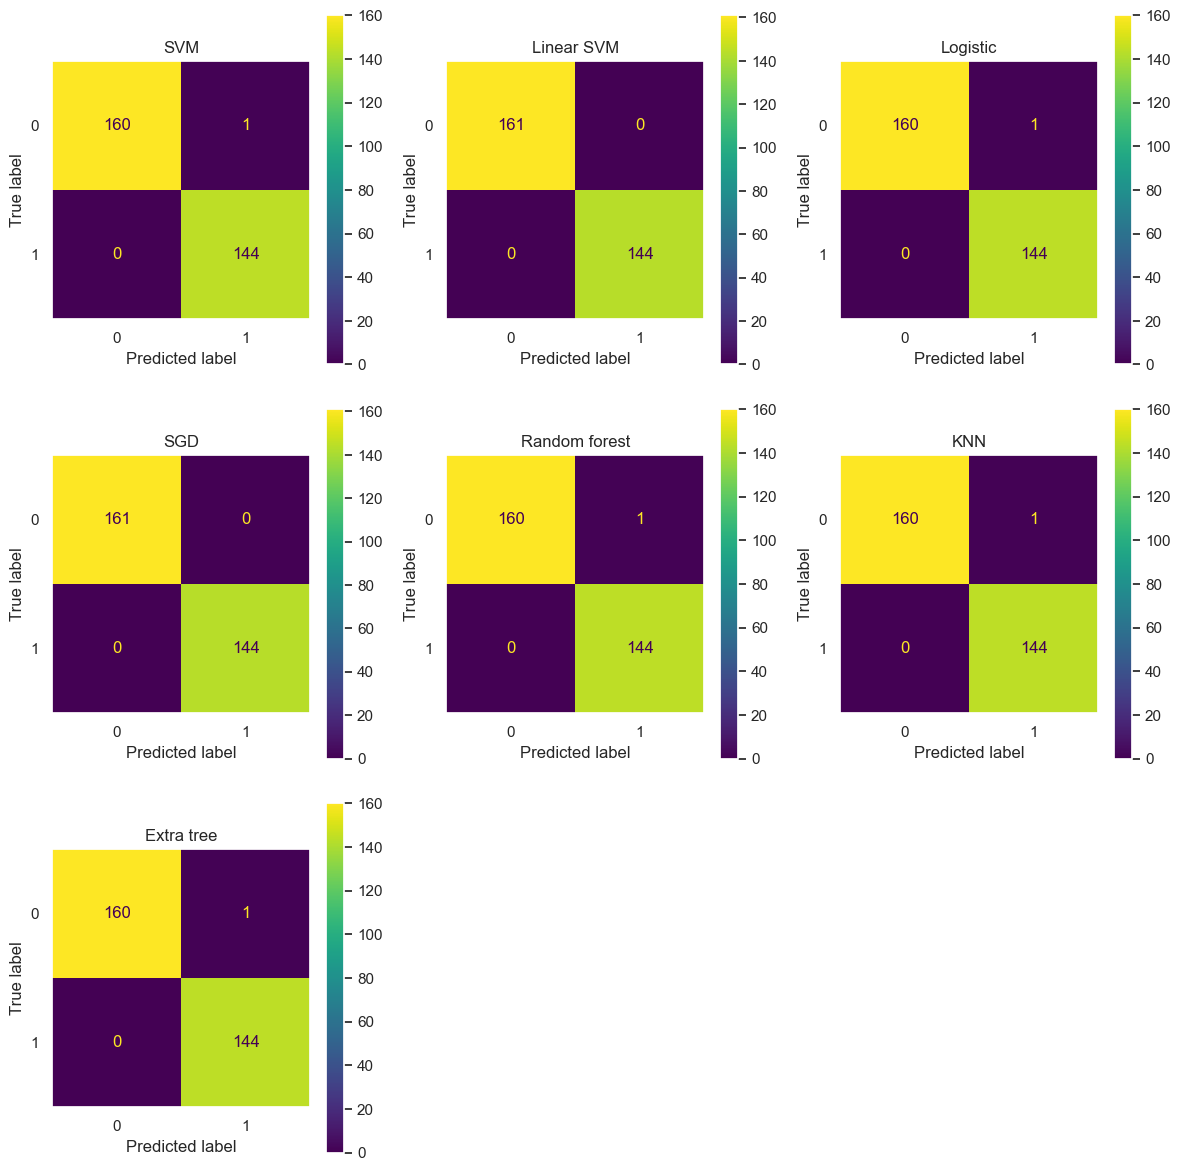

In [598]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
confusion_matrices = [confusion_matrix(y_train, pred) for pred in prediction_list]

# Define the titles for your plots
titles = ['SVM', 'Linear SVM', 'Logistic', 'SGD', 'Random forest', 'KNN', 'Extra tree']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Iterate over confusion matrices and titles together
for cm, title, ax in zip(confusion_matrices, titles, axes.flatten()):
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    display.plot(ax=ax)
    ax.set_title(title)
    ax.grid(False)

# Hide the unused subplot (if there are less plots than subplots)
if len(prediction_list) < len(axes.flatten()):
    for ax in axes.flatten()[len(prediction_list):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

# **Conclusion**

We have implemented two pipelines, one on the normalized filtered 3000 dataset that we were given and one on the original data set which we have preprocessed. \
\
By comparing accuracy, precision, recall, F1 score of Linear SVM we can see that they are all equal to 1 in both pipelines. For that reason we will choose LinearSVC classifier with parameters `loss='hinge', penalty='l2'` as the best model. \
\
`LinearSVC(loss='hinge', penalty='l2')`\
\
Since the model performance results were slightly better on dfn(normalized, filtered 3000 dataframe) we will train our model on it. \
\
Note that both Linear SVC and Logistic Regression performed very well: we could have expected this since the data is linearly separable. Moreover, Linear SVM was overall more accurate since it allowes for more margin compared to Logistic Regression. 

# **Predictions**

In [599]:
conditions = []
for cell in dfn.columns:
  cell_new = cell.replace('"', '')
  if df_meta.loc[cell_new, 'Condition'] == 'Hypo':
    conditions.append("Hypoxia")
  else:
    conditions.append("Normoxia")
print(len(conditions))

250


In [600]:
target_binary = []
for i in conditions:
    if i=='Hypoxia':
        target_binary.append(1)
    else:
        target_binary.append(0)

In [601]:
df_test = pd.read_csv("MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", delimiter="\ ", engine='python', index_col=0)

X_train = dfn.T
y_train = target_binary
X_test = df_test.T

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [602]:
best_model = LinearSVC(loss='hinge', penalty='l2')

In [603]:
best_model.fit(X_train_scaled, y_train)
predictions = best_model.predict(X_test_scaled)

In [604]:
final_predictions = []

for i in predictions:
    if i==1:
        final_predictions.append('Hypoxia')
    else:
        final_predictions.append('Normoxia')


In [605]:
np.savetxt('MCF7_SmartS_Predictions.txt', final_predictions, fmt='%s')